In [2]:
#import all libraries
import pandas as pd
import numpy as np

#sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

#matplotlib and seaborn for plotting
import matplotlib.pyplot as plt

import seaborn as sns





In [3]:
import os
cwd = os.getcwd()
print(cwd)

/Users/hraja/Documents/Kaggle/Home Credit Default Risk


In [48]:
# read the application data
app_train  = pd.read_csv('application_train.csv')

In [10]:
print('Training data shape:',app_train.shape)
app_train.head()

Training data shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#Cash loans make the bulk of the loan type
loans = app_train['NAME_CONTRACT_TYPE'].value_counts()
contractCat = app_train.NAME_CONTRACT_TYPE.unique()
print(contractCat)
print(loans)

['Cash loans' 'Revolving loans']
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


<h5>Cash loans are majority of the loans</h5>

[0 1]


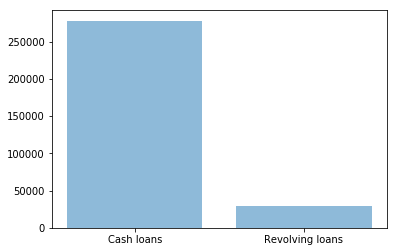

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


In [14]:
y_pos = np.arange(len(contractCat))
print(y_pos)
plt.bar(y_pos,loans,align='center', alpha=0.5)
plt.xticks(y_pos,contractCat)
plt.show()

print(app_train['NAME_CONTRACT_TYPE'].value_counts())


<h5>Majority of applicants are males</h5>

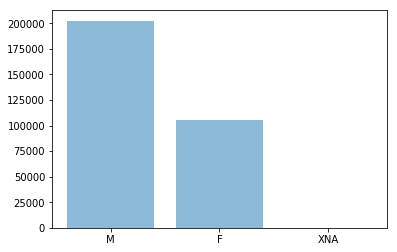

In [15]:
GenderCounts = app_train['CODE_GENDER'].value_counts()
gender = app_train.CODE_GENDER.unique()
y_pos = np.arange(len(gender))
plt.bar(y_pos,GenderCounts,align='center',alpha=0.5)
plt.xticks(y_pos,gender)
plt.show()

<h5> Majority of applicants dont own a car </h5>

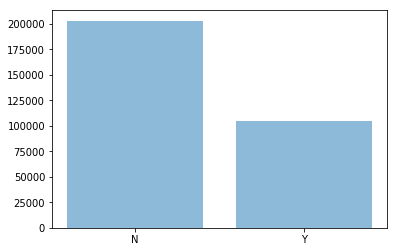

In [16]:
# own car
OwnCarCounts = app_train['FLAG_OWN_CAR'].value_counts()
ownCarFlag = app_train.FLAG_OWN_CAR.unique()
y_pos = np.arange(len(ownCarFlag))
plt.bar(y_pos,OwnCarCounts,align='center',alpha = 0.5)
plt.xticks(y_pos,ownCarFlag)
plt.show()

<h5>The application dataset is severly unbalanced in favour of class = 0. Most of the clients are who have repaid on time. Do we need to use SMOTE to oversample the 1 population. </h5>

In [17]:
targetCounts = app_train['TARGET'].value_counts()
print(targetCounts)

0    282686
1     24825
Name: TARGET, dtype: int64


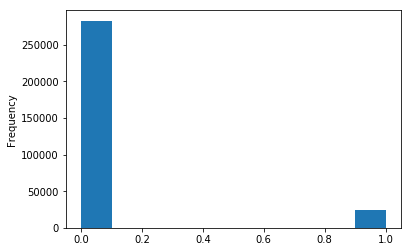

In [18]:
# Examine the distribution of the target column
app_train['TARGET'].astype(int).plot.hist()
plt.show()


In [19]:
app_train.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

# Examine missing values

In [151]:
def missing_values_table(df):
    #Total missing values
    mis_val = df.isnull().sum()
    
    #Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    
    #make a table with the results
    mis_val_table = pd.concat([mis_val,mis_val_percent],axis = 1)
    
    #Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] !=0].sort_values('% of Total Values', ascending=False).round(1)
    
    #Print some summary information
    print("Your selected dataframe has "+ str(df.shape[1]) + " columns. There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    
    
    # return the dataframe with missing information
    return mis_val_table_ren_columns

In [21]:
#Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns. There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [22]:
#Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Number of unique entries in each object column

In [23]:
app_train.select_dtypes('object','float64').apply(pd.Series.nunique, axis = 0)

TypeError: include and exclude must both be non-string sequences

Have to encode categorical variables as numbers. One Hot Encoding is the safest approach compared to Label Encoding as it does not impose arbitrary values to categories.THe only downside is that the number of features can explode with categorical variables with many categories. To deal with this one can perform one hot encoding followed by PCA.

For any categorical variables with two categories, we ll use label encoding and for variables with more than 2 unique categories we will use one hot encoding

In [24]:
#Create a label encoder object
le = LabelEncoder()
le_count = 0

#Iterate through the columns

for col in app_train:
    if app_train[col].dtype == 'object':
        #if two or fewer categories
        if len(list(app_train[col].unique())) <=2:
            le.fit(app_train[col])
            app_train[col] = le.transform(app_train[col])
            le_count +=1
            
print('%d columns were label encoded.' %le_count)

3 columns were label encoded.


In [25]:
#one hot encoding of categorical variables

app_train = pd.get_dummies(app_train)

print('Training Features shape: ', app_train.shape)



Training Features shape:  (307511, 243)


In [26]:
app_test = pd.read_csv('application_test.csv')
print('Testing data shape: ' , app_test.shape)
app_test.head()
for col in app_test:
    if app_test[col].dtype == 'object':
        if len(list(app_test[col].unique())) <= 2:
            le.fit(app_test[col])
            app_test[col] = le.transform(app_test[col])
            
            le_count +=1


            

Testing data shape:  (48744, 121)


In [27]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 238)


Aligning training and testing datasets

In [29]:
train_labels = app_train['TARGET']

#align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

#Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 238)
Testing Features shape:  (48744, 237)


<h1>Back to Exploratory Data Analysis</h1>

One problem we need to lookout for is anomalies in the data. We can see that the number in the Days_Birth column are negative because they are recorded relative to the current loan application


In [30]:
#Multiply by -1 and divide by the number of days in a year
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

### Days_Employed

In [31]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

The maximum value is about 1000 years

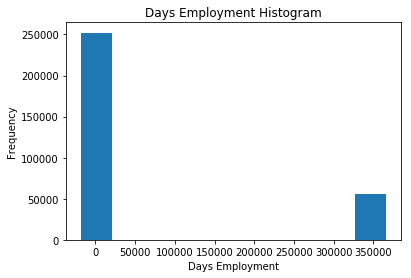

In [32]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');
plt.show()

In [33]:
#Lets see if anomalous clients tend to have higher or lower rates of default than rest of the clients
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]

print('The non-anomalies default on %0.2f%% of loans' %(100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' %(100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))




The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


#Anomalies have a lower rate of default. We could fill these values using imputation. We will however fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous

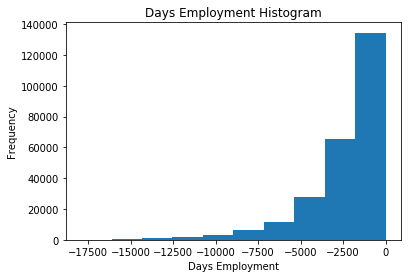

In [34]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

#Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');
plt.show()

We need to do the same to the test dataset

In [35]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243
app_test['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test['DAYS_EMPLOYED_ANOM'].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


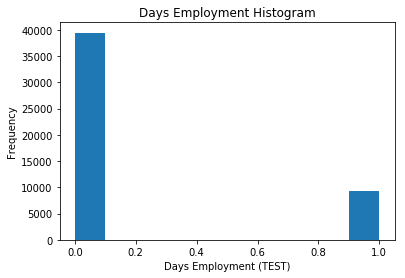

In [36]:
app_test['DAYS_EMPLOYED_ANOM'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment (TEST)')
plt.show()

# <h3> Correlations </h3>

One way to try to understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using .corr dataframe method.

In [37]:
# Find the correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

#Display correlations
print('Most Postive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n' , correlations.head(15))

Most Postive Correlations:
 DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negativ

With Days_Birth the insight is as the client gets older they are less likely to default on their loan

In [38]:
#Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.078239308309827116

<h5>As the client gets older they tend to repay their loan on time</h5>

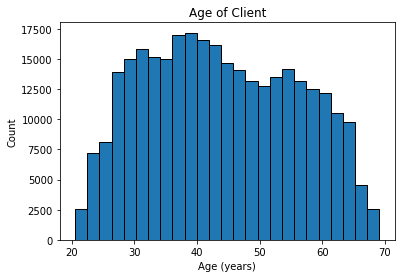

In [39]:
#Lets make a histogram of age
#plt.style.use('fivethirtyeight')

#Plot the distribution of age in years
plt.hist(app_train['DAYS_BIRTH']/365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

<h5> We will make a kernel density estimation plot colored by the value of the target. A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram. </h5>

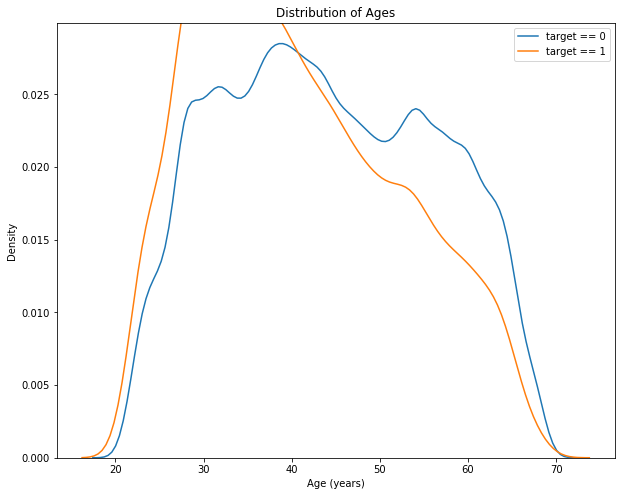

In [40]:
#use seaborn kdeplot for this graph
plt.figure(figsize = (10,8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH']/365 , label = 'target == 0')

#KDE plot of loans which were not repaid in time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

#Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

plt.show()

Younger people are more likely to not repay the loan. Lets look at average failure to repay loans by age bracket.

In [41]:
#Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20,70, num = 11))
age_data.head(10)

/Users/hraja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hraja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [43]:
# Group by the bin and calculate averages
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


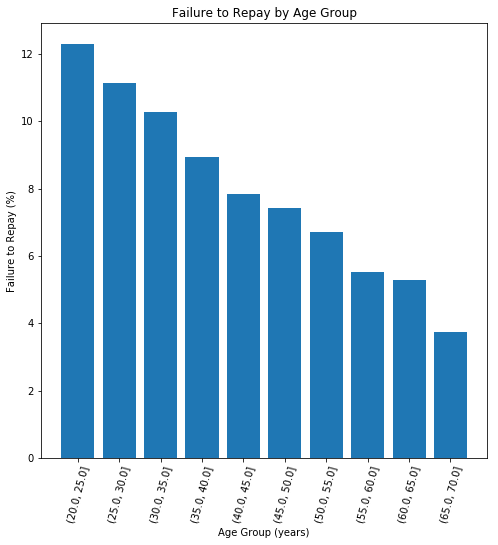

In [44]:
plt.figure(figsize = (8,8))

#Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

#Plot labelling
plt.xticks(rotation = 75);
plt.xlabel('Age Group (years)');
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')
plt.show()

<h6> Younger applicants are more likely to not repay the loan. The rate of failure to repay is above 10% for the youngest three age groups and below 5% for the oldest age group. Banks should provide more guidance or financial planning tips to the younger clients. </h6>

The three strongest negative correlations are EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3.  Show correlations of the EXT_SOURCE with the target and with each other

In [45]:
#Extract the EXT_SOURCE variables and show corelations
ext_data = app_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


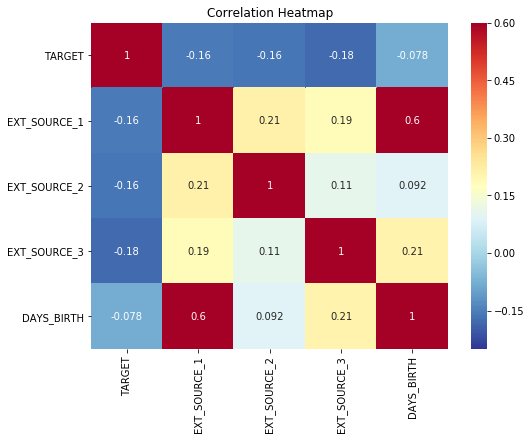

In [46]:
plt.figure(figsize = (8,6))
#Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r,vmin=-0.25,annot=True,vmax = 0.6)
plt.title('Correlation Heatmap')
plt.show()

<h3> Feature Engineering </h3>

We ll do feature engineering using two simple feature construction methods
- Polynomial features
- Domain knowledge features

In polynomial features, we make features that are powers of existing features as well as interaction terms between features


In [47]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]

#imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']
poly_features = poly_features.drop(['TARGET'],axis = 1)


#Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)


from sklearn.preprocessing import PolynomialFeatures

#Create the polynomial object with the specified degree
poly_transformer = PolynomialFeatures(degree = 3)


In [48]:
#Train the polynomial features
poly_transformer.fit(poly_features)

#Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [49]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [50]:
#Create a dataframe of the features
poly_features = pd.DataFrame(poly_features, columns = poly_transformer.get_feature_names(['EXT_SOURCE_1','EXT_SOURCE_2',
                                                                                         'EXT_SOURCE_3','DAYS_BIRTH']))

#Add in the target
poly_features['TARGET'] = poly_target

#Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

#Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


We will add these features to a copy of the training and testing data and evaluate models with and without the features

In [51]:
#Put test features into the dataframe
poly_features_test = pd.DataFrame(poly_features_test, columns = poly_transformer.get_feature_names(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']))

#Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

#Merge polynomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR',how = 'left')

#Align the dataframes
app_train_poly,app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

#Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape: ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 273)
Testing data with polynomial features shape:  (48744, 273)


<h3>Domain Knowledge Features</h3>

- CREDIT_INCOME_PERCENT: the percentage of credit amount relative to a client's income
- ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
- CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due)
- DAYS_EMPLOYED_PERCENT: the percentage of days employed relative to the client's age

In [52]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']


In [53]:
app_train_domain.head(10)
app_test_domain.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,1,0,1,0,False,4.213333,0.152300,0.036147,0.121044
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,0,False,2.250182,0.175455,0.077973,0.247398
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,0,False,3.275378,0.344578,0.105202,0.222477
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,1,0,0,1,0,False,5.000000,0.155614,0.031123,0.133515
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,0,False,3.475000,0.178150,0.051266,0.168021
5,100042,0,1,1,0,270000.0,959688.0,34600.5,810000.0,0.025164,...,0,0,0,1,0,False,3.554400,0.128150,0.036054,0.645506
6,100057,0,1,1,2,180000.0,499221.0,22117.5,373500.0,0.022800,...,0,0,0,0,0,False,2.773450,0.122875,0.044304,0.154630
7,100065,0,0,1,0,166500.0,180000.0,14220.0,180000.0,0.005144,...,0,0,0,0,0,False,1.081081,0.085405,0.079000,0.145755
8,100066,0,0,1,0,315000.0,364896.0,28957.5,315000.0,0.046220,...,0,1,0,1,0,False,1.158400,0.091929,0.079358,0.079488
9,100067,0,1,1,1,162000.0,45000.0,5337.0,45000.0,0.018634,...,0,0,0,0,0,False,0.277778,0.032944,0.118600,0.252525


<h2> Logistic Regression Implementation </h2>

We will use all of the features after encoding categorical variables. We will preprocess the data by filling in the missing values (imputation) and normalizing the range of the features (feature scaling).

In [143]:
from sklearn.preprocessing import MinMaxScaler, Imputer

#Drop the target from the training data

if 'TARGET' in app_train:
    train = app_train.drop (['TARGET'],axis = 1)
else:
    train = app_train.copy()
    
#Feature names
features = list(train.columns)


#Copy of the testing data
test = app_test.copy()

#Median imputation of missing values
imputer = Imputer(strategy = 'median')


#Scale each feature to 0 - 1
scaler = MinMaxScaler(feature_range = (0,1))

#Fit on the training data
imputer.fit(train)

#Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

#Repeat with scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ',train.shape)
print('Testing data shape: ',test.shape)


Training data shape:  (307511, 238)
Testing data shape:  (48744, 238)


array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.80699391e-06,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  5.61398781e-06,   1.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  9.99994386e-01,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  9.99997193e-01,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [161]:
from sklearn.linear_model import LogisticRegression
#Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001, class_weight = 'balanced')

#Train on the training data
log_reg.fit(train, train_labels)



LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Assuming your target is (0,1), then the classifier would output a probability matrix of (N,2), The first one refers to the probability that the data belong to class 0, and the second one refers to the probability that the data belong to class 1. This two would sum to 1.

In [162]:
#Make predictions
#Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:,1]
print(log_reg.predict_proba(test))

[[ 0.48925526  0.51074474]
 [ 0.32217193  0.67782807]
 [ 0.55037947  0.44962053]
 ..., 
 [ 0.47555168  0.52444832]
 [ 0.54401907  0.45598093]
 [ 0.38257272  0.61742728]]


In [163]:
#Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

/Users/hraja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SK_ID_CURR,TARGET
0,100001,0.510745
1,100005,0.677828
2,100013,0.449621
3,100028,0.512663
4,100038,0.644738


In [159]:
#Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

/Users/hraja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SK_ID_CURR,TARGET
0,100001,0.093682
1,100005,0.147315
2,100013,0.103651
3,100028,0.081252
4,100038,0.143988


In [164]:



submit.to_csv('log_reg_baseline-2.csv', index = False)



<h2> Random Forest Classifier </h2>

In [165]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

#Train on the training data
random_forest.fit(train,train_labels)
#Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance':feature_importance_values})

#Make predictions on the test data 
predictions = random_forest.predict_proba(test)[:,1]

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.3min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished


In [167]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1,class_weight = 'balanced')

#Train on the training data
random_forest.fit(train,train_labels)
#Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance':feature_importance_values})

#Make predictions on the test data 
predictions = random_forest.predict_proba(test)[:,1]

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished


In [168]:
#Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

#Save the submission dataframe
submit.to_csv('random_forest_baseline_2.csv',index = False)

/Users/hraja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [171]:
def plot_feature_importances(df):
    #Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    #Normalise the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    
    #Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10,6))
    ax = plt.subplot()
    
    #Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))),
           df['importance_normalized'].head(15),
           align = 'center', edgecolor = 'k')
    #Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    #Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importance')
    plt.show()
    
    return df

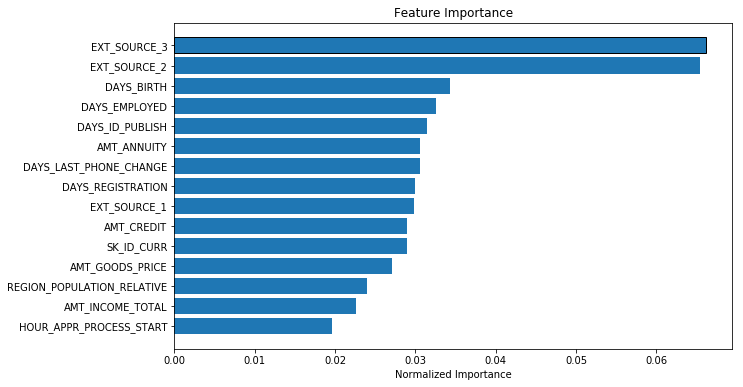

In [172]:
#Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

<h5> How many credits are currently active or closed </h5>

<h1>Manual Feature Engineering </h1>

In [49]:
# read bureau.csv data
bureau = pd.read_csv('bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [174]:
#Groupby the client id (SK_ID_CURR), count the number of previous loans and rename the column
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns={'SK_ID_BUREAU':'previous_loan_counts'})
previous_loan_counts.head()

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [194]:
#Join to the training dataframe
train = pd.read_csv('application_train.csv')
train = train.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')

#Fill in the missing values with 0
train['previous_loan_counts'] = train['previous_loan_counts'].fillna(0)
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,previous_loan_counts
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [195]:
#Group by the client id, calculate aggregation statistics
bureau_agg = bureau.drop(['SK_ID_BUREAU'],axis=1).groupby('SK_ID_CURR',as_index = False).agg(['count','mean','max','min','sum']).reset_index()
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                               CREDIT_DAY_OVERDUE  \
                   count         mean  max   min   sum              count   
0     100001           7  -735.000000  -49 -1572 -5145                  7   
1     100002           8  -874.000000 -103 -1437 -6992                  8   
2     100003           4 -1400.750000 -606 -2586 -5603                  4   
3     100004           2  -867.000000 -408 -1326 -1734                  2   
4     100005           3  -190.666667  -62  -373  -572                  3   

                 ...    DAYS_CREDIT_UPDATE                               \
  mean max min   ...                 count        mean  max   min   sum   
0  0.0   0   0   ...                     7  -93.142857   -6  -155  -652   
1  0.0   0   0   ...                     8 -499.875000   -7 -1185 -3999   
2  0.0   0   0   ...                     4 -816.000000  -43 -2131 -3264   
3  0.0   0   0   ...                     2 -532.000000 -382  -682 -1064   
4  0.0   0   0   ...                     3  -54.333333  -11  -121  -163   

  AMT_ANNUITY                                      
        count         mean      max  min      sum  
0           7  3545.357143  10822.5  0.0  24817.5  
1           7     0.000000      0.0  0.0      0.0  
2           0          NaN      NaN  NaN      NaN  
3           0          NaN      NaN  NaN      NaN  
4           3  1420.500000   4261.5  0.0   4261.5  

[5 rows x 61 columns]

In [196]:
#List of column names
columns = ['SK_ID_CURR']

#Iterate through the variable names
for var in bureau_agg.columns.levels[0]:
    if var != 'SK_ID_CURR':
        #Iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            #Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' %(var,stat))
            

In [197]:
#Assign the list of columns names as the dataframe column names
bureau_agg.columns = columns
bureau_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,NaN
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,NaN
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


In [198]:
#Merge with training data
train = train.merge(bureau_agg, on = 'SK_ID_CURR',how = 'left')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,8.0,-499.875,-7.0,-1185.0,-3999.0,7.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,4.0,-816.000,-43.0,-2131.0,-3264.0,0.0,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2.0,-532.000,-382.0,-682.0,-1064.0,0.0,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1.0,-783.000,-783.0,-783.0,-783.0,0.0,NaN,NaN,NaN,NaN


In [199]:
#List of new correlations
new_corrs = []

#Iterate throught the columns
for col in columns:
    #Calculate the correlation with the target
    corr = train['TARGET'].corr(train[col])
    #Append the list as a tuple
    new_corrs.append((col,corr))
    
#Sort the correlations by absolute value
#Make sure to reverse to put the largest values at the front of the list
new_corrs = sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
new_corrs[:15]



[('bureau_DAYS_CREDIT_mean', 0.08972896721998122),
 ('bureau_DAYS_CREDIT_min', 0.075248251030103602),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.068927352669686678),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.055887379843921128),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.054235352153039457),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.053199625857586613),
 ('bureau_DAYS_CREDIT_max', 0.049782054639973095),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.046982754334835432),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.042863922470730176),
 ('bureau_DAYS_CREDIT_sum', 0.041999824814846841),
 ('bureau_DAYS_CREDIT_UPDATE_sum', 0.041403635353060041),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.038956854836625518),
 ('bureau_DAYS_CREDIT_ENDDATE_max', 0.036589634696329046),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.034281109921615989),
 ('bureau_DAYS_ENDDATE_FACT_count', -0.030492306653325547)]

In [200]:
categorical = pd.get_dummies(bureau.select_dtypes(include=['object']))
categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
categorical.head()

,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,...,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,SK_ID_CURR
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354


In [201]:
categorical_grouped = categorical.groupby('SK_ID_CURR').agg(['sum','mean'])
categorical_grouped.head()

CREDIT_ACTIVE_Active           CREDIT_ACTIVE_Bad debt       \
                            sum      mean                    sum mean   
SK_ID_CURR                                                              
100001                        3  0.428571                      0  0.0   
100002                        2  0.250000                      0  0.0   
100003                        1  0.250000                      0  0.0   
100004                        0  0.000000                      0  0.0   
100005                        2  0.666667                      0  0.0   

           CREDIT_ACTIVE_Closed           CREDIT_ACTIVE_Sold       \
                            sum      mean                sum mean   
SK_ID_CURR                                                          
100001                        4  0.571429                  0  0.0   
100002                        6  0.750000                  0  0.0   
100003                        3  0.750000                  0  0.0   
100004                        2  1.000000                  0  0.0   
100005                        1  0.333333                  0  0.0   

           CREDIT_CURRENCY_currency 1      ...  CREDIT_TYPE_Microloan       \
                                  sum mean ...                    sum mean   
SK_ID_CURR                                 ...                               
100001                              7  1.0 ...                      0  0.0   
100002                              8  1.0 ...                      0  0.0   
100003                              4  1.0 ...                      0  0.0   
100004                              2  1.0 ...                      0  0.0   
100005                              3  1.0 ...                      0  0.0   

           CREDIT_TYPE_Mobile operator loan      CREDIT_TYPE_Mortgage       \
                                        sum mean                  sum mean   
SK_ID_CURR                                                                   
100001                                    0  0.0                    0  0.0   
100002                                    0  0.0                    0  0.0   
100003                                    0  0.0                    0  0.0   
100004                                    0  0.0                    0  0.0   
100005                                    0  0.0                    0  0.0   

           CREDIT_TYPE_Real estate loan      CREDIT_TYPE_Unknown type of loan  \
                                    sum mean                              sum   
SK_ID_CURR                                                                      
100001                                0  0.0                                0   
100002                                0  0.0                                0   
100003                                0  0.0                                0   
100004                                0  0.0                                0   
100005                                0  0.0                                0   

                 
           mean  
SK_ID_CURR       
100001      0.0  
100002      0.0  
100003      0.0  
100004      0.0  
100005      0.0  

[5 rows x 46 columns]

The sum columns represent the count of that category for the associated client and the mean represents the normalized count. One-hot encoding makes the process of calculating these figures very easy.
We can merge this dataframe into the training data

In [203]:
group_var = 'SK_ID_CURR'

#Need to create new column names
columns = []

#Iterate through variable names
for var in categorical_grouped.columns.levels[0]:
    #Skip the grouping variable
    if var != group_var:
            for stat in ['count','count_norm']:
                columns.append('%s_%s' % (var,stat))
                
#Rename the columns
categorical_grouped.columns = columns
categorical_grouped.head()

,CREDIT_ACTIVE_Active_count,CREDIT_ACTIVE_Active_count_norm,CREDIT_ACTIVE_Bad debt_count,CREDIT_ACTIVE_Bad debt_count_norm,CREDIT_ACTIVE_Closed_count,CREDIT_ACTIVE_Closed_count_norm,CREDIT_ACTIVE_Sold_count,CREDIT_ACTIVE_Sold_count_norm,CREDIT_CURRENCY_currency 1_count,CREDIT_CURRENCY_currency 1_count_norm,...,CREDIT_TYPE_Microloan_count,CREDIT_TYPE_Microloan_count_norm,CREDIT_TYPE_Mobile operator loan_count,CREDIT_TYPE_Mobile operator loan_count_norm,CREDIT_TYPE_Mortgage_count,CREDIT_TYPE_Mortgage_count_norm,CREDIT_TYPE_Real estate loan_count,CREDIT_TYPE_Real estate loan_count_norm,CREDIT_TYPE_Unknown type of loan_count,CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [204]:
train = train.merge(categorical_grouped,left_on = 'SK_ID_CURR', right_index = True, how = 'left')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CREDIT_TYPE_Microloan_count,CREDIT_TYPE_Microloan_count_norm,CREDIT_TYPE_Mobile operator loan_count,CREDIT_TYPE_Mobile operator loan_count_norm,CREDIT_TYPE_Mortgage_count,CREDIT_TYPE_Mortgage_count_norm,CREDIT_TYPE_Real estate loan_count,CREDIT_TYPE_Real estate loan_count_norm,CREDIT_TYPE_Unknown type of loan_count,CREDIT_TYPE_Unknown type of loan_count_norm
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
train.shape

(307511, 229)

In [208]:
train.iloc[:10,123:]

,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_sum,...,CREDIT_TYPE_Microloan_count,CREDIT_TYPE_Microloan_count_norm,CREDIT_TYPE_Mobile operator loan_count,CREDIT_TYPE_Mobile operator loan_count_norm,CREDIT_TYPE_Mortgage_count,CREDIT_TYPE_Mortgage_count_norm,CREDIT_TYPE_Real estate loan_count,CREDIT_TYPE_Real estate loan_count_norm,CREDIT_TYPE_Unknown type of loan_count,CREDIT_TYPE_Unknown type of loan_count_norm
0,8.0,-874.000000,-103.0,-1437.0,-6992.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,-1400.750000,-606.0,-2586.0,-5603.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,-867.000000,-408.0,-1326.0,-1734.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,-1149.000000,-1149.0,-1149.0,-1149.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,-757.333333,-78.0,-1097.0,-2272.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,18.0,-1271.500000,-239.0,-2882.0,-22887.0,18.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2.0,-1939.500000,-1138.0,-2741.0,-3879.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,-1773.000000,-1309.0,-2508.0,-7092.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def count_categorical(df,group_var,df_name):
    categorical = pd.get_dummies(df.select_dtypes(include = ['object']))
    categorical[group_var] = df[group_var]
    categorical = categorical.groupby(group_var).agg(['sum','mean'])
    column_names = []
    for var in categorical.columns.levels[0]:
        for stat in ['count','count_norm']:
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    categorical.columns = column_names
    return categorical
    

In [9]:
bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head()

,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_count_norm,...,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [10]:
bureau_balance = pd.read_csv('bureau_balance.csv')
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [11]:
def agg_numeric(df, group_var, df_name):    
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes(include = ['number'])
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [12]:
def target_corrs(df):

    # List of correlations
    corrs = []

    # Iterate through the columns 
    for col in df.columns:
        print(col)
        # Skip the target column
        if col != 'TARGET':
            # Calculate correlation with the target
            corr = df['TARGET'].corr(df[col])

            # Append the list as a tuple
            corrs.append((col, corr))
            
    # Sort by absolute magnitude of correlations
    corrs = sorted(corrs, key = lambda x: abs(x[1]), reverse = True)
    
    return corrs

In [13]:
bureau_balance_counts = count_categorical(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_counts.head()

,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,bureau_balance_STATUS_2_count,bureau_balance_STATUS_2_count_norm,bureau_balance_STATUS_3_count,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm
SK_ID_BUREAU,,,,,,,,,,,,,,,,
5001709,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402
5001710,5,0.060241,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446
5001711,3,0.750000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000
5001712,10,0.526316,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000
5001713,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000


In [14]:
bureau_balance_agg = agg_numeric(bureau_balance, group_var='SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_agg.head()

/Users/hraja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum
0,5001709,97,-48.0,0,-96,-4656
1,5001710,83,-41.0,0,-82,-3403
2,5001711,4,-1.5,0,-3,-6
3,5001712,19,-9.0,0,-18,-171
4,5001713,22,-10.5,0,-21,-231


In [15]:
#Dataframe grouped by the loan
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index = True, left_on = 'SK_ID_BUREAU', how = 'outer')

#Merge to include the SK_ID_CURR
bureau_by_loan = bureau_by_loan.merge(bureau[['SK_ID_BUREAU','SK_ID_CURR']], on='SK_ID_BUREAU', how = 'left')
bureau_by_loan.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,...,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm,SK_ID_CURR
0,5001709,97,-48.0,0,-96,-4656,0,0.000000,0,0.0,...,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402,NaN
1,5001710,83,-41.0,0,-82,-3403,5,0.060241,0,0.0,...,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446,162368.0
2,5001711,4,-1.5,0,-3,-6,3,0.750000,0,0.0,...,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000,162368.0
3,5001712,19,-9.0,0,-18,-171,10,0.526316,0,0.0,...,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000,162368.0
4,5001713,22,-10.5,0,-21,-231,0,0.000000,0,0.0,...,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000,150635.0


In [16]:
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(['SK_ID_BUREAU'],axis=1), group_var='SK_ID_CURR', df_name = 'client')
bureau_balance_by_client.head()

,SK_ID_CURR,client_bureau_balance_MONTHS_BALANCE_count_count,client_bureau_balance_MONTHS_BALANCE_count_mean,client_bureau_balance_MONTHS_BALANCE_count_max,client_bureau_balance_MONTHS_BALANCE_count_min,client_bureau_balance_MONTHS_BALANCE_count_sum,client_bureau_balance_MONTHS_BALANCE_mean_count,client_bureau_balance_MONTHS_BALANCE_mean_mean,client_bureau_balance_MONTHS_BALANCE_mean_max,client_bureau_balance_MONTHS_BALANCE_mean_min,...,client_bureau_balance_STATUS_X_count_count,client_bureau_balance_STATUS_X_count_mean,client_bureau_balance_STATUS_X_count_max,client_bureau_balance_STATUS_X_count_min,client_bureau_balance_STATUS_X_count_sum,client_bureau_balance_STATUS_X_count_norm_count,client_bureau_balance_STATUS_X_count_norm_mean,client_bureau_balance_STATUS_X_count_norm_max,client_bureau_balance_STATUS_X_count_norm_min,client_bureau_balance_STATUS_X_count_norm_sum
0,100001.0,7,24.571429,52,2,172,7,-11.785714,-0.5,-25.5,...,7,4.285714,9,0,30.0,7,0.214590,0.500000,0.0,1.502129
1,100002.0,8,13.750000,22,4,110,8,-21.875000,-1.5,-39.5,...,8,1.875000,3,0,15.0,8,0.161932,0.500000,0.0,1.295455
2,100005.0,3,7.000000,13,3,21,3,-3.000000,-1.0,-6.0,...,3,0.666667,1,0,2.0,3,0.136752,0.333333,0.0,0.410256
3,100010.0,2,36.000000,36,36,72,2,-46.000000,-19.5,-72.5,...,2,0.000000,0,0,0.0,2,0.000000,0.000000,0.0,0.000000
4,100013.0,4,57.500000,69,40,230,4,-28.250000,-19.5,-34.0,...,4,10.250000,40,0,41.0,4,0.254545,1.000000,0.0,1.018182


In [17]:
import gc
gc.enable()
del train, bureau, bureau_balance, bureau_agg, bureau_balance_agg, bureau_balance_counts,bureau_by_loan, bureau_balance_by_client, bureau_counts
gc.collect()

NameError: name 'train' is not defined

In [18]:
train = pd.read_csv('application_train.csv')
bureau = pd.read_csv('bureau.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')

bureau_counts = count_categorical(bureau,group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head()

,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_count_norm,...,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


<b>Aggregated Stats of Bureau Dataframe </b>

In [19]:
bureau_agg = agg_numeric(bureau.drop(['SK_ID_BUREAU'],axis = 1), group_var = 'SK_ID_CURR', df_name='bureau')
bureau_agg.head()

/Users/hraja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,NaN
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,NaN
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


<b>Value Counts of Bureau Balance dataframe by loan </b>

In [20]:
bureau_balance_counts = count_categorical(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_counts.head()

,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,bureau_balance_STATUS_2_count,bureau_balance_STATUS_2_count_norm,bureau_balance_STATUS_3_count,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm
SK_ID_BUREAU,,,,,,,,,,,,,,,,
5001709,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402
5001710,5,0.060241,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446
5001711,3,0.750000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000
5001712,10,0.526316,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000
5001713,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000


<b> Aggregated stats of Bureau Balance dataframe by loan </b>

In [21]:
bureau_balance_agg = agg_numeric(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_agg.head()

/Users/hraja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum
0,5001709,97,-48.0,0,-96,-4656
1,5001710,83,-41.0,0,-82,-3403
2,5001711,4,-1.5,0,-3,-6
3,5001712,19,-9.0,0,-18,-171
4,5001713,22,-10.5,0,-21,-231


<b> Aggregated Stats of Bureau Balance by Client </b>

In [22]:
# Dataframe grouped by the loan
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index = True, left_on = 'SK_ID_BUREAU', how='outer')

#Merge to include the SK_ID_CURR
bureau_by_loan = bureau[['SK_ID_BUREAU','SK_ID_CURR']].merge(bureau_by_loan, on = 'SK_ID_BUREAU', how='left')

#Aggregate the stats for each client
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(['SK_ID_BUREAU'],axis=1), group_var = 'SK_ID_CURR', df_name = 'client')

<b>Insert Computed features into training data</b>

In [23]:
original_features = list(train.columns)
print('Original Number of Features:' , len(original_features))

Original Number of Features: 122


In [24]:
train.shape

(307511, 122)

In [25]:
bureau_counts.shape

(305811, 46)

In [26]:
#Merge with the value counts of bureau
train = train.merge(bureau_counts,right_index = True, left_on= 'SK_ID_CURR',how = 'left')
#Merge with the stats of bureau
train = train.merge(bureau_agg, on = 'SK_ID_CURR', how='left')
#Merge with the monthly info grouped by client
train = train.merge(bureau_balance_by_client, on='SK_ID_CURR',how='left')

In [27]:
new_features = list(train.columns)
print('Number of features using previous loans from other institutions',len(new_features))

Number of features using previous loans from other institutions 333


In [28]:
test = pd.read_csv('application_test.csv')
print(test.shape)

(48744, 121)


In [29]:
#read the test dataframe
test = pd.read_csv('application_test.csv')
#Merge with the value counts of bureau
test = test.merge(bureau_counts,right_index = True, left_on= 'SK_ID_CURR',how = 'left')
#Merge with the stats of bureau
test = test.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

#Merge with the value counts of bureau balance
test = test.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how='left')

In [30]:
print('Shape of Testing Data: ', test.shape)

Shape of Testing Data:  (48744, 332)


In [31]:
train_labels = train['TARGET']

#Align the dataframes , this will remove the 'TARGET' column
train, test = train.align(test,join = 'inner', axis = 1)
train['TARGET'] = train_labels

In [32]:
print('Training Data Shape: ', train.shape)
print('Testing Data Shape: ', test.shape)

Training Data Shape:  (307511, 333)
Testing Data Shape:  (48744, 332)


In [33]:
train.to_csv('train_bureau_raw.csv', index = False)
test.to_csv('test_bureau_raw.csv', index = False)

In [34]:
corrs = train.corr()

In [35]:
corrs = corrs.sort_values('TARGET',ascending = False)
#Ten most positive correlations
pd.DataFrame(corrs['TARGET'].head(10))

,TARGET
TARGET,1.000000
bureau_DAYS_CREDIT_mean,0.089729
client_bureau_balance_MONTHS_BALANCE_min_mean,0.089038
DAYS_BIRTH,0.078239
bureau_CREDIT_ACTIVE_Active_count_norm,0.077356
client_bureau_balance_MONTHS_BALANCE_mean_mean,0.076424
bureau_DAYS_CREDIT_min,0.075248
client_bureau_balance_MONTHS_BALANCE_min_min,0.073225
client_bureau_balance_MONTHS_BALANCE_sum_mean,0.072606
bureau_DAYS_CREDIT_UPDATE_mean,0.068927


Look for variables that have greater than 0.8 correlation with other variables

In [36]:
#Set the threshold
threshold = 0.8

#Empty dictionary to hold correlated variables
above_threshold_vars = {}

#For each in column, record the variables that are above the threshold
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])
    
#print(above_threshold_vars)

In [ ]:
#Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []
for key, value in above_threshold_vars.items():
    #Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            #Only want to remove one in a pair
            cols_to_remove.append(x)
            cols_to_remove_pair.append(key)
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))


In [ ]:
train_corrs_removed = train.drop(cols_to_remove, axis = 1)
test_corrs_removed = test.drop(cols_to_remove, axis = 1)

print('Training Corrs Removed Shape: ', train_corrs_removed.shape)
print('Testing Corrs Removed Shape: ', test_corrs_removed.shape)

In [39]:
train_corrs_removed.to_csv('train_bureau_corrs_removed.csv', index = False)
test_corrs_removed.to_csv('test_bureau_corrs_removed.csv', index = False)

<h2> Importing data again and applying xgboost </h2>

In [7]:
train_corrs_removed = pd.read_csv('train_bureau_corrs_removed.csv')
test_corrs_removed = pd.read_csv('test_bureau_corrs_removed.csv')
print(train_corrs_removed.shape)
print(test_corrs_removed.shape)

(307511, 145)
(48744, 144)


In [80]:
traintest = train_corrs_removed.copy()
removeCol = train_corrs_removed.select_dtypes(['object']).columns
traintest = traintest.drop(removeCol.values, axis = 1)
traintest.shape

(307511, 129)

In [99]:
train_xgb = traintest.copy()

In [101]:
test_xgb = test_corrs_removed.copy()
removeCol = test_corrs_removed.select_dtypes(['object']).columns
test_xgb = test_xgb.drop(removeCol.values, axis = 1)
test_xgb.shape

(48744, 128)

In [60]:
app_train_domain.dtypes.value_counts()

uint8      129
float64     70
int64       43
bool         1
dtype: int64

In [89]:
app_train_domain.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,1,0,1,0,1,False,2.007889,0.121978,0.060749,-0.067329
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,1,0,0,False,4.790750,0.132217,0.027598,-0.070862
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,False,2.000000,0.100000,0.050000,-0.011814
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,False,2.316167,0.219900,0.094941,-0.159905
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,False,4.222222,0.179963,0.042623,-0.152418


In [317]:
!pip install xgboost

    100% |████████████████████████████████| 583kB 804kB/s ta 0:00:01    26% |████████▋                       | 153kB 525kB/s eta 0:00:01
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /Users/hraja/Library/Caches/pip/wheels/7d/45/ff/92c864d34ae8e77df45b3e808eff15271a4d7dc071707b4f40
Successfully built xgboost
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [49]:
import xgboost as xgb

In [50]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

import gc

import matplotlib.pyplot as plt

In [51]:
train_corrs_removed_count = count_categorical(train_corrs_removed, group_var = 'SK_ID_CURR', df_name = 'train_corrs_removed')
train_corrs_removed_count.head()

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x108b225c0>>
Traceback (most recent call last):
  File "/Users/hraja/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


,train_corrs_removed_NAME_CONTRACT_TYPE_Cash loans_count,train_corrs_removed_NAME_CONTRACT_TYPE_Cash loans_count_norm,train_corrs_removed_NAME_CONTRACT_TYPE_Revolving loans_count,train_corrs_removed_NAME_CONTRACT_TYPE_Revolving loans_count_norm,train_corrs_removed_CODE_GENDER_F_count,train_corrs_removed_CODE_GENDER_F_count_norm,train_corrs_removed_CODE_GENDER_M_count,train_corrs_removed_CODE_GENDER_M_count_norm,train_corrs_removed_CODE_GENDER_XNA_count,train_corrs_removed_CODE_GENDER_XNA_count_norm,...,train_corrs_removed_WALLSMATERIAL_MODE_Panel_count,train_corrs_removed_WALLSMATERIAL_MODE_Panel_count_norm,"train_corrs_removed_WALLSMATERIAL_MODE_Stone, brick_count","train_corrs_removed_WALLSMATERIAL_MODE_Stone, brick_count_norm",train_corrs_removed_WALLSMATERIAL_MODE_Wooden_count,train_corrs_removed_WALLSMATERIAL_MODE_Wooden_count_norm,train_corrs_removed_EMERGENCYSTATE_MODE_No_count,train_corrs_removed_EMERGENCYSTATE_MODE_No_count_norm,train_corrs_removed_EMERGENCYSTATE_MODE_Yes_count,train_corrs_removed_EMERGENCYSTATE_MODE_Yes_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,1,0,0,0,0,1,1,0,0,...,0,0,1,1,0,0,1,1,0,0
100003,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
100004,0,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
100006,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100007,1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
test_corrs_removed_count = count_categorical(test_corrs_removed, group_var = 'SK_ID_CURR', df_name = 'test_corrs_removed')
test_corrs_removed_count.head()

,test_corrs_removed_NAME_CONTRACT_TYPE_Cash loans_count,test_corrs_removed_NAME_CONTRACT_TYPE_Cash loans_count_norm,test_corrs_removed_NAME_CONTRACT_TYPE_Revolving loans_count,test_corrs_removed_NAME_CONTRACT_TYPE_Revolving loans_count_norm,test_corrs_removed_CODE_GENDER_F_count,test_corrs_removed_CODE_GENDER_F_count_norm,test_corrs_removed_CODE_GENDER_M_count,test_corrs_removed_CODE_GENDER_M_count_norm,test_corrs_removed_FLAG_OWN_CAR_N_count,test_corrs_removed_FLAG_OWN_CAR_N_count_norm,...,test_corrs_removed_WALLSMATERIAL_MODE_Panel_count,test_corrs_removed_WALLSMATERIAL_MODE_Panel_count_norm,"test_corrs_removed_WALLSMATERIAL_MODE_Stone, brick_count","test_corrs_removed_WALLSMATERIAL_MODE_Stone, brick_count_norm",test_corrs_removed_WALLSMATERIAL_MODE_Wooden_count,test_corrs_removed_WALLSMATERIAL_MODE_Wooden_count_norm,test_corrs_removed_EMERGENCYSTATE_MODE_No_count,test_corrs_removed_EMERGENCYSTATE_MODE_No_count_norm,test_corrs_removed_EMERGENCYSTATE_MODE_Yes_count,test_corrs_removed_EMERGENCYSTATE_MODE_Yes_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,1,1,0,0,1,1,0,0,1,1,...,0,0,1,1,0,0,1,1,0,0
100005,1,1,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
100013,1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
100028,1,1,0,0,1,1,0,0,1,1,...,1,1,0,0,0,0,1,1,0,0
100038,1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
test_final = test_corrs_removed.merge(test_corrs_removed_count, right_index = True, left_on = 'SK_ID_CURR', how='left')
test_final.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,test_corrs_removed_WALLSMATERIAL_MODE_Panel_count,test_corrs_removed_WALLSMATERIAL_MODE_Panel_count_norm,"test_corrs_removed_WALLSMATERIAL_MODE_Stone, brick_count","test_corrs_removed_WALLSMATERIAL_MODE_Stone, brick_count_norm",test_corrs_removed_WALLSMATERIAL_MODE_Wooden_count,test_corrs_removed_WALLSMATERIAL_MODE_Wooden_count_norm,test_corrs_removed_EMERGENCYSTATE_MODE_No_count,test_corrs_removed_EMERGENCYSTATE_MODE_No_count_norm,test_corrs_removed_EMERGENCYSTATE_MODE_Yes_count,test_corrs_removed_EMERGENCYSTATE_MODE_Yes_count_norm
0,100001,Cash loans,F,N,Y,135000.0,20560.5,Unaccompanied,Working,Higher education,...,0,0,1,1,0,0,1,1,0,0
1,100005,Cash loans,M,N,Y,99000.0,17370.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0
2,100013,Cash loans,M,Y,Y,202500.0,69777.0,NaN,Working,Higher education,...,0,0,0,0,0,0,0,0,0,0
3,100028,Cash loans,F,N,Y,315000.0,49018.5,Unaccompanied,Working,Secondary / secondary special,...,1,1,0,0,0,0,1,1,0,0
4,100038,Cash loans,M,Y,N,180000.0,32067.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0


In [52]:
train_final = train_corrs_removed.merge(train_corrs_removed_count, right_index = True, left_on = 'SK_ID_CURR', how='outer')
train_final.head()


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,train_corrs_removed_WALLSMATERIAL_MODE_Panel_count,train_corrs_removed_WALLSMATERIAL_MODE_Panel_count_norm,"train_corrs_removed_WALLSMATERIAL_MODE_Stone, brick_count","train_corrs_removed_WALLSMATERIAL_MODE_Stone, brick_count_norm",train_corrs_removed_WALLSMATERIAL_MODE_Wooden_count,train_corrs_removed_WALLSMATERIAL_MODE_Wooden_count_norm,train_corrs_removed_EMERGENCYSTATE_MODE_No_count,train_corrs_removed_EMERGENCYSTATE_MODE_No_count_norm,train_corrs_removed_EMERGENCYSTATE_MODE_Yes_count,train_corrs_removed_EMERGENCYSTATE_MODE_Yes_count_norm
0,100002,Cash loans,M,N,Y,202500.0,24700.5,Unaccompanied,Working,Secondary / secondary special,...,0,0,1,1,0,0,1,1,0,0
1,100003,Cash loans,F,N,N,270000.0,35698.5,Family,State servant,Higher education,...,0,0,0,0,0,0,1,1,0,0
2,100004,Revolving loans,M,Y,Y,67500.0,6750.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0
3,100006,Cash loans,F,N,Y,135000.0,29686.5,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0
4,100007,Cash loans,M,N,Y,121500.0,21865.5,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0


In [59]:
train_xgb = train_final.iloc[:,123:]
train_xgb.dtypes.value_counts()

uint8      280
float64     21
int64        1
dtype: int64

In [84]:
test_xgb = test_final.iloc[:,123:]
test_xgb.dtypes.value_counts()

uint8      274
float64     21
dtype: int64

In [68]:
test_corrs_removed.dtypes.value_counts()

float64    95
int64      33
object     16
dtype: int64

In [135]:
test_xgb.head()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,...,client_bureau_balance_STATUS_3_count_norm_min,client_bureau_balance_STATUS_4_count_max,client_bureau_balance_STATUS_4_count_min,client_bureau_balance_STATUS_4_count_norm_min,client_bureau_balance_STATUS_C_count_norm_max,client_bureau_balance_STATUS_X_count_mean,client_bureau_balance_STATUS_X_count_min,client_bureau_balance_STATUS_X_count_norm_mean,client_bureau_balance_STATUS_X_count_norm_max,client_bureau_balance_STATUS_X_count_norm_min
0,100001,135000.0,20560.5,0.018850,-19241,-2329,-5170.0,-812,NaN,1,...,0.0,0.0,0.0,0.0,0.966667,4.285714,0.0,0.214590,0.500000,0.0
1,100005,99000.0,17370.0,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,...,0.0,0.0,0.0,0.0,0.384615,0.666667,0.0,0.136752,0.333333,0.0
2,100013,202500.0,69777.0,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,...,0.0,0.0,0.0,0.0,0.666667,10.250000,0.0,0.254545,1.000000,0.0
3,100028,315000.0,49018.5,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,...,0.0,0.0,0.0,0.0,0.885714,11.083333,0.0,0.260434,1.000000,0.0
4,100038,180000.0,32067.0,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
train_labels = train_xgb['TARGET']
train_xgb, test_xgb = train_xgb.align(test_xgb,join = 'inner', axis = 1)
train_xgb['TARGET'] = train_labels

In [137]:
print(train_xgb.shape)
print(test_xgb.shape)

(307511, 129)
(48744, 128)


In [141]:
#Create the parameter grid
gbm_param_grid = {
    'colsample_bytree': [0.3],
    'n_estimators' : [50],
    'max_depth' : [2]
}
#Instantiate the classifier: gbm
gbm = xgb.XGBClassifier()
#Perform grid search
grid_mse = GridSearchCV(param_grid = gbm_param_grid, estimator = gbm, scoring = 'accuracy', cv = 10, verbose = 1)
labels = train_xgb['TARGET']
features = train_xgb.drop(['SK_ID_CURR', 'TARGET'],axis = 1)
features = np.array(features)
labels = np.array(labels)
grid_mse.fit(features, labels)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  5.2min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'colsample_bytree': [0.3], 'n_estimators': [50], 'max_depth': [2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

array([1, 0, 0, ..., 0, 1, 0])

In [142]:
test_ids = test_xgb['SK_ID_CURR']
test_features = test_xgb.drop(['SK_ID_CURR'],axis = 1)
test_features = np.array(test_features)
 # Empty array for test predictions
test_predictions = np.zeros(test_features.shape[0])

In [143]:
test_features.shape

(48744, 127)

In [144]:
train_xgb.dtypes.value_counts()

float64    95
int64      34
dtype: int64

In [145]:
test_features

array([[  1.35000000e+05,   2.05605000e+04,   1.88500000e-02, ...,
          2.14589857e-01,   5.00000000e-01,   0.00000000e+00],
       [  9.90000000e+04,   1.73700000e+04,   3.57920000e-02, ...,
          1.36752137e-01,   3.33333333e-01,   0.00000000e+00],
       [  2.02500000e+05,   6.97770000e+04,   1.91010000e-02, ...,
          2.54545455e-01,   1.00000000e+00,   0.00000000e+00],
       ..., 
       [  2.02500000e+05,   3.32055000e+04,   2.63920000e-02, ...,
          1.00000000e-01,   3.75000000e-01,   0.00000000e+00],
       [  2.25000000e+05,   2.51280000e+04,   1.88500000e-02, ...,
          3.00689964e-01,   1.00000000e+00,   0.00000000e+00],
       [  1.35000000e+05,   2.47095000e+04,   6.62900000e-03, ...,
          6.17216117e-01,   9.28571429e-01,   0.00000000e+00]])

In [146]:
test_predictions = grid_mse.predict_proba(test_features)[:,1]

In [147]:
# Make the submission dataframe
submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})

In [150]:
submission.head()
submission.to_csv('xgboost_baseline_1.csv', index = False)

In [ ]:
clf = xgb.XGBClassifier(max_depth=2,
                           n_estimators=50,
                           objective='binary:logistic',
                           colsample_bytree=0.3)
clf.fit(train_xgb,train_label)

In [65]:
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Best parameters found:  {'colsample_bytree': 0.3, 'max_depth': 2, 'n_estimators': 50}
Lowest RMSE found:  0.958786305984


<h3> Find Missing values to improve xgboost model </h3>

In [152]:
missing_values = missing_values_table(train_xgb)
missing_values.head(20)

Your selected dataframe has 129 columns. There are 92 columns that have missing values.


,Missing Values,% of Total Values
bureau_AMT_ANNUITY_mean,227502,74.0
bureau_AMT_ANNUITY_min,227502,74.0
client_bureau_balance_STATUS_X_count_norm_min,215280,70.0
client_bureau_balance_STATUS_0_count_norm_mean,215280,70.0
client_bureau_balance_STATUS_1_count_norm_mean,215280,70.0
client_bureau_balance_STATUS_1_count_mean,215280,70.0
client_bureau_balance_STATUS_0_count_norm_sum,215280,70.0
client_bureau_balance_STATUS_0_count_norm_min,215280,70.0
client_bureau_balance_STATUS_0_count_norm_max,215280,70.0
client_bureau_balance_STATUS_0_count_min,215280,70.0


In [153]:
train_xgb.isnull().sum()

SK_ID_CURR                                             0
AMT_INCOME_TOTAL                                       0
AMT_ANNUITY                                           12
REGION_POPULATION_RELATIVE                             0
DAYS_BIRTH                                             0
DAYS_EMPLOYED                                          0
DAYS_REGISTRATION                                      0
DAYS_ID_PUBLISH                                        0
OWN_CAR_AGE                                       202929
FLAG_MOBIL                                             0
FLAG_EMP_PHONE                                         0
FLAG_WORK_PHONE                                        0
FLAG_CONT_MOBILE                                       0
FLAG_PHONE                                             0
FLAG_EMAIL                                             0
HOUR_APPR_PROCESS_START                                0
REG_REGION_NOT_LIVE_REGION                             0
REG_CITY_NOT_LIVE_CITY         

In [162]:
from sklearn.preprocessing import MinMaxScaler, Imputer
features = train_xgb.drop(['SK_ID_CURR', 'TARGET'],axis = 1)
test_ids = test_xgb['SK_ID_CURR']
test_features = test_xgb.drop(['SK_ID_CURR'],axis = 1)


imputer = Imputer(strategy = "median")
scaler = MinMaxScaler(feature_range = (0,1))

imputer.fit(features)
features_train = imputer.transform(features)
features_test = imputer.transform(test_features)

scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

print(features_train.shape)
print(features_test.shape)

(307511, 127)
(48744, 127)


In [171]:
train_xgb["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [163]:
#Create the parameter grid
gbm_param_grid = {
    'colsample_bytree': [0.3],
    'n_estimators' : [50],
    'max_depth' : [2]
}
#Instantiate the classifier: gbm
gbm = xgb.XGBClassifier()
#Perform grid search
grid_mse = GridSearchCV(param_grid = gbm_param_grid, estimator = gbm, scoring = 'accuracy', cv = 10, verbose = 1)
labels = train_xgb['TARGET']
labels = np.array(labels)
grid_mse.fit(features_train, labels)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.9min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'colsample_bytree': [0.3], 'n_estimators': [50], 'max_depth': [2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [168]:
print("Best parameters found: ", grid_mse.best_params_)

Best parameters found:  {'colsample_bytree': 0.3, 'max_depth': 2, 'n_estimators': 50}


In [165]:
#test_features = np.array(test_features)
 # Empty array for test predictions
test_predictions2 = np.zeros(features_test.shape[0])
test_predictions2 = grid_mse.predict_proba(features_test)[:,1]

In [166]:
# Make the submission dataframe
submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions2})
submission.head()
submission.to_csv('xgboost_baseline_2.csv', index = False)

In [167]:
submission.head()

,SK_ID_CURR,TARGET
0,100001,0.079208
1,100005,0.094431
2,100013,0.033678
3,100028,0.058093
4,100038,0.113465


<h2>Another try at XGBOOST </h2>


In [173]:
from sklearn.model_selection import train_test_split
y = train_xgb['TARGET']
X = train_xgb.drop(['SK_ID_CURR','TARGET'],axis = 1)
y = np.array(y)
X = np.array(X)

In [174]:
print(X.shape)
print(y.shape)

(307511, 127)
(307511,)


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify = y)

In [187]:
clf = xgb.XGBClassifier(max_depth=2,
                           n_estimators=50,
                           objective='binary:logistic',
                           colsample_bytree=0.3)
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [188]:
test_probs = clf.predict_proba(X_test)[:,1]

In [189]:
test_probs

array([ 0.08577873,  0.06492529,  0.1036181 , ...,  0.14351657,
        0.07267573,  0.04410022], dtype=float32)

In [197]:
from sklearn.model_selection import StratifiedKFold
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05,1], #so called `eta` value
              'max_depth': [3,6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.3,0.7],
              'n_estimators': [50,100], #number of trees, change it to 1000 for better results
              'seed': [1337]}
xgb_model = xgb.XGBClassifier()
clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] colsample_bytree=0.3, learning_rate=0.05, max_depth=3, min_child_weight=11, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV] colsample_bytree=0.3, learning_rate=0.05, max_depth=3, min_child_weight=11, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV] colsample_bytree=0.3, learning_rate=0.05, max_depth=3, min_child_weight=11, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV] colsample_bytree=0.3, learning_rate=0.05, max_depth=3, min_child_weight=11, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV] colsample_bytree=0.3, learning_rate=0.05, max_depth=3, min_child_weight=11, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=0.05, max_depth=3, min_child_weight=1

[CV] colsample_bytree=0.3, learning_rate=1, max_depth=3, min_child_weight=11, n_estimators=100, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=1, max_depth=3, min_child_weight=11, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total= 1.1min
[CV] colsample_bytree=0.3, learning_rate=1, max_depth=3, min_child_weight=11, n_estimators=100, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=1, max_depth=3, min_child_weight=11, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total= 1.1min
[CV] colsample_bytree=0.3, learning_rate=1, max_depth=3, min_child_weight=11, n_estimators=100, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=1, max_depth=3, min_child_weight=11, n_estimators=50, nthread=4, objective=binar

[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed: 17.6min


[CV] colsample_bytree=0.3, learning_rate=1, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=1, max_depth=6, min_child_weight=11, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total= 2.8min
[CV] colsample_bytree=0.3, learning_rate=1, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=1, max_depth=6, min_child_weight=11, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total= 2.8min
[CV] colsample_bytree=0.3, learning_rate=1, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.3, learning_rate=1, max_depth=6, min_child_weight=11, n_estimators=50, nthread=4, objective=binar

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total= 4.3min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total= 7.1min
[CV] colsample_bytree=0.7, learning_rate=1, max_depth=3, min_child_weight=11, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4,

[CV]  colsample_bytree=0.7, learning_rate=1, max_depth=6, min_child_weight=11, n_estimators=100, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total= 9.3min


[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed: 63.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=5,
       param_grid={'nthread': [4], 'objective': ['binary:logistic'], 'learning_rate': [0.05, 1], 'max_depth': [3, 6], 'min_child_weight': [11], 'silent': [1], 'subsample': [0.8], 'colsample_bytree': [0.3, 0.7], 'n_estimators': [50, 100], 'seed': [1337]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [201]:
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
print(best_parameters)

Raw AUC score: 0.744827961406
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'n_estimators': 100, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}


/Users/hraja/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [199]:
test_predictions3 = np.zeros(features_test.shape[0])
test_predictions3 = clf.predict_proba(features_test)[:,1]

In [200]:
# Make the submission dataframe
submission3 = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions3})
submission3.head()
submission3.to_csv('xgboost_baseline_4.csv', index = False)

In [207]:
print(len(y_train))
print(y_train.sum())

206032
16633


In [208]:
clf = xgb.XGBClassifier(max_depth=6,
                           n_estimators=100,
                           objective='binary:logistic',
                           colsample_bytree=0.7,scale_pos_weight = 11)
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=11, seed=None,
       silent=True, subsample=1)

In [209]:
test_predictions4 = np.zeros(features_test.shape[0])
test_predictions4 = clf.predict_proba(features_test)[:,1]

In [210]:
test_predictions4

array([ 0.39555016,  0.24432392,  0.1319094 , ...,  0.12273455,
        0.12965657,  0.28407592], dtype=float32)

In [211]:
submission3 = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions4})
submission3.head()
submission3.to_csv('xgboost_baseline_5.csv', index = False)

<h4>Doing with the features train dataset</h4>

In [217]:
labels = train_xgb['TARGET']
labels = np.array(labels)
clf = xgb.XGBClassifier(max_depth=6,
                           n_estimators=100,
                           objective='binary:logistic',
                           colsample_bytree=0.7,scale_pos_weight = 11)
clf.fit(features_train,labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=11, seed=None,
       silent=True, subsample=1)

In [216]:
print(labels.sum())
print(len(labels))

24825
307511


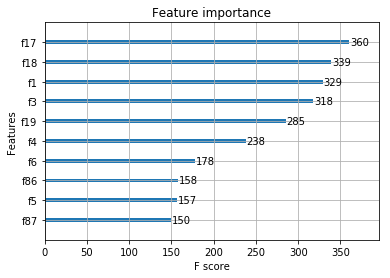

In [223]:
xgb.plot_importance(clf,max_num_features = 10)
plt.show()

,AMT_INCOME_TOTAL,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,...,client_bureau_balance_STATUS_3_count_norm_min,client_bureau_balance_STATUS_4_count_max,client_bureau_balance_STATUS_4_count_min,client_bureau_balance_STATUS_4_count_norm_min,client_bureau_balance_STATUS_C_count_norm_max,client_bureau_balance_STATUS_X_count_mean,client_bureau_balance_STATUS_X_count_min,client_bureau_balance_STATUS_X_count_norm_mean,client_bureau_balance_STATUS_X_count_norm_max,client_bureau_balance_STATUS_X_count_norm_min
0,202500.0,24700.5,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,...,0.0,0.0,0.0,0.0,0.8125,1.875,0.0,0.161932,0.5,0.0
1,270000.0,35698.5,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,67500.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135000.0,29686.5,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,21865.5,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
test_predictions5 = np.zeros(features_test.shape[0])
test_predictions5 = clf.predict_proba(features_test)[:,1]

In [219]:
test_predictions5

array([ 0.20838231,  0.52851641,  0.08564489, ...,  0.15491228,
        0.42891639,  0.75482309], dtype=float32)

In [220]:
submission3 = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions5})
submission3.head()
submission3.to_csv('xgboost_baseline_6.csv', index = False)

<h2> Previous Application Data </h2>

In [237]:
previous = pd.read_csv('previous_application.csv')
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
print(previous.shape)

(1670214, 37)


In [239]:
previous.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [240]:
previous.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [241]:
#drop Rate interest primary and rate interest priveleged because its missing for majority of records
previous = previous.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis = 1)

In [242]:
previous.shape

(1670214, 35)

In [246]:
#Try label encoding
le = LabelEncoder()
le_count = 0

for col in previous:
    if previous[col].dtypes == 'object' : 
        if len(previous[col].unique()) <= 2:
            le.fit(previous[col])
            previous[col] = le.transform(previous[col])
            le_count +=1
print('%d columns were label encoded' %le_count)

1 columns were label encoded


In [247]:
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
#one hot encoding of categorical variables
previous_new = pd.get_dummies(previous)

In [254]:
previous_new.dtypes.value_counts()

uint8      141
float64     13
int64        7
dtype: int64

In [270]:
previous_new.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,15,1,1,...,0,0,0,0,0,0,1,0,0,0
1,2802425,108129,25188.615,607500.0,679671.0,NaN,607500.0,11,1,1,...,1,0,0,0,0,0,0,0,0,0
2,2523466,122040,15060.735,112500.0,136444.5,NaN,112500.0,11,1,1,...,0,0,0,0,0,0,0,0,0,0
3,2819243,176158,47041.335,450000.0,470790.0,NaN,450000.0,7,1,1,...,0,1,0,0,0,0,0,0,0,0
4,1784265,202054,31924.395,337500.0,404055.0,NaN,337500.0,9,1,1,...,0,0,0,0,0,0,0,0,0,0


In [271]:
previous_new['PREV_CREDIT_TERM'] = previous_new['AMT_ANNUITY'] / previous_new['AMT_CREDIT']

In [272]:
previous_new_agg = agg_numeric(previous_new.drop(['SK_ID_PREV'],axis=1),'SK_ID_CURR','previousApp')

In [273]:
previous_new_agg.head()

,SK_ID_CURR,previousApp_AMT_ANNUITY_mean,previousApp_AMT_ANNUITY_sum,previousApp_AMT_APPLICATION_mean,previousApp_AMT_APPLICATION_sum,previousApp_AMT_CREDIT_mean,previousApp_AMT_CREDIT_sum,previousApp_AMT_DOWN_PAYMENT_mean,previousApp_AMT_DOWN_PAYMENT_sum,previousApp_AMT_GOODS_PRICE_mean,...,previousApp_PRODUCT_COMBINATION_POS mobile with interest_mean,previousApp_PRODUCT_COMBINATION_POS mobile with interest_sum,previousApp_PRODUCT_COMBINATION_POS mobile without interest_mean,previousApp_PRODUCT_COMBINATION_POS mobile without interest_sum,previousApp_PRODUCT_COMBINATION_POS other with interest_mean,previousApp_PRODUCT_COMBINATION_POS other with interest_sum,previousApp_PRODUCT_COMBINATION_POS others without interest_mean,previousApp_PRODUCT_COMBINATION_POS others without interest_sum,previousApp_PREV_CREDIT_TERM_mean,previousApp_PREV_CREDIT_TERM_sum
0,100001,3951.000,3951.000,24835.50,24835.5,23787.00,23787.0,2520.0,2520.0,24835.5,...,1.0,1,0.0,0,0.0,0,0.0,0,0.166099,0.166099
1,100002,9251.775,9251.775,179055.00,179055.0,179055.00,179055.0,0.0,0.0,179055.0,...,0.0,0,0.0,0,1.0,1,0.0,0,0.051670,0.051670
2,100003,56553.990,169661.970,435436.50,1306309.5,484191.00,1452573.0,3442.5,6885.0,435436.5,...,0.0,0,0.0,0,0.0,0,0.0,0,0.126383,0.379150
3,100004,5357.250,5357.250,24282.00,24282.0,20106.00,20106.0,4860.0,4860.0,24282.0,...,0.0,0,1.0,1,0.0,0,0.0,0,0.266450,0.266450
4,100005,4813.200,4813.200,22308.75,44617.5,20076.75,40153.5,4464.0,4464.0,44617.5,...,0.5,1,0.0,0,0.0,0,0.0,0,0.119870,0.119870


In [274]:
previous_new_agg.shape

(338857, 321)

In [258]:
def agg_numeric(df, group_var, df_name):    
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes(include = ['number'])
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['mean', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

<h4> POS Cash Balance </h4>

In [255]:
pos_cash_balance = pd.read_csv('POS_CASH_balance.csv')
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


Each Previous application has just one entry in the pos cash balance. SK ID CURR has multiple SK_ID_PREV in the data 

In [257]:
pos_cash_balance.groupby(['SK_ID_PREV','SK_ID_CURR']).sum()

,,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
SK_ID_PREV,SK_ID_CURR,,,,,
1000001,158271,-27,26.0,23.0,0,0
1000002,101962,-260,26.0,10.0,0,0
1000003,252457,-10,48.0,42.0,0,0
1000004,260094,-204,77.0,49.0,0,0
1000005,176456,-561,110.0,55.0,0,0
1000007,256657,-15,30.0,20.0,0,0
1000008,152059,-385,99.0,54.0,0,0
1000009,343078,-91,42.0,21.0,0,0
1000010,377567,-154,191.0,131.0,0,0


In [259]:
cash_balance = agg_numeric(pos_cash_balance.drop(['SK_ID_PREV'],axis=1),'SK_ID_CURR','cashBalance')

/Users/hraja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<h2>Cash Balance </h2>

In [260]:
cash_balance.head()

,SK_ID_CURR,cashBalance_MONTHS_BALANCE_mean,cashBalance_MONTHS_BALANCE_sum,cashBalance_CNT_INSTALMENT_mean,cashBalance_CNT_INSTALMENT_sum,cashBalance_CNT_INSTALMENT_FUTURE_mean,cashBalance_CNT_INSTALMENT_FUTURE_sum,cashBalance_SK_DPD_mean,cashBalance_SK_DPD_sum,cashBalance_SK_DPD_DEF_mean,cashBalance_SK_DPD_DEF_sum
0,100001,-72.555556,-653,4.000000,36.0,1.444444,13.0,0.777778,7,0.777778,7
1,100002,-10.000000,-190,24.000000,456.0,15.000000,285.0,0.000000,0,0.000000,0
2,100003,-43.785714,-1226,10.107143,283.0,5.785714,162.0,0.000000,0,0.000000,0
3,100004,-25.500000,-102,3.750000,15.0,2.250000,9.0,0.000000,0,0.000000,0
4,100005,-20.000000,-220,11.700000,117.0,7.200000,72.0,0.000000,0,0.000000,0


<h2>Credit Card Balance </h2>

In [261]:
credit_card_balance = pd.read_csv('credit_card_balance.csv')
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [262]:
credit_balance = agg_numeric(credit_card_balance.drop(['SK_ID_PREV'], axis=1),'SK_ID_CURR','creditBalance')

/Users/hraja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [265]:
credit_balance.head()
print(credit_balance.shape)

(103558, 41)


<h2>INSTALLMENT PAYMENTS</h2> 

In [267]:
installments_payments = pd.read_csv('installments_payments.csv')
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [268]:
installments = agg_numeric(installments_payments.drop(['SK_ID_PREV'],axis=1),'SK_ID_CURR','installment')

In [269]:
installments.head()

,SK_ID_CURR,installment_NUM_INSTALMENT_VERSION_mean,installment_NUM_INSTALMENT_VERSION_sum,installment_NUM_INSTALMENT_NUMBER_mean,installment_NUM_INSTALMENT_NUMBER_sum,installment_DAYS_INSTALMENT_mean,installment_DAYS_INSTALMENT_sum,installment_DAYS_ENTRY_PAYMENT_mean,installment_DAYS_ENTRY_PAYMENT_sum,installment_AMT_INSTALMENT_mean,installment_AMT_INSTALMENT_sum,installment_AMT_PAYMENT_mean,installment_AMT_PAYMENT_sum
0,100001,1.142857,8.0,2.714286,19,-2187.714286,-15314.0,-2195.000000,-15365.0,5885.132143,41195.925,5885.132143,41195.925
1,100002,1.052632,20.0,10.000000,190,-295.000000,-5605.0,-315.421053,-5993.0,11559.247105,219625.695,11559.247105,219625.695
2,100003,1.040000,26.0,5.080000,127,-1378.160000,-34454.0,-1385.320000,-34633.0,64754.586000,1618864.650,64754.586000,1618864.650
3,100004,1.333333,4.0,2.000000,6,-754.000000,-2262.0,-761.666667,-2285.0,7096.155000,21288.465,7096.155000,21288.465
4,100005,1.111111,10.0,5.000000,45,-586.000000,-5274.0,-609.555556,-5486.0,6240.205000,56161.845,6240.205000,56161.845


In [285]:
combinedPreviousApp = previous_new_agg.merge(cash_balance,on='SK_ID_CURR',how='left')

In [286]:
combinedPreviousApp.shape

(338857, 331)

In [287]:
combinedPreviousApp = combinedPreviousApp.merge(credit_balance,on='SK_ID_CURR',how='left')

In [288]:
combinedPreviousApp.shape

(338857, 371)

In [289]:
combinedPreviousApp = combinedPreviousApp.merge(installments,on='SK_ID_CURR',how='left')

In [290]:
combinedPreviousApp.shape

(338857, 383)

In [292]:
test_xgb.head()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,...,client_bureau_balance_STATUS_3_count_norm_min,client_bureau_balance_STATUS_4_count_max,client_bureau_balance_STATUS_4_count_min,client_bureau_balance_STATUS_4_count_norm_min,client_bureau_balance_STATUS_C_count_norm_max,client_bureau_balance_STATUS_X_count_mean,client_bureau_balance_STATUS_X_count_min,client_bureau_balance_STATUS_X_count_norm_mean,client_bureau_balance_STATUS_X_count_norm_max,client_bureau_balance_STATUS_X_count_norm_min
0,100001,135000.0,20560.5,0.018850,-19241,-2329,-5170.0,-812,NaN,1,...,0.0,0.0,0.0,0.0,0.966667,4.285714,0.0,0.214590,0.500000,0.0
1,100005,99000.0,17370.0,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,...,0.0,0.0,0.0,0.0,0.384615,0.666667,0.0,0.136752,0.333333,0.0
2,100013,202500.0,69777.0,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,...,0.0,0.0,0.0,0.0,0.666667,10.250000,0.0,0.254545,1.000000,0.0
3,100028,315000.0,49018.5,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,...,0.0,0.0,0.0,0.0,0.885714,11.083333,0.0,0.260434,1.000000,0.0
4,100038,180000.0,32067.0,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [293]:
train_xgb_final = train_xgb.merge(combinedPreviousApp, on = 'SK_ID_CURR', how = 'left')
test_xgb_final = test_xgb.merge(combinedPreviousApp, on = 'SK_ID_CURR', how = 'left')

print('Training dataset final shape: ',train_xgb_final.shape)
print('Testing dataset final shape: ',test_xgb_final.shape)

Training dataset final shape:  (307511, 511)
Testing dataset final shape:  (48744, 510)


In [294]:
missing_values = missing_values_table(train_xgb_final)

Your selected dataframe has 511 columns. There are 474 columns that have missing values.


In [297]:
missing_values.head()

,Missing Values,% of Total Values
creditBalance_AMT_PAYMENT_CURRENT_mean,247082,80.3
creditBalance_AMT_PAYMENT_CURRENT_sum,247082,80.3
creditBalance_CNT_DRAWINGS_POS_CURRENT_sum,247003,80.3
creditBalance_AMT_DRAWINGS_ATM_CURRENT_sum,247003,80.3
creditBalance_AMT_DRAWINGS_OTHER_CURRENT_mean,247003,80.3


In [298]:
missing_values.sort_values(by='% of Total Values', ascending = False)

,Missing Values,% of Total Values
creditBalance_AMT_PAYMENT_CURRENT_mean,247082,80.3
creditBalance_CNT_DRAWINGS_POS_CURRENT_sum,247003,80.3
creditBalance_AMT_DRAWINGS_ATM_CURRENT_sum,247003,80.3
creditBalance_AMT_DRAWINGS_OTHER_CURRENT_mean,247003,80.3
creditBalance_AMT_DRAWINGS_OTHER_CURRENT_sum,247003,80.3
creditBalance_AMT_DRAWINGS_POS_CURRENT_mean,247003,80.3
creditBalance_AMT_DRAWINGS_POS_CURRENT_sum,247003,80.3
creditBalance_CNT_DRAWINGS_ATM_CURRENT_mean,247003,80.3
creditBalance_CNT_DRAWINGS_ATM_CURRENT_sum,247003,80.3
creditBalance_CNT_DRAWINGS_OTHER_CURRENT_mean,247003,80.3


In [299]:
train_xgb_final.dtypes.value_counts()

float64    477
int64       34
dtype: int64

In [300]:
#Saving Files
train_xgb.to_csv('train_xgb.csv')
test_xgb.to_csv('test_xgb.csv')
train_xgb_final.to_csv('train_xgb_final.csv')
test_xgb_final.to_csv('test_xgb_final.csv')
#features_train.to_csv('features_train.csv')
#features_test.to_csv('features_test.csv')


AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [301]:
combinedPreviousApp.to_csv('combinedPreviousApp')

In [302]:
train_labels = train_xgb_final['TARGET']
features = train_xgb_final.drop(['SK_ID_CURR', 'TARGET'],axis = 1)
test_ids = test_xgb_final['SK_ID_CURR']
test_features = test_xgb_final.drop(['SK_ID_CURR'],axis = 1)


imputer = Imputer(strategy = "median")
scaler = MinMaxScaler(feature_range = (0,1))

imputer.fit(features)
features_train = imputer.transform(features)
features_test = imputer.transform(test_features)

scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

print(features_train.shape)
print(features_test.shape)

(307511, 509)
(48744, 509)


In [303]:
labels = np.array(train_labels)
clf2 = xgb.XGBClassifier(max_depth=6,
                           n_estimators=100,
                           objective='binary:logistic',
                           colsample_bytree=0.7,scale_pos_weight = 11)
clf2.fit(features_train,labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=11, seed=None,
       silent=True, subsample=1)

In [305]:
test_predictions6 = np.zeros(features_test.shape[0])
test_predictions6 = clf2.predict_proba(features_test)[:,1]

In [306]:
test_predictions6

array([ 0.36163625,  0.49263769,  0.12925272, ...,  0.1159649 ,
        0.4397172 ,  0.74823058], dtype=float32)

In [307]:
submission4 = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions6})
submission4.head()
submission4.to_csv('xgboost_baseline_7.csv', index = False)

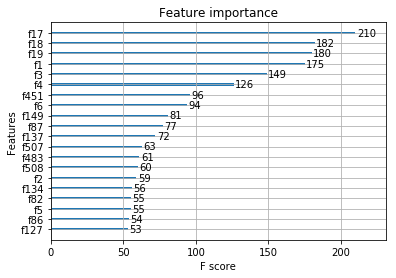

In [374]:
xgb.plot_importance(clf2,max_num_features = 20)
plt.show()

In [388]:
print(train_xgb_final.columns[149])

previousApp_SELLERPLACE_AREA_mean


In [397]:
train_filtered = train_xgb_final.iloc[:,[17,18,19,1,3,4,451,6,149,87,137,507,483,508,2,134,82,5,86,127]]
test_filtered = test_xgb_final.iloc[:,[17,18,19,1,3,4,451,6,149,87,137,507,483,508,2,134,82,5,86,127]]

In [398]:
print(train_filtered.shape)
print(test_filtered.shape)

(307511, 20)
(48744, 20)


In [400]:
train_filtered.head()

,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_1,EXT_SOURCE_2,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,DAYS_BIRTH,cashBalance_CNT_INSTALMENT_mean,DAYS_REGISTRATION,previousApp_SELLERPLACE_AREA_mean,bureau_AMT_CREDIT_SUM_min,previousApp_AMT_GOODS_PRICE_mean,installment_AMT_INSTALMENT_mean,creditBalance_AMT_TOTAL_RECEIVABLE_mean,installment_AMT_INSTALMENT_sum,AMT_ANNUITY,previousApp_AMT_CREDIT_sum,bureau_DAYS_CREDIT_ENDDATE_min,DAYS_EMPLOYED,bureau_CNT_CREDIT_PROLONG_min,client_bureau_balance_STATUS_X_count_norm_min
0,0,0.083037,0.262949,202500.0,0.018801,-9461,24.000000,-3648.0,500.000000,0.0,179055.00,11559.247105,NaN,219625.695,24700.5,179055.0,-1072.0,-637,0.0,0.0
1,0,0.311267,0.622246,270000.0,0.003541,-16765,10.107143,-1186.0,533.000000,22248.0,435436.50,64754.586000,NaN,1618864.650,35698.5,1452573.0,-2434.0,-1188,0.0,NaN
2,0,NaN,0.555912,67500.0,0.010032,-19046,3.750000,-4260.0,30.000000,94500.0,24282.00,7096.155000,NaN,21288.465,6750.0,20106.0,-595.0,-225,0.0,NaN
3,0,NaN,0.650442,135000.0,0.008019,-19005,12.000000,-9833.0,894.222222,NaN,408304.89,62947.088438,0.0,1007153.415,29686.5,2625259.5,NaN,-3039,NaN,NaN
4,0,NaN,0.322738,121500.0,0.028663,-19932,15.333333,-4311.0,409.166667,146250.0,150530.25,12666.444545,NaN,835985.340,21865.5,999832.5,-783.0,-3038,0.0,NaN


<h3>Apply PCA to do dimensionality reduction</h3>

In [308]:
#Create the PCA instance
from sklearn.decomposition import PCA
model = PCA()
pca_features = model.fit_transform(features_train)

In [310]:
pca_features.shape

(307511, 509)

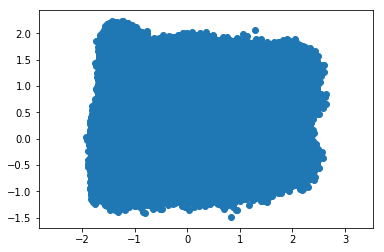

In [311]:
xs = pca_features[:,0]
ys = pca_features[:,1]
plt.scatter(xs,ys)
plt.axis('equal')
plt.show()

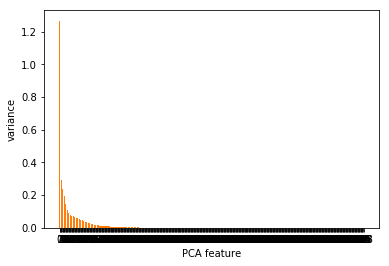

In [317]:
pcaRange = range(model.n_components_)
plt.bar(pcaRange,model.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(pcaRange)
plt.show()

<h6>Determining the number of principal components required</h6>

In [341]:
#create a covariance matrix
model = PCA(n_components = 170)

#Calculate eigenvalues
model.fit(features_train)
variance = model.explained_variance_ratio_
var = np.cumsum(np.round(model.explained_variance_ratio_, decimals = 3) * 100)
var

array([ 18.2,  24.4,  29.5,  33.7,  37.1,  40.5,  43.6,  46.5,  49.3,
        51.7,  53.8,  55.6,  57.3,  58.9,  60.4,  61.7,  63. ,  64.2,
        65.3,  66.4,  67.4,  68.4,  69.4,  70.4,  71.3,  72.2,  73.1,
        74. ,  74.9,  75.8,  76.7,  77.5,  78.3,  79.1,  79.9,  80.6,
        81.3,  82. ,  82.6,  83.2,  83.8,  84.4,  85. ,  85.5,  86. ,
        86.5,  87. ,  87.5,  88. ,  88.4,  88.8,  89.2,  89.6,  90. ,
        90.3,  90.6,  90.9,  91.2,  91.5,  91.8,  92.1,  92.4,  92.6,
        92.8,  93. ,  93.2,  93.4,  93.6,  93.8,  94. ,  94.2,  94.4,
        94.6,  94.8,  94.9,  95. ,  95.1,  95.2,  95.3,  95.4,  95.5,
        95.6,  95.7,  95.8,  95.9,  96. ,  96.1,  96.2,  96.3,  96.4,
        96.5,  96.6,  96.7,  96.8,  96.9,  97. ,  97.1,  97.2,  97.3,
        97.4,  97.5,  97.6,  97.7,  97.8,  97.9,  98. ,  98.1,  98.2,
        98.3,  98.4,  98.4,  98.4,  98.4,  98.4,  98.4,  98.4,  98.4,
        98.4,  98.4,  98.4,  98.4,  98.4,  98.4,  98.4,  98.4,  98.4,
        98.4,  98.4,

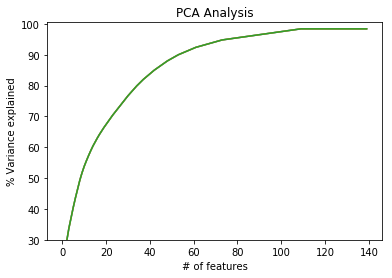

In [326]:
plt.ylabel('% Variance explained')
plt.xlabel('# of features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)
plt.show()

The plot peaks at around 110 features so we will use 110 components. Those explain almost 100% of the variance in the data.

In [335]:
pca_model_final = PCA(n_components = 110)
pca_model_final.fit(features_train)
pca_features = pca_model_final.transform(features_train)
print(pca_features.shape)

(307511, 110)


In [328]:
pca_features

array([[ -1.05974363e+00,  -1.59999200e-01,   8.09832746e-01, ...,
         -4.05578379e-02,   5.28020569e-02,  -5.93559693e-02],
       [ -1.83005736e-01,   8.07430272e-03,  -3.63506815e-01, ...,
         -2.53175794e-02,   5.06664743e-03,   4.40553834e-02],
       [ -1.53138282e+00,   3.12239381e-02,  -3.45106260e-01, ...,
         -6.90358787e-03,  -8.74275535e-02,  -1.83376876e-03],
       ..., 
       [ -1.30386117e+00,  -6.46482413e-01,  -1.37710851e+00, ...,
         -1.40238738e-03,  -7.32968868e-04,  -4.04793730e-02],
       [ -1.30204720e+00,  -2.87597889e-01,   3.14904498e-01, ...,
         -5.32192866e-03,   5.27489248e-03,   4.76620913e-02],
       [  5.89368737e-01,  -5.81750072e-01,  -6.23735309e-01, ...,
         -1.85172383e-02,  -2.55713602e-02,  -2.40634554e-02]])

In [347]:
clf3 = xgb.XGBClassifier(max_depth=6,
                           n_estimators=300,
                           max_delta_step = 1,
                           objective='binary:logistic',
                           colsample_bytree=0.7,scale_pos_weight = 11,subsample = 0.5)
clf3.fit(pca_features,labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=1,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=11, seed=None,
       silent=True, subsample=0.5)

In [343]:
clf3

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=11, seed=None,
       silent=True, subsample=1)

In [336]:
pca_features_test = pca_model_final.transform(features_test)
print(pca_features_test.shape)

(48744, 110)


In [337]:
pca_features_test

array([[ -1.56931192e+00,  -7.51240611e-01,  -1.36108401e+00, ...,
         -6.53663728e-04,   3.57686641e-02,   3.60200436e-02],
       [  2.29391006e-01,  -6.41004445e-01,   9.92632565e-02, ...,
          1.05773484e-02,  -8.55295749e-03,   1.75399267e-02],
       [  5.03079351e-01,   1.59707808e-01,  -5.38515610e-01, ...,
         -2.73265031e-02,  -2.85681569e-02,  -9.11503619e-02],
       ..., 
       [ -1.20673197e+00,  -2.03033592e-01,   1.04112294e-01, ...,
          2.82235972e-02,  -1.19200620e-02,   1.98147866e-02],
       [  1.13393784e-01,  -7.09249594e-01,  -2.61314177e-01, ...,
          1.50576359e-02,  -6.59699047e-04,   6.68849031e-03],
       [  1.19289030e+00,  -7.01668085e-01,   6.42925010e-01, ...,
         -3.29253665e-03,  -2.42106709e-03,   3.81824985e-03]])

In [348]:
test_predictions7 = np.zeros(pca_features_test.shape[0])
test_predictions7 = clf3.predict_proba(pca_features_test)[:,1]

In [349]:
test_predictions7

array([ 0.2178247 ,  0.65491498,  0.21656094, ...,  0.10437366,
        0.39945227,  0.8050369 ], dtype=float32)

In [350]:
submission5 = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions7})
submission5.head()
submission5.to_csv('xgboost_pca_4.csv', index = False)

In [351]:
pca_features.to_csv('pca_features.csv',index = False)
pca_features_test.to_csv('pca_features_test.csv', index = False)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [355]:
#xgboost_baseline_7 score 0.76
xgb_baseline_7 = pd.read_csv('xgboost_baseline_7.csv')
xgb_pca_2 = pd.read_csv('xgboost_pca_2.csv')
xgb_pca_3 = pd.read_csv('xgboost_pca_3.csv')
xgb_pca_4 = pd.read_csv('xgboost_pca_4.csv')

xgb_combined_1 = xgb_baseline_7.merge(xgb_pca_2, on ='SK_ID_CURR', how = 'inner')
xgb_combined_1 = xgb_combined_1.merge(xgb_pca_3, on = 'SK_ID_CURR', how = 'inner')
xgb_combined_1 = xgb_combined_1.merge(xgb_pca_4, on = 'SK_ID_CURR', how = 'inner')
xgb_combined_1.head()


Index(['SK_ID_CURR', 'TARGET_x', 'TARGET_y', 'TARGET_x', 'TARGET_y'], dtype='object')

In [357]:
xgb_combined_1.columns = ['SK_ID_CURR','x1','x2','x3','x4']
xgb_combined_1.head()

,SK_ID_CURR,x1,x2,x3,x4
0,100001,0.361636,0.422662,0.358812,0.217825
1,100005,0.492638,0.599464,0.585060,0.654915
2,100013,0.129253,0.199761,0.153240,0.216561
3,100028,0.353524,0.325945,0.340098,0.188455
4,100038,0.712851,0.572736,0.596469,0.634036


In [359]:
xgb_combined_1['TARGET'] = (xgb_combined_1['x1']+xgb_combined_1['x2']+xgb_combined_1['x3']+xgb_combined_1['x4'])/4
xgb_combined_1.head()

,SK_ID_CURR,x1,x2,x3,x4,TARGET
0,100001,0.361636,0.422662,0.358812,0.217825,0.340234
1,100005,0.492638,0.599464,0.585060,0.654915,0.583019
2,100013,0.129253,0.199761,0.153240,0.216561,0.174704
3,100028,0.353524,0.325945,0.340098,0.188455,0.302006
4,100038,0.712851,0.572736,0.596469,0.634036,0.629023


In [361]:
xgb_model_avg = xgb_combined_1.drop(['x1','x2','x3','x4'],axis = 1)
xgb_model_avg.head()
xgb_model_avg.to_csv('xgboost_pca_avg.csv', index = False)

<h4> Using Feature Importance from Xgboost model to do feature selection and then running a model on selected features. </h4>

In [401]:
train_labels = train_xgb_final['TARGET']
features = train_filtered
test_ids = test_xgb_final['SK_ID_CURR']
test_features = test_filtered


imputer = Imputer(strategy = "median")
scaler = MinMaxScaler(feature_range = (0,1))

imputer.fit(features)
features_train = imputer.transform(features)
features_test = imputer.transform(test_features)

scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

print(features_train.shape)
print(features_test.shape)
print(features_train)
print(features_test)

(307511, 20)
(48744, 20)
[[ 0.          0.07221502  0.30754227 ...,  0.04508619  0.          0.        ]
 [ 0.          0.31293267  0.72777309 ...,  0.04364813  0.          0.        ]
 [ 0.          0.51831772  0.65018979 ...,  0.04616148  0.          0.        ]
 ..., 
 [ 0.          0.76936959  0.62657536 ...,  0.02607561  0.          0.        ]
 [ 1.          0.51831772  0.60136022 ...,  0.03425768  0.          0.        ]
 [ 0.          0.75927943  0.82873586 ...,  0.043455    0.          0.02857143]]
[[ 0.          0.77842757  0.92357269 ...,  0.04067022  0.          0.        ]
 [ 0.          0.58053767  0.34111765 ...,  0.03508502  0.          0.        ]
 [ 0.          0.51831772  0.81846443 ...,  0.03511373  0.          0.        ]
 ..., 
 [ 0.          0.75827095  0.74008161 ...,  0.03882241  0.          0.        ]
 [ 0.          0.37813799  0.52128786 ...,  0.03962104  0.          0.        ]
 [ 0.          0.51831772  0.53396586 ...,  0.04509663  0.          0.        ]]

In [402]:
labels = np.array(train_labels)
clf4 = xgb.XGBClassifier(max_depth=6,
                           n_estimators=100,
                           objective='binary:logistic',
                           colsample_bytree=0.7,scale_pos_weight = 11)
clf4.fit(features_train,labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=11, seed=None,
       silent=True, subsample=1)

In [403]:
test_predictions8 = np.zeros(features_test.shape[0])
test_predictions8 = clf4.predict_proba(features_test)[:,1]

In [404]:
submission6 = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions8})
submission6.head()
submission6.to_csv('xgboost_importance_5.csv', index = False)

In [409]:
submission6.head(20)

,SK_ID_CURR,TARGET
0,100001,0.204892
1,100005,0.410273
2,100013,0.526361
3,100028,0.667309
4,100038,0.576042
5,100042,0.285630
6,100057,0.203402
7,100065,0.356273
8,100066,0.137157
9,100067,0.550091


<h3>Applying PCA again as PCA automatically scales the values </h3>

In [5]:
train_xgb_final = pd.read_csv('train_xgb_final.csv')
test_xgb_final = pd.read_csv('test_xgb_final.csv')

In [6]:
train_xgb_final.head()

,Unnamed: 0,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,installment_NUM_INSTALMENT_NUMBER_mean,installment_NUM_INSTALMENT_NUMBER_sum,installment_DAYS_INSTALMENT_mean,installment_DAYS_INSTALMENT_sum,installment_DAYS_ENTRY_PAYMENT_mean,installment_DAYS_ENTRY_PAYMENT_sum,installment_AMT_INSTALMENT_mean,installment_AMT_INSTALMENT_sum,installment_AMT_PAYMENT_mean,installment_AMT_PAYMENT_sum
0,0,100002,202500.0,24700.5,0.018801,-9461,-637,-3648.0,-2120,NaN,...,10.000000,190.0,-295.000000,-5605.0,-315.421053,-5993.0,11559.247105,219625.695,11559.247105,219625.695
1,1,100003,270000.0,35698.5,0.003541,-16765,-1188,-1186.0,-291,NaN,...,5.080000,127.0,-1378.160000,-34454.0,-1385.320000,-34633.0,64754.586000,1618864.650,64754.586000,1618864.650
2,2,100004,67500.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,26.0,...,2.000000,6.0,-754.000000,-2262.0,-761.666667,-2285.0,7096.155000,21288.465,7096.155000,21288.465
3,3,100006,135000.0,29686.5,0.008019,-19005,-3039,-9833.0,-2437,NaN,...,4.437500,71.0,-252.250000,-4036.0,-271.625000,-4346.0,62947.088438,1007153.415,62947.088438,1007153.415
4,4,100007,121500.0,21865.5,0.028663,-19932,-3038,-4311.0,-3458,NaN,...,7.045455,465.0,-1028.606061,-67888.0,-1032.242424,-68128.0,12666.444545,835985.340,12214.060227,806127.975


In [7]:
train_xgb_final = train_xgb_final.drop(train_xgb_final.columns[0],axis = 1)


In [8]:
test_xgb_final = test_xgb_final.drop(test_xgb_final.columns[0],axis = 1)

In [9]:
t = train_xgb_final[train_xgb_final.isnull().any(axis = 1)]

In [20]:
t.shape

(304786, 511)

In [13]:
from sklearn.preprocessing import MinMaxScaler, Imputer
train_labels = train_xgb_final['TARGET']
features = train_xgb_final.drop(['SK_ID_CURR', 'TARGET'],axis = 1)
test_ids = test_xgb_final['SK_ID_CURR']
test_features = test_xgb_final.drop(['SK_ID_CURR'],axis = 1)


imputer = Imputer(strategy = "median")
scaler = MinMaxScaler(feature_range = (0,1))

imputer.fit(features)
features_train = imputer.transform(features)
features_test = imputer.transform(test_features)

In [14]:
print(features_train.shape)
print(features_test.shape)

(307511, 510)
(48744, 510)


In [16]:
from sklearn.decomposition import PCA
#Create a covariance matrix
model = PCA(n_components = 150)
model.fit(features_train)
#Calaculate eigenvalues


AttributeError: 'PCA' object has no attribute 'explained_variance_ratio'

In [17]:
variance = model.explained_variance_ratio_
var = np.cumsum(np.round(model.explained_variance_ratio_, decimals = 3) * 100)
var

array([ 63.8,  83.7,  92.6,  95.2,  96.7,  97.7,  98.2,  98.6,  98.9,
        99.1,  99.2,  99.3,  99.4,  99.5,  99.6,  99.7,  99.7,  99.7,
        99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,
        99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,
        99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,
        99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,
        99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,
        99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,
        99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,
        99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,
        99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,
        99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,
        99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,
        99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,
        99.7,  99.7,

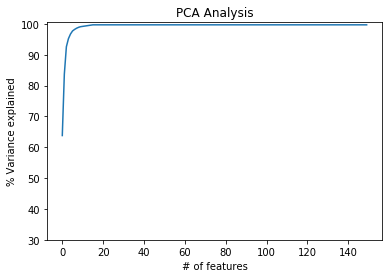

In [18]:
plt.ylabel('% Variance explained')
plt.xlabel('# of features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)
plt.show()

In [19]:
pca_model_final = PCA(n_components = 16)
pca_model_final.fit(features_train)
pca_features = pca_model_final.transform(features_train)
print(pca_features.shape)

(307511, 16)


In [22]:
pca_model_final.components_

array([[  6.24399230e-05,   2.10680916e-03,   1.31019722e-04, ...,
          9.29023413e-02,   1.23415350e-04,   9.26995170e-02],
       [  3.80812341e-05,   6.94651873e-03,   6.63819430e-04, ...,
          2.18801152e-01,   3.48540067e-03,   2.31172095e-01],
       [ -2.84031699e-05,  -1.38788549e-03,  -3.06502415e-04, ...,
         -3.63230812e-03,  -2.31889258e-04,  -7.69834221e-03],
       ..., 
       [  2.29769556e-03,   2.56915507e-03,  -2.11069281e-03, ...,
          1.78406513e-02,  -6.71838740e-03,  -1.01001194e-02],
       [  6.12976028e-04,   4.78879815e-02,  -6.74548986e-03, ...,
          9.43836639e-03,   5.23010248e-03,  -2.34167502e-02],
       [ -2.26081879e-04,   1.51870265e-03,   6.92391153e-03, ...,
         -3.57580625e-02,  -2.31841606e-03,   8.57943445e-03]])

In [24]:
labels = np.array(train_labels)
clf4 = xgb.XGBClassifier(max_depth=6,
                           n_estimators=100,
                           objective='binary:logistic',
                           colsample_bytree=0.7,scale_pos_weight = 11)
clf4.fit(pca_features,labels)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=11, seed=None,
       silent=True, subsample=1)

In [25]:
pca_features_test = pca_model_final.transform(features_test)
print(pca_features_test.shape)

(48744, 16)


In [26]:
test_predictions8 = np.zeros(pca_features_test.shape[0])
test_predictions8 = clf4.predict_proba(pca_features_test)[:,1]

In [27]:
test_predictions8

array([ 0.63674027,  0.62289941,  0.30985302, ...,  0.3482964 ,
        0.58046514,  0.64822787], dtype=float32)

In [28]:
submission6 = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions8})
submission6.head()
submission6.to_csv('xgboost_pca_16.csv', index = False)

In [36]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5)
test_predictions = np.zeros(pca_features_test.shape[0])
feature_importance_values = np.zeros(len(feature_names))
i = 0    
    # Empty array for out of fold validation predictions
out_of_fold = np.zeros(pca_features.shape[0])
for train_indices, valid_indices in skf.split(pca_features,labels):
    i = i + 1
    print('Iteration :',i)
    X_train, X_valid = pca_features[train_indices],pca_features[valid_indices]
    y_train, y_valid = labels[train_indices],labels[valid_indices]
    eval_set = [(X_valid,y_valid)]
    clf = xgb.XGBClassifier(max_depth=6,
                           n_estimators=100,
                           objective='binary:logistic',
                           colsample_bytree=0.7,scale_pos_weight = 11)
    clf.fit(X_train,y_train,early_stopping_rounds = 10, eval_metric = "auc",eval_set = eval_set,verbose = True)
    print(clf)
    #best_iteration = clf.best_iteration_
    test_predictions += clf.predict_proba(pca_features_test)[:, 1] / skf.n_splits
    print(test_predictions[1:5])

Iteration : 1
[0]	validation_0-auc:0.615564
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.627009
[2]	validation_0-auc:0.631773
[3]	validation_0-auc:0.635014
[4]	validation_0-auc:0.637602
[5]	validation_0-auc:0.637108
[6]	validation_0-auc:0.637053
[7]	validation_0-auc:0.637342
[8]	validation_0-auc:0.638288
[9]	validation_0-auc:0.639018
[10]	validation_0-auc:0.640083
[11]	validation_0-auc:0.63992
[12]	validation_0-auc:0.639914
[13]	validation_0-auc:0.640261
[14]	validation_0-auc:0.640663
[15]	validation_0-auc:0.641135
[16]	validation_0-auc:0.641052
[17]	validation_0-auc:0.641986
[18]	validation_0-auc:0.642935
[19]	validation_0-auc:0.64353
[20]	validation_0-auc:0.644133
[21]	validation_0-auc:0.644449
[22]	validation_0-auc:0.644641
[23]	validation_0-auc:0.6452
[24]	validation_0-auc:0.645406
[25]	validation_0-auc:0.645211
[26]	validation_0-auc:0.645551
[27]	validation_0-auc:0.645459
[28]	validation_0-auc:0.646001
[29]	validation_0-auc:0.646245
[30]	v

[20]	validation_0-auc:0.644542
[21]	validation_0-auc:0.644927
[22]	validation_0-auc:0.645148
[23]	validation_0-auc:0.645509
[24]	validation_0-auc:0.645809
[25]	validation_0-auc:0.646148
[26]	validation_0-auc:0.646025
[27]	validation_0-auc:0.646394
[28]	validation_0-auc:0.646686
[29]	validation_0-auc:0.646576
[30]	validation_0-auc:0.646529
[31]	validation_0-auc:0.6466
[32]	validation_0-auc:0.646928
[33]	validation_0-auc:0.647521
[34]	validation_0-auc:0.647937
[35]	validation_0-auc:0.648204
[36]	validation_0-auc:0.648588
[37]	validation_0-auc:0.648647
[38]	validation_0-auc:0.648798
[39]	validation_0-auc:0.649159
[40]	validation_0-auc:0.649366
[41]	validation_0-auc:0.64946
[42]	validation_0-auc:0.649579
[43]	validation_0-auc:0.64962
[44]	validation_0-auc:0.649613
[45]	validation_0-auc:0.649736
[46]	validation_0-auc:0.649729
[47]	validation_0-auc:0.64974
[48]	validation_0-auc:0.649752
[49]	validation_0-auc:0.649741
[50]	validation_0-auc:0.650056
[51]	validation_0-auc:0.650049
[52]	validati

In [249]:
t = train_xgb_final.dropna()

In [250]:
t.shape

(2725, 511)

<h2>Using Stratified KFold to get Feature Importance</h2> 

In [37]:
train_labels = train_xgb_final['TARGET']
features = train_xgb_final.drop(['SK_ID_CURR', 'TARGET'],axis = 1)
feature_names = list(features.columns)
test_ids = test_xgb_final['SK_ID_CURR']
test_features = test_xgb_final.drop(['SK_ID_CURR'],axis = 1)


imputer = Imputer(strategy = "median")
scaler = MinMaxScaler(feature_range = (0,1))

imputer.fit(features)
features_train = imputer.transform(features)
features_test = imputer.transform(test_features)

scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

print(features_train.shape)
print(features_test.shape)

(307511, 510)
(48744, 510)


In [38]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5)
test_predictions = np.zeros(features_test.shape[0])
feature_importance_values = np.zeros(len(feature_names))
i = 0    
    # Empty array for out of fold validation predictions
out_of_fold = np.zeros(features_train.shape[0])
for train_indices, valid_indices in skf.split(features_train,labels):
    i = i + 1
    print('Iteration :',i)
    X_train, X_valid = features_train[train_indices],features_train[valid_indices]
    y_train, y_valid = train_labels[train_indices],train_labels[valid_indices]
    eval_set = [(X_valid,y_valid)]
    clf = xgb.XGBClassifier(max_depth=6,
                           n_estimators=100,
                           objective='binary:logistic',
                           colsample_bytree=0.7,scale_pos_weight = 11)
    clf.fit(X_train,y_train,early_stopping_rounds = 10, eval_metric = "auc",eval_set = eval_set,verbose = True)
    print(clf)
    #best_iteration = clf.best_iteration_
    test_predictions += clf.predict_proba(features_test)[:, 1] / skf.n_splits
    feature_importance_values += clf.feature_importances_ / skf.n_splits
    
    print(test_predictions[1:5])

feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

Iteration : 1
[0]	validation_0-auc:0.686034
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.695389
[2]	validation_0-auc:0.708267
[3]	validation_0-auc:0.724606
[4]	validation_0-auc:0.730789
[5]	validation_0-auc:0.73333
[6]	validation_0-auc:0.734339
[7]	validation_0-auc:0.736429
[8]	validation_0-auc:0.738649
[9]	validation_0-auc:0.740728
[10]	validation_0-auc:0.741962
[11]	validation_0-auc:0.742769
[12]	validation_0-auc:0.743666
[13]	validation_0-auc:0.745716
[14]	validation_0-auc:0.746175
[15]	validation_0-auc:0.746705
[16]	validation_0-auc:0.74672
[17]	validation_0-auc:0.747296
[18]	validation_0-auc:0.747479
[19]	validation_0-auc:0.748064
[20]	validation_0-auc:0.748902
[21]	validation_0-auc:0.749042
[22]	validation_0-auc:0.74995
[23]	validation_0-auc:0.75018
[24]	validation_0-auc:0.750769
[25]	validation_0-auc:0.751345
[26]	validation_0-auc:0.751755
[27]	validation_0-auc:0.752147
[28]	validation_0-auc:0.752689
[29]	validation_0-auc:0.753114
[30]	v

[37]	validation_0-auc:0.752313
[38]	validation_0-auc:0.752803
[39]	validation_0-auc:0.752931
[40]	validation_0-auc:0.753219
[41]	validation_0-auc:0.753567
[42]	validation_0-auc:0.754077
[43]	validation_0-auc:0.754281
[44]	validation_0-auc:0.75458
[45]	validation_0-auc:0.754825
[46]	validation_0-auc:0.754961
[47]	validation_0-auc:0.755047
[48]	validation_0-auc:0.75536
[49]	validation_0-auc:0.755584
[50]	validation_0-auc:0.755746
[51]	validation_0-auc:0.756021
[52]	validation_0-auc:0.756258
[53]	validation_0-auc:0.756381
[54]	validation_0-auc:0.756647
[55]	validation_0-auc:0.756781
[56]	validation_0-auc:0.756907
[57]	validation_0-auc:0.757005
[58]	validation_0-auc:0.757231
[59]	validation_0-auc:0.757687
[60]	validation_0-auc:0.757757
[61]	validation_0-auc:0.757882
[62]	validation_0-auc:0.758087
[63]	validation_0-auc:0.758257
[64]	validation_0-auc:0.758374
[65]	validation_0-auc:0.758528
[66]	validation_0-auc:0.758693
[67]	validation_0-auc:0.758693
[68]	validation_0-auc:0.758792
[69]	valid

[70]	validation_0-auc:0.760667
[71]	validation_0-auc:0.760667
[72]	validation_0-auc:0.760666
[73]	validation_0-auc:0.76072
[74]	validation_0-auc:0.76079
[75]	validation_0-auc:0.760883
[76]	validation_0-auc:0.760893
[77]	validation_0-auc:0.761047
[78]	validation_0-auc:0.761223
[79]	validation_0-auc:0.761223
[80]	validation_0-auc:0.761273
[81]	validation_0-auc:0.761302
[82]	validation_0-auc:0.761323
[83]	validation_0-auc:0.761323
[84]	validation_0-auc:0.761439
[85]	validation_0-auc:0.761481
[86]	validation_0-auc:0.761537
[87]	validation_0-auc:0.761466
[88]	validation_0-auc:0.761571
[89]	validation_0-auc:0.761571
[90]	validation_0-auc:0.761589
[91]	validation_0-auc:0.761607
[92]	validation_0-auc:0.761599
[93]	validation_0-auc:0.761599
[94]	validation_0-auc:0.761761
[95]	validation_0-auc:0.761876
[96]	validation_0-auc:0.762084
[97]	validation_0-auc:0.762427
[98]	validation_0-auc:0.762427
[99]	validation_0-auc:0.762549
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
   

In [39]:
feature_importances.head()

,feature,importance
0,Unnamed: 0,0.011073
1,AMT_INCOME_TOTAL,0.008316
2,AMT_ANNUITY,0.025639
3,REGION_POPULATION_RELATIVE,0.010124
4,DAYS_BIRTH,0.028041


In [ ]:
df = feature_importances.sort_values('importance', ascending = False).reset_index()
df.head(70)

In [43]:
submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})

In [46]:
submission.to_csv('xgboost_kfoldValidation5.csv', index = False)

In [45]:
test_predictions

array([ 0.32786235,  0.43545669,  0.09833032, ...,  0.09833394,
        0.44573477,  0.64489713])

In [47]:
train_xgb_final.columns.values

array(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_

In [33]:
#Subsetting dataframe to important parameters
train_importance = train_xgb_final.loc[:,['SK_ID_CURR','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','AMT_ANNUITY','DAYS_EMPLOYED',
                                         'cashBalance_CNT_INSTALMENT_FUTURE_mean','bureau_AMT_CREDIT_SUM_DEBT_mean','DAYS_LAST_PHONE_CHANGE','bureau_DAYS_ENDDATE_FACT_max','DAYS_REGISTRATION',
                                         'installment_AMT_PAYMENT_mean','previousApp_AMT_DOWN_PAYMENT_sum','installment_AMT_PAYMENT_sum',
                                          'REGION_POPULATION_RELATIVE','bureau_DAYS_CREDIT_ENDDATE_mean',
                                          'cashBalance_SK_DPD_DEF_mean','previousApp_AMT_ANNUITY_mean','previousApp_PREV_CREDIT_TERM_mean',
                                          'bureau_AMT_CREDIT_SUM_min',
                                          'AMT_INCOME_TOTAL','creditBalance_CNT_DRAWINGS_ATM_CURRENT_mean','bureau_AMT_CREDIT_SUM_LIMIT_mean',
                                          'bureau_DAYS_CREDIT_UPDATE_mean','OWN_CAR_AGE','creditBalance_CNT_DRAWINGS_CURRENT_mean',
                                          'bureau_DAYS_CREDIT_ENDDATE_min','bureau_DAYS_CREDIT_UPDATE_max','previousApp_SELLERPLACE_AREA_mean',
                                          'previousApp_NAME_CONTRACT_STATUS_Refused_mean', 'previousApp_DAYS_DECISION_mean',
                                          'installment_AMT_INSTALMENT_mean','previousApp_NAME_YIELD_GROUP_low_action_mean','cashBalance_MONTHS_BALANCE_sum','installment_NUM_INSTALMENT_NUMBER_mean',
                                          'previousApp_AMT_DOWN_PAYMENT_mean',
                                          'previousApp_RATE_DOWN_PAYMENT_mean','previousApp_PREV_CREDIT_TERM_sum','TARGET']]


test_importance = test_xgb_final.loc[:,['SK_ID_CURR','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','AMT_ANNUITY','DAYS_EMPLOYED',
                                         'cashBalance_CNT_INSTALMENT_FUTURE_mean','bureau_AMT_CREDIT_SUM_DEBT_mean','DAYS_LAST_PHONE_CHANGE','bureau_DAYS_ENDDATE_FACT_max','DAYS_REGISTRATION',
                                         'installment_AMT_PAYMENT_mean','previousApp_AMT_DOWN_PAYMENT_sum','installment_AMT_PAYMENT_sum',
                                          'REGION_POPULATION_RELATIVE','bureau_DAYS_CREDIT_ENDDATE_mean',
                                          'cashBalance_SK_DPD_DEF_mean','previousApp_AMT_ANNUITY_mean','previousApp_PREV_CREDIT_TERM_mean',
                                          'bureau_AMT_CREDIT_SUM_min',
                                          'AMT_INCOME_TOTAL','creditBalance_CNT_DRAWINGS_ATM_CURRENT_mean','bureau_AMT_CREDIT_SUM_LIMIT_mean',
                                          'bureau_DAYS_CREDIT_UPDATE_mean','OWN_CAR_AGE','creditBalance_CNT_DRAWINGS_CURRENT_mean',
                                          'bureau_DAYS_CREDIT_ENDDATE_min','bureau_DAYS_CREDIT_UPDATE_max','previousApp_SELLERPLACE_AREA_mean',
                                          'previousApp_NAME_CONTRACT_STATUS_Refused_mean', 'previousApp_DAYS_DECISION_mean',
                                          'installment_AMT_INSTALMENT_mean','previousApp_NAME_YIELD_GROUP_low_action_mean','cashBalance_MONTHS_BALANCE_sum','installment_NUM_INSTALMENT_NUMBER_mean',
                                          'previousApp_AMT_DOWN_PAYMENT_mean',
                                          'previousApp_RATE_DOWN_PAYMENT_mean','previousApp_PREV_CREDIT_TERM_sum']]




In [52]:
train_imp['AMT_ANNUITY per Income'] = train_imp['AMT_ANNUITY']/train_imp['AMT_INCOME_TOTAL']
train_imp['Credit_SUM_Debt per Income'] = bureau['AMT_CREDIT_SUM_DEBT']/train_imp['AMT_INCOME_TOTAL']
#AMT_CREDIT_SUM_OVERDUE
train_imp['AMT_CREDIT_SUM_OVERDUE per Income']= bureau['AMT_CREDIT_SUM_OVERDUE']/train_imp['AMT_INCOME_TOTAL']
#previousApp_AMT_GOODS_PRICE_sum
train_imp['AMT_GOODS_PRICE per Income']= train_xgb_final['previousApp_AMT_GOODS_PRICE_sum']/train_imp['AMT_INCOME_TOTAL']


test_imp['AMT_ANNUITY per Income'] = test_imp['AMT_ANNUITY']/test_imp['AMT_INCOME_TOTAL']
test_imp['Credit_SUM_Debt per Income'] = bureau['AMT_CREDIT_SUM_DEBT']/test_imp['AMT_INCOME_TOTAL']
#AMT_CREDIT_SUM_OVERDUE
test_imp['AMT_CREDIT_SUM_OVERDUE per Income']= bureau['AMT_CREDIT_SUM_OVERDUE']/test_imp['AMT_INCOME_TOTAL']
#previousApp_AMT_GOODS_PRICE_sum
test_imp['AMT_GOODS_PRICE per Income']= test_xgb_final['previousApp_AMT_GOODS_PRICE_sum']/test_imp['AMT_INCOME_TOTAL']


In [ ]:
train_imp['DAYS_EMPLOYED']

In [70]:
feature_names = list(train_imp.drop(['TARGET','SK_ID_CURR'],axis = 1).columns)
train_labels = np.array(train_imp['TARGET'])
features_train = train_imp.drop(['TARGET','SK_ID_CURR'],axis = 1)
features_test = test_imp.drop(['SK_ID_CURR'],axis = 1)
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "mean")
imputer.fit(features_train)
features_train = imputer.transform(features_train)
features_test = imputer.transform(features_test)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# I did a cross validation without scaling and got a 0.76 score using polynomial expansion without scaling the variables
#Now i am trying to use scaling. Its almost the same. Scaling did nothing

scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

print(features_train.shape)
print(features_test.shape)

(307511, 43)
(48744, 43)


In [71]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5)
test_predictions = np.zeros(features_test.shape[0])
feature_importance_values = np.zeros(len(feature_names))
i = 0    
    # Empty array for out of fold validation predictions
out_of_fold = np.zeros(features_train.shape[0])
for train_indices, valid_indices in skf.split(features_train,train_labels):
    i = i + 1
    print('Iteration :',i)
    X_train, X_valid = features_train[train_indices],features_train[valid_indices]
    y_train, y_valid = train_labels[train_indices],train_labels[valid_indices]
    eval_set = [(X_train,y_train),(X_valid,y_valid)]
    sum_wpos = y_train.sum()
    sum_wneg = len(y_train) - sum_wpos
    print('Number of y labels with 1',sum_wpos)
    print('Number of y labels with 0 ',sum_wneg)
    clf = xgb.XGBClassifier(max_depth=6,learning_rate = 0.1,
                           n_estimators=1000,
                           objective='binary:logistic',
                           colsample_bytree=0.7,scale_pos_weight = sum_wneg/sum_wpos)
    clf.fit(X_train,y_train,early_stopping_rounds = 10, eval_metric = "auc",eval_set = eval_set,verbose = True)
    print(clf)
    #best_iteration = clf.best_iteration_
    test_predictions += clf.predict_proba(features_test)[:, 1] / skf.n_splits
    feature_importance_values += clf.feature_importances_ / skf.n_splits
    print(test_predictions[0:5])

Iteration : 1
Number of y labels with 1 19860
Number of y labels with 0  226148
[0]	validation_0-auc:0.668256	validation_1-auc:0.650446
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.714572	validation_1-auc:0.697664
[2]	validation_0-auc:0.72411	validation_1-auc:0.7092
[3]	validation_0-auc:0.725624	validation_1-auc:0.709889
[4]	validation_0-auc:0.743761	validation_1-auc:0.726831
[5]	validation_0-auc:0.751653	validation_1-auc:0.733907
[6]	validation_0-auc:0.757685	validation_1-auc:0.739282
[7]	validation_0-auc:0.759905	validation_1-auc:0.740427
[8]	validation_0-auc:0.7616	validation_1-auc:0.741798
[9]	validation_0-auc:0.763942	validation_1-auc:0.743717
[10]	validation_0-auc:0.764346	validation_1-auc:0.744188
[11]	validation_0-auc:0.765081	validation_1-auc:0.744716
[12]	validation_0-auc:0.766106	validation_1-auc:0.744966
[13]	validation_0-auc:0.766682	valida

[26]	validation_0-auc:0.778612	validation_1-auc:0.751636
[27]	validation_0-auc:0.779661	validation_1-auc:0.752201
[28]	validation_0-auc:0.780962	validation_1-auc:0.752498
[29]	validation_0-auc:0.781836	validation_1-auc:0.752812
[30]	validation_0-auc:0.782578	validation_1-auc:0.753025
[31]	validation_0-auc:0.783368	validation_1-auc:0.753415
[32]	validation_0-auc:0.784272	validation_1-auc:0.753768
[33]	validation_0-auc:0.78534	validation_1-auc:0.754459
[34]	validation_0-auc:0.78604	validation_1-auc:0.754679
[35]	validation_0-auc:0.786973	validation_1-auc:0.755205
[36]	validation_0-auc:0.787779	validation_1-auc:0.7553
[37]	validation_0-auc:0.788768	validation_1-auc:0.755926
[38]	validation_0-auc:0.789436	validation_1-auc:0.756091
[39]	validation_0-auc:0.79016	validation_1-auc:0.75608
[40]	validation_0-auc:0.790638	validation_1-auc:0.756392
[41]	validation_0-auc:0.791531	validation_1-auc:0.756661
[42]	validation_0-auc:0.792055	validation_1-auc:0.756812
[43]	validation_0-auc:0.792653	valida

[30]	validation_0-auc:0.784576	validation_1-auc:0.747742
[31]	validation_0-auc:0.78519	validation_1-auc:0.747866
[32]	validation_0-auc:0.786273	validation_1-auc:0.748741
[33]	validation_0-auc:0.786991	validation_1-auc:0.749017
[34]	validation_0-auc:0.787863	validation_1-auc:0.749426
[35]	validation_0-auc:0.788946	validation_1-auc:0.749921
[36]	validation_0-auc:0.789574	validation_1-auc:0.75014
[37]	validation_0-auc:0.790401	validation_1-auc:0.75051
[38]	validation_0-auc:0.791051	validation_1-auc:0.750912
[39]	validation_0-auc:0.79151	validation_1-auc:0.751034
[40]	validation_0-auc:0.792362	validation_1-auc:0.751291
[41]	validation_0-auc:0.79317	validation_1-auc:0.751652
[42]	validation_0-auc:0.793927	validation_1-auc:0.751794
[43]	validation_0-auc:0.794612	validation_1-auc:0.752138
[44]	validation_0-auc:0.795276	validation_1-auc:0.752235
[45]	validation_0-auc:0.795617	validation_1-auc:0.752329
[46]	validation_0-auc:0.79632	validation_1-auc:0.752484
[47]	validation_0-auc:0.796958	valida

[55]	validation_0-auc:0.802227	validation_1-auc:0.75791
[56]	validation_0-auc:0.802885	validation_1-auc:0.75804
[57]	validation_0-auc:0.803346	validation_1-auc:0.758081
[58]	validation_0-auc:0.803609	validation_1-auc:0.758182
[59]	validation_0-auc:0.804345	validation_1-auc:0.758398
[60]	validation_0-auc:0.804993	validation_1-auc:0.758349
[61]	validation_0-auc:0.805377	validation_1-auc:0.758432
[62]	validation_0-auc:0.806009	validation_1-auc:0.758565
[63]	validation_0-auc:0.806607	validation_1-auc:0.758529
[64]	validation_0-auc:0.807046	validation_1-auc:0.758653
[65]	validation_0-auc:0.80732	validation_1-auc:0.758838
[66]	validation_0-auc:0.807987	validation_1-auc:0.758931
[67]	validation_0-auc:0.808384	validation_1-auc:0.759057
[68]	validation_0-auc:0.808908	validation_1-auc:0.759083
[69]	validation_0-auc:0.809238	validation_1-auc:0.759106
[70]	validation_0-auc:0.809819	validation_1-auc:0.759102
[71]	validation_0-auc:0.810552	validation_1-auc:0.759362
[72]	validation_0-auc:0.811004	val

[90]	validation_0-auc:0.815831	validation_1-auc:0.764461
[91]	validation_0-auc:0.816081	validation_1-auc:0.764417
[92]	validation_0-auc:0.81659	validation_1-auc:0.764449
[93]	validation_0-auc:0.8171	validation_1-auc:0.764374
[94]	validation_0-auc:0.817298	validation_1-auc:0.764381
[95]	validation_0-auc:0.817681	validation_1-auc:0.764363
[96]	validation_0-auc:0.817972	validation_1-auc:0.764516
[97]	validation_0-auc:0.81852	validation_1-auc:0.764395
[98]	validation_0-auc:0.819147	validation_1-auc:0.764354
[99]	validation_0-auc:0.819586	validation_1-auc:0.764417
[100]	validation_0-auc:0.820027	validation_1-auc:0.764513
[101]	validation_0-auc:0.820122	validation_1-auc:0.76451
[102]	validation_0-auc:0.82028	validation_1-auc:0.76454
[103]	validation_0-auc:0.820549	validation_1-auc:0.764593
[104]	validation_0-auc:0.820911	validation_1-auc:0.764638
[105]	validation_0-auc:0.82113	validation_1-auc:0.764534
[106]	validation_0-auc:0.821319	validation_1-auc:0.764471
[107]	validation_0-auc:0.821473	

In [72]:
test_ids = test_imp['SK_ID_CURR']
submission_imp = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
submission_imp.to_csv('xgboost_feature_removal3.csv', index = False)

In [73]:
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

In [74]:
feature_importances.head(50)

,feature,importance
0,EXT_SOURCE_1,0.054519
1,EXT_SOURCE_2,0.047411
2,EXT_SOURCE_3,0.045953
3,DAYS_BIRTH,0.047405
4,AMT_ANNUITY,0.043983
5,DAYS_EMPLOYED,0.040242
6,cashBalance_CNT_INSTALMENT_FUTURE_mean,0.034229
7,bureau_AMT_CREDIT_SUM_DEBT_mean,0.027109
8,DAYS_LAST_PHONE_CHANGE,0.024708
9,bureau_DAYS_ENDDATE_FACT_max,0.022971


In [77]:

finalModel = xgb.XGBClassifier(max_depth=6,learning_rate = 0.1,
                           n_estimators=1000,
                           objective='binary:logistic',
                           colsample_bytree=0.7,scale_pos_weight = 11)
finalModel.fit(features_train,train_labels,eval_metric = "auc",eval_set = [(features_train,train_labels)],verbose = True)
#best_iteration = clf.best_iteration_
test_predictionsFinal = finalModel.predict_proba(features_test)[:, 1]

[0]	validation_0-auc:0.665564
[1]	validation_0-auc:0.710299
[2]	validation_0-auc:0.721417
[3]	validation_0-auc:0.722443
[4]	validation_0-auc:0.74063
[5]	validation_0-auc:0.747863
[6]	validation_0-auc:0.754075
[7]	validation_0-auc:0.756735
[8]	validation_0-auc:0.758633
[9]	validation_0-auc:0.760913
[10]	validation_0-auc:0.761338
[11]	validation_0-auc:0.762076
[12]	validation_0-auc:0.762623
[13]	validation_0-auc:0.76316
[14]	validation_0-auc:0.765037
[15]	validation_0-auc:0.766191
[16]	validation_0-auc:0.766922
[17]	validation_0-auc:0.767925
[18]	validation_0-auc:0.768707
[19]	validation_0-auc:0.76973
[20]	validation_0-auc:0.770532
[21]	validation_0-auc:0.771432
[22]	validation_0-auc:0.772102
[23]	validation_0-auc:0.772815
[24]	validation_0-auc:0.773427
[25]	validation_0-auc:0.774324
[26]	validation_0-auc:0.775359
[27]	validation_0-auc:0.776204
[28]	validation_0-auc:0.777211
[29]	validation_0-auc:0.777905
[30]	validation_0-auc:0.778861
[31]	validation_0-auc:0.779514
[32]	validation_0-auc

[261]	validation_0-auc:0.851062
[262]	validation_0-auc:0.851075
[263]	validation_0-auc:0.851209
[264]	validation_0-auc:0.851323
[265]	validation_0-auc:0.851428
[266]	validation_0-auc:0.851487
[267]	validation_0-auc:0.851691
[268]	validation_0-auc:0.851778
[269]	validation_0-auc:0.852011
[270]	validation_0-auc:0.852255
[271]	validation_0-auc:0.852317
[272]	validation_0-auc:0.852524
[273]	validation_0-auc:0.852812
[274]	validation_0-auc:0.853098
[275]	validation_0-auc:0.853362
[276]	validation_0-auc:0.85378
[277]	validation_0-auc:0.853967
[278]	validation_0-auc:0.854223
[279]	validation_0-auc:0.854478
[280]	validation_0-auc:0.854509
[281]	validation_0-auc:0.854764
[282]	validation_0-auc:0.854877
[283]	validation_0-auc:0.854965
[284]	validation_0-auc:0.855221
[285]	validation_0-auc:0.855476
[286]	validation_0-auc:0.855887
[287]	validation_0-auc:0.856279
[288]	validation_0-auc:0.856535
[289]	validation_0-auc:0.856734
[290]	validation_0-auc:0.857074
[291]	validation_0-auc:0.857292
[292]	val

[518]	validation_0-auc:0.893918
[519]	validation_0-auc:0.894132
[520]	validation_0-auc:0.894425
[521]	validation_0-auc:0.894439
[522]	validation_0-auc:0.894591
[523]	validation_0-auc:0.894812
[524]	validation_0-auc:0.894943
[525]	validation_0-auc:0.894969
[526]	validation_0-auc:0.895172
[527]	validation_0-auc:0.895211
[528]	validation_0-auc:0.895349
[529]	validation_0-auc:0.895554
[530]	validation_0-auc:0.895609
[531]	validation_0-auc:0.895768
[532]	validation_0-auc:0.895934
[533]	validation_0-auc:0.896048
[534]	validation_0-auc:0.896089
[535]	validation_0-auc:0.896199
[536]	validation_0-auc:0.896308
[537]	validation_0-auc:0.896348
[538]	validation_0-auc:0.896379
[539]	validation_0-auc:0.896406
[540]	validation_0-auc:0.896437
[541]	validation_0-auc:0.896474
[542]	validation_0-auc:0.896519
[543]	validation_0-auc:0.896524
[544]	validation_0-auc:0.896667
[545]	validation_0-auc:0.896749
[546]	validation_0-auc:0.896827
[547]	validation_0-auc:0.896999
[548]	validation_0-auc:0.897058
[549]	va

[776]	validation_0-auc:0.920699
[777]	validation_0-auc:0.920823
[778]	validation_0-auc:0.920965
[779]	validation_0-auc:0.921048
[780]	validation_0-auc:0.921132
[781]	validation_0-auc:0.921352
[782]	validation_0-auc:0.921411
[783]	validation_0-auc:0.921434
[784]	validation_0-auc:0.921437
[785]	validation_0-auc:0.921466
[786]	validation_0-auc:0.921579
[787]	validation_0-auc:0.921729
[788]	validation_0-auc:0.921829
[789]	validation_0-auc:0.921855
[790]	validation_0-auc:0.921965
[791]	validation_0-auc:0.922126
[792]	validation_0-auc:0.922295
[793]	validation_0-auc:0.922404
[794]	validation_0-auc:0.922446
[795]	validation_0-auc:0.922541
[796]	validation_0-auc:0.922671
[797]	validation_0-auc:0.922804
[798]	validation_0-auc:0.92296
[799]	validation_0-auc:0.923019
[800]	validation_0-auc:0.923046
[801]	validation_0-auc:0.923052
[802]	validation_0-auc:0.923054
[803]	validation_0-auc:0.923076
[804]	validation_0-auc:0.923081
[805]	validation_0-auc:0.923278
[806]	validation_0-auc:0.923392
[807]	val

In [78]:
test_ids = test_imp['SK_ID_CURR']
submission_imp = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictionsFinal})
submission_imp.to_csv('xgboost_feature_removal_4.csv', index = False)

In [79]:
finalModel.feature_importances_

array([ 0.03137926,  0.042362  ,  0.0345885 ,  0.04015119,  0.03423192,
        0.02942994,  0.02738554,  0.02507964,  0.02752817,  0.02379594,
        0.03073741,  0.0293824 ,  0.01666429,  0.02871678,  0.0228926 ,
        0.02778966,  0.02396234,  0.0106737 ,  0.02553131,  0.02859792,
        0.02277374,  0.01730614,  0.01019826,  0.01164836,  0.02567394,
        0.01183854,  0.01207626,  0.02436647,  0.01977844,  0.0275044 ,
        0.01019826,  0.02795607,  0.0243427 ,  0.00582418,  0.02584035,
        0.02491323,  0.01483383,  0.0182808 ,  0.02574526,  0.03159321,
        0.01423953,  0.00161651,  0.03057101], dtype=float32)

In [36]:
corr = train_importance.corr()

In [25]:
corr[(corr > 0.5) & (corr < 1)]

,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,AMT_ANNUITY,DAYS_EMPLOYED,cashBalance_CNT_INSTALMENT_FUTURE_mean,bureau_AMT_CREDIT_SUM_DEBT_mean,previousApp_CNT_PAYMENT_mean,...,bureau_DAYS_CREDIT_UPDATE_min,installment_AMT_INSTALMENT_sum,cashBalance_MONTHS_BALANCE_mean,installment_NUM_INSTALMENT_NUMBER_mean,previousApp_RATE_DOWN_PAYMENT_sum,previousApp_AMT_DOWN_PAYMENT_mean,cashBalance_CNT_INSTALMENT_mean,previousApp_RATE_DOWN_PAYMENT_mean,previousApp_PREV_CREDIT_TERM_sum,TARGET
SK_ID_CURR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EXT_SOURCE_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EXT_SOURCE_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EXT_SOURCE_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_ANNUITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cashBalance_CNT_INSTALMENT_FUTURE_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.715946,...,NaN,NaN,NaN,NaN,NaN,NaN,0.954813,NaN,NaN,NaN
bureau_AMT_CREDIT_SUM_DEBT_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previousApp_CNT_PAYMENT_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.715946,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.727587,NaN,NaN,NaN


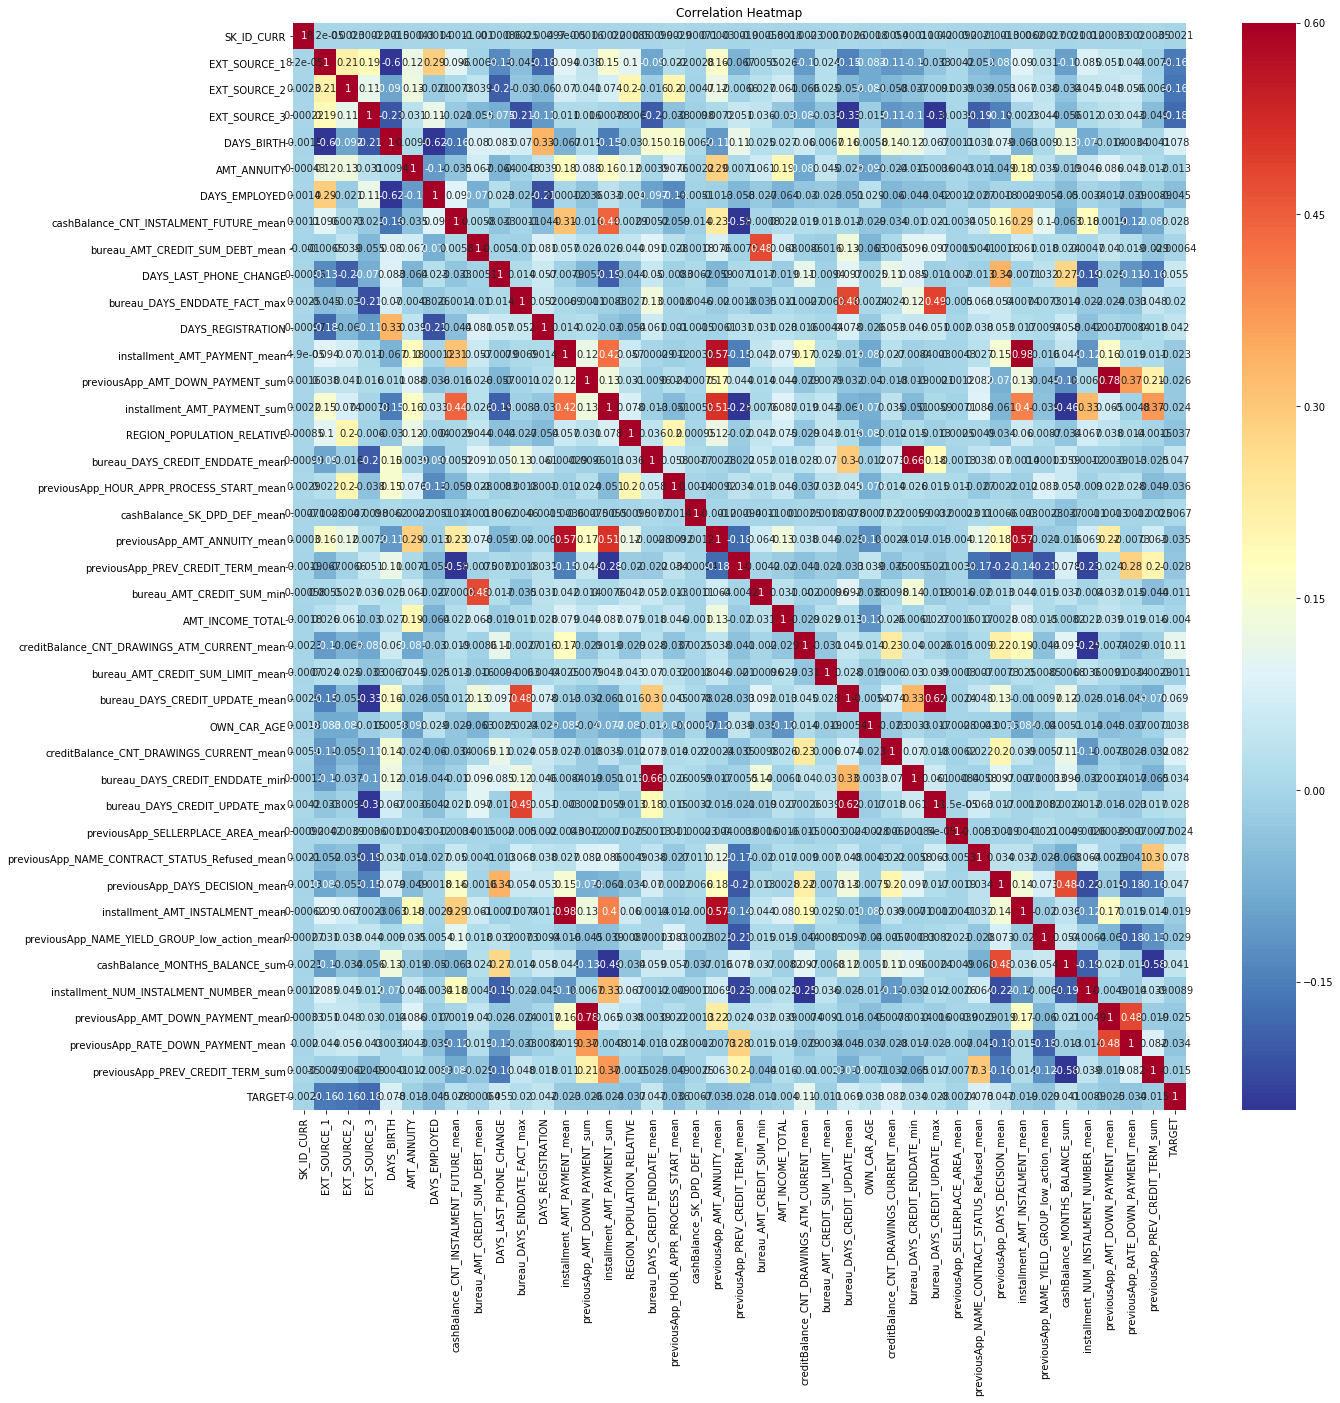

In [37]:
plt.figure(figsize = (20,20))
sns.heatmap(corr,cmap = plt.cm.RdYlBu_r,vmin=-0.25,annot=True,vmax = 0.6)
plt.title("Correlation Heatmap")
plt.show()

In [58]:
test_importance.columns

Index(['SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_BIRTH', 'AMT_ANNUITY', 'DAYS_EMPLOYED',
       'cashBalance_CNT_INSTALMENT_FUTURE_mean', 'DAYS_ID_PUBLISH',
       'bureau_AMT_CREDIT_SUM_DEBT_mean', 'previousApp_CNT_PAYMENT_mean',
       'DAYS_LAST_PHONE_CHANGE', 'bureau_DAYS_ENDDATE_FACT_max',
       'DAYS_REGISTRATION', 'installment_AMT_PAYMENT_mean',
       'previousApp_AMT_DOWN_PAYMENT_sum', 'installment_AMT_PAYMENT_sum',
       'REGION_POPULATION_RELATIVE', 'bureau_DAYS_CREDIT_ENDDATE_mean',
       'previousApp_HOUR_APPR_PROCESS_START_mean',
       'cashBalance_SK_DPD_DEF_mean', 'previousApp_AMT_ANNUITY_mean',
       'previousApp_PREV_CREDIT_TERM_mean', 'bureau_AMT_CREDIT_SUM_min',
       'installment_NUM_INSTALMENT_VERSION_mean',
       'previousApp_DAYS_LAST_DUE_1ST_VERSION_sum', 'AMT_INCOME_TOTAL',
       'creditBalance_CNT_DRAWINGS_ATM_CURRENT_mean',
       'bureau_AMT_CREDIT_SUM_LIMIT_mean', 'bureau_DAYS_CREDIT_UPDATE_mean',
       'OWN_CAR_AG

In [38]:
#Take out the SK ID CURR and Target Column
train_imp = train_importance
test_imp = test_importance

In [39]:
print(train_imp.shape)
print(test_imp.shape)

(307511, 41)
(48744, 40)


In [27]:
#There are no rows with all columns missing
idx = train_imp.index[train_imp.isnull().all(1)]
nans = train_imp.iloc[idx]
nans

,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,AMT_ANNUITY,DAYS_EMPLOYED,cashBalance_CNT_INSTALMENT_FUTURE_mean,DAYS_ID_PUBLISH,bureau_AMT_CREDIT_SUM_DEBT_mean,...,bureau_DAYS_CREDIT_UPDATE_min,installment_AMT_INSTALMENT_sum,cashBalance_MONTHS_BALANCE_mean,installment_NUM_INSTALMENT_NUMBER_mean,previousApp_RATE_DOWN_PAYMENT_sum,previousApp_AMT_DOWN_PAYMENT_mean,cashBalance_CNT_INSTALMENT_mean,previousApp_RATE_DOWN_PAYMENT_mean,previousApp_PREV_CREDIT_TERM_sum,TARGET


In [61]:
app_train = pd.read_csv('application_train.csv')
app_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
      

In [62]:
app_test = pd.read_csv('application_test.csv')

In [63]:
#'NAME_INCOME_TYPE','NAME_HOUSING_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','AMT_INCOME_TOTAL','APARTMENTS_AVG'
train_imp['APARTMENTS_AVG'] = app_train['APARTMENTS_AVG']
test_imp['APARTMENTS_AVG'] = app_test['APARTMENTS_AVG']

train_imp['CNT_FAM_MEMBERS'] = app_train['CNT_FAM_MEMBERS']
test_imp['CNT_FAM_MEMBERS'] = app_test['CNT_FAM_MEMBERS']

In [65]:
app_train['REGION_RATING_CLIENT'].isnull().sum()

0

In [77]:
t = app_train.loc[:,['REGION_RATING_CLIENT']]
t2 = app_test.loc[:,['REGION_RATING_CLIENT']]
#t.head()
t.REGION_RATING_CLIENT = t.REGION_RATING_CLIENT.astype(str)
t2.REGION_RATING_CLIENT = t2.REGION_RATING_CLIENT.astype(str)

In [78]:
t.dtypes.values

array([dtype('O')], dtype=object)

In [79]:
d = pd.get_dummies(t)
d2 = pd.get_dummies(t2)

In [80]:
d2.head()

,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [81]:
t = app_train.loc[:,['NAME_HOUSING_TYPE']]
t2 = app_test.loc[:,['NAME_HOUSING_TYPE']]
house = pd.get_dummies(t)
house2 = pd.get_dummies(t2)
house2.head()

,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [82]:
train_imp['REGION_RATING_CLIENT_1'] = d['REGION_RATING_CLIENT_1']
train_imp['REGION_RATING_CLIENT_2'] = d['REGION_RATING_CLIENT_2']
train_imp['REGION_RATING_CLIENT_3'] = d['REGION_RATING_CLIENT_3']

test_imp['REGION_RATING_CLIENT_1'] = d2['REGION_RATING_CLIENT_1']
test_imp['REGION_RATING_CLIENT_2'] = d2['REGION_RATING_CLIENT_2']
test_imp['REGION_RATING_CLIENT_3'] = d2['REGION_RATING_CLIENT_3']


train_imp['NAME_HOUSING_TYPE_Co-op apartment'] = house['NAME_HOUSING_TYPE_Co-op apartment']
train_imp['NAME_HOUSING_TYPE_House / apartment'] = house['NAME_HOUSING_TYPE_House / apartment']
train_imp['NAME_HOUSING_TYPE_Municipal apartment'] = house['NAME_HOUSING_TYPE_Municipal apartment']
train_imp['NAME_HOUSING_TYPE_Office apartment'] = house['NAME_HOUSING_TYPE_Office apartment']
train_imp['NAME_HOUSING_TYPE_Rented apartment'] = house['NAME_HOUSING_TYPE_Rented apartment']
train_imp['NAME_HOUSING_TYPE_With parents'] = house['NAME_HOUSING_TYPE_With parents']


test_imp['NAME_HOUSING_TYPE_Co-op apartment'] = house2['NAME_HOUSING_TYPE_Co-op apartment']
test_imp['NAME_HOUSING_TYPE_House / apartment'] = house2['NAME_HOUSING_TYPE_House / apartment']
test_imp['NAME_HOUSING_TYPE_Municipal apartment'] = house2['NAME_HOUSING_TYPE_Municipal apartment']
test_imp['NAME_HOUSING_TYPE_Office apartment'] = house2['NAME_HOUSING_TYPE_Office apartment']
test_imp['NAME_HOUSING_TYPE_Rented apartment'] = house2['NAME_HOUSING_TYPE_Rented apartment']
test_imp['NAME_HOUSING_TYPE_With parents'] = house2['NAME_HOUSING_TYPE_With parents']





In [32]:
train_imp['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [68]:
train_imp.head()

,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,AMT_ANNUITY,DAYS_EMPLOYED,cashBalance_CNT_INSTALMENT_FUTURE_mean,DAYS_ID_PUBLISH,bureau_AMT_CREDIT_SUM_DEBT_mean,...,cashBalance_MONTHS_BALANCE_mean,installment_NUM_INSTALMENT_NUMBER_mean,previousApp_RATE_DOWN_PAYMENT_sum,previousApp_AMT_DOWN_PAYMENT_mean,cashBalance_CNT_INSTALMENT_mean,previousApp_RATE_DOWN_PAYMENT_mean,previousApp_PREV_CREDIT_TERM_sum,TARGET,APARTMENTS_AVG,CNT_FAM_MEMBERS
0,100002,0.083037,0.262949,0.139376,-9461,24700.5,-637,15.000000,-2120,49156.2,...,-10.000000,10.000000,0.000000,0.00,24.000000,0.000000,0.051670,1,0.0247,1.0
1,100003,0.311267,0.622246,NaN,-16765,35698.5,-1188,5.785714,-291,0.0,...,-43.785714,5.080000,0.100061,3442.50,10.107143,0.050030,0.379150,0,0.0959,2.0
2,100004,NaN,0.555912,0.729567,-19046,6750.0,-225,2.250000,-2531,0.0,...,-25.500000,2.000000,0.212008,4860.00,3.750000,0.212008,0.266450,0,NaN,1.0
3,100006,NaN,0.650442,NaN,-19005,29686.5,-3039,8.650000,-2437,NaN,...,-9.619048,4.437500,0.326824,34840.17,12.000000,0.163412,0.415823,0,NaN,2.0
4,100007,NaN,0.322738,NaN,-19932,21865.5,-3038,8.969697,-3458,0.0,...,-33.636364,7.045455,0.319033,3390.75,15.333333,0.159516,0.543953,0,NaN,1.0


In [70]:
from fancyimpute import KNN
finalDf = pd.DataFrame(columns=list(train_imp.columns))
for i in range(0,30):
    print('Iteration: ',i)
    sampleDF1 = train_imp[train_imp['TARGET'] == 1].sample(n = 5000)
    sampleDF2 = train_imp[train_imp['TARGET'] == 0].sample(n = 5000)
    trainImputed = imputeUsingKNN(sampleDF1,sampleDF2)
    frames = [finalDf, trainImputed]
    finalDf = pd.concat(frames)
    


Iteration:  0
Int64Index([243990, 208653, 164887, 133570, 117864,  84286, 137487, 254819,
            202674, 222287,
            ...
            175409, 283284, 192514, 196069, 193091, 194812, 176418, 118407,
            187051, 149076],
           dtype='int64', length=5000)
Applying the impute function...
Imputing row 1/10000 with 3 missing, elapsed time: 59.348
Imputing row 101/10000 with 30 missing, elapsed time: 59.425
Imputing row 201/10000 with 3 missing, elapsed time: 59.477
Imputing row 301/10000 with 13 missing, elapsed time: 59.530
Imputing row 401/10000 with 3 missing, elapsed time: 59.592
Imputing row 501/10000 with 9 missing, elapsed time: 59.641
Imputing row 601/10000 with 5 missing, elapsed time: 59.701
Imputing row 701/10000 with 1 missing, elapsed time: 59.750
Imputing row 801/10000 with 4 missing, elapsed time: 59.796
Imputing row 901/10000 with 4 missing, elapsed time: 59.848
Imputing row 1001/10000 with 16 missing, elapsed time: 59.897
Imputing row 1101/10000 with

Imputing row 2401/10000 with 3 missing, elapsed time: 57.152
Imputing row 2501/10000 with 4 missing, elapsed time: 57.203
Imputing row 2601/10000 with 4 missing, elapsed time: 57.259
Imputing row 2701/10000 with 3 missing, elapsed time: 57.311
Imputing row 2801/10000 with 5 missing, elapsed time: 57.369
Imputing row 2901/10000 with 3 missing, elapsed time: 57.417
Imputing row 3001/10000 with 2 missing, elapsed time: 57.474
Imputing row 3101/10000 with 4 missing, elapsed time: 57.532
Imputing row 3201/10000 with 3 missing, elapsed time: 57.586
Imputing row 3301/10000 with 2 missing, elapsed time: 57.637
Imputing row 3401/10000 with 3 missing, elapsed time: 57.688
Imputing row 3501/10000 with 1 missing, elapsed time: 57.743
Imputing row 3601/10000 with 6 missing, elapsed time: 57.795
Imputing row 3701/10000 with 3 missing, elapsed time: 57.848
Imputing row 3801/10000 with 3 missing, elapsed time: 57.906
Imputing row 3901/10000 with 6 missing, elapsed time: 57.955
Imputing row 4001/10000 

Imputing row 5401/10000 with 3 missing, elapsed time: 55.842
Imputing row 5501/10000 with 2 missing, elapsed time: 55.899
Imputing row 5601/10000 with 3 missing, elapsed time: 55.974
Imputing row 5701/10000 with 4 missing, elapsed time: 56.051
Imputing row 5801/10000 with 3 missing, elapsed time: 56.110
Imputing row 5901/10000 with 3 missing, elapsed time: 56.183
Imputing row 6001/10000 with 29 missing, elapsed time: 56.243
Imputing row 6101/10000 with 5 missing, elapsed time: 56.335
Imputing row 6201/10000 with 12 missing, elapsed time: 56.420
Imputing row 6301/10000 with 4 missing, elapsed time: 56.475
Imputing row 6401/10000 with 3 missing, elapsed time: 56.527
Imputing row 6501/10000 with 7 missing, elapsed time: 56.592
Imputing row 6601/10000 with 1 missing, elapsed time: 56.643
Imputing row 6701/10000 with 13 missing, elapsed time: 56.697
Imputing row 6801/10000 with 4 missing, elapsed time: 56.751
Imputing row 6901/10000 with 3 missing, elapsed time: 56.790
Imputing row 7001/100

Imputing row 8301/10000 with 4 missing, elapsed time: 55.120
Imputing row 8401/10000 with 6 missing, elapsed time: 55.178
Imputing row 8501/10000 with 3 missing, elapsed time: 55.230
Imputing row 8601/10000 with 4 missing, elapsed time: 55.292
Imputing row 8701/10000 with 10 missing, elapsed time: 55.363
Imputing row 8801/10000 with 1 missing, elapsed time: 55.432
Imputing row 8901/10000 with 3 missing, elapsed time: 55.494
Imputing row 9001/10000 with 14 missing, elapsed time: 55.555
Imputing row 9101/10000 with 5 missing, elapsed time: 55.625
Imputing row 9201/10000 with 7 missing, elapsed time: 55.694
Imputing row 9301/10000 with 3 missing, elapsed time: 55.757
Imputing row 9401/10000 with 2 missing, elapsed time: 55.852
Imputing row 9501/10000 with 30 missing, elapsed time: 55.958
Imputing row 9601/10000 with 3 missing, elapsed time: 56.051
Imputing row 9701/10000 with 2 missing, elapsed time: 56.125
Imputing row 9801/10000 with 11 missing, elapsed time: 56.199
Imputing row 9901/10

Imputing row 701/10000 with 7 missing, elapsed time: 50.286
Imputing row 801/10000 with 15 missing, elapsed time: 50.356
Imputing row 901/10000 with 4 missing, elapsed time: 50.417
Imputing row 1001/10000 with 4 missing, elapsed time: 50.483
Imputing row 1101/10000 with 8 missing, elapsed time: 50.551
Imputing row 1201/10000 with 4 missing, elapsed time: 50.624
Imputing row 1301/10000 with 4 missing, elapsed time: 50.677
Imputing row 1401/10000 with 14 missing, elapsed time: 50.736
Imputing row 1501/10000 with 5 missing, elapsed time: 50.796
Imputing row 1601/10000 with 4 missing, elapsed time: 50.859
Imputing row 1701/10000 with 4 missing, elapsed time: 50.914
Imputing row 1801/10000 with 2 missing, elapsed time: 50.973
Imputing row 1901/10000 with 4 missing, elapsed time: 51.027
Imputing row 2001/10000 with 29 missing, elapsed time: 51.091
Imputing row 2101/10000 with 2 missing, elapsed time: 51.153
Imputing row 2201/10000 with 14 missing, elapsed time: 51.206
Imputing row 2301/10000

Imputing row 3601/10000 with 5 missing, elapsed time: 51.792
Imputing row 3701/10000 with 5 missing, elapsed time: 51.866
Imputing row 3801/10000 with 2 missing, elapsed time: 51.928
Imputing row 3901/10000 with 5 missing, elapsed time: 51.991
Imputing row 4001/10000 with 4 missing, elapsed time: 52.057
Imputing row 4101/10000 with 3 missing, elapsed time: 52.120
Imputing row 4201/10000 with 4 missing, elapsed time: 52.189
Imputing row 4301/10000 with 2 missing, elapsed time: 52.271
Imputing row 4401/10000 with 4 missing, elapsed time: 52.348
Imputing row 4501/10000 with 4 missing, elapsed time: 52.422
Imputing row 4601/10000 with 13 missing, elapsed time: 52.517
Imputing row 4701/10000 with 1 missing, elapsed time: 52.584
Imputing row 4801/10000 with 11 missing, elapsed time: 52.649
Imputing row 4901/10000 with 15 missing, elapsed time: 52.710
Imputing row 5001/10000 with 5 missing, elapsed time: 52.779
Imputing row 5101/10000 with 3 missing, elapsed time: 52.838
Imputing row 5201/100

Imputing row 6801/10000 with 14 missing, elapsed time: 53.998
Imputing row 6901/10000 with 4 missing, elapsed time: 54.059
Imputing row 7001/10000 with 2 missing, elapsed time: 54.115
Imputing row 7101/10000 with 3 missing, elapsed time: 54.168
Imputing row 7201/10000 with 5 missing, elapsed time: 54.222
Imputing row 7301/10000 with 3 missing, elapsed time: 54.283
Imputing row 7401/10000 with 28 missing, elapsed time: 54.357
Imputing row 7501/10000 with 1 missing, elapsed time: 54.416
Imputing row 7601/10000 with 4 missing, elapsed time: 54.490
Imputing row 7701/10000 with 4 missing, elapsed time: 54.550
Imputing row 7801/10000 with 1 missing, elapsed time: 54.619
Imputing row 7901/10000 with 5 missing, elapsed time: 54.681
Imputing row 8001/10000 with 2 missing, elapsed time: 54.745
Imputing row 8101/10000 with 8 missing, elapsed time: 54.813
Imputing row 8201/10000 with 4 missing, elapsed time: 54.908
Imputing row 8301/10000 with 4 missing, elapsed time: 54.996
Imputing row 8401/1000

Imputing row 9901/10000 with 6 missing, elapsed time: 55.035
Returning the combined df
Iteration:  9
Int64Index([ 36902,  99276, 242499, 147599,  56499, 263438,  33779, 220798,
             81503, 196113,
            ...
             62697, 168771, 118496, 258157, 116019,  28116,  32551, 257774,
            234975, 171381],
           dtype='int64', length=5000)
Applying the impute function...
Imputing row 1/10000 with 6 missing, elapsed time: 49.282
Imputing row 101/10000 with 20 missing, elapsed time: 49.339
Imputing row 201/10000 with 6 missing, elapsed time: 49.404
Imputing row 301/10000 with 8 missing, elapsed time: 49.468
Imputing row 401/10000 with 2 missing, elapsed time: 49.527
Imputing row 501/10000 with 3 missing, elapsed time: 49.581
Imputing row 601/10000 with 40 missing, elapsed time: 49.651
Imputing row 701/10000 with 4 missing, elapsed time: 49.716
Imputing row 801/10000 with 30 missing, elapsed time: 49.781
Imputing row 901/10000 with 8 missing, elapsed time: 49.855
Im

Imputing row 2601/10000 with 30 missing, elapsed time: 50.431
Imputing row 2701/10000 with 3 missing, elapsed time: 50.498
Imputing row 2801/10000 with 4 missing, elapsed time: 50.553
Imputing row 2901/10000 with 5 missing, elapsed time: 50.610
Imputing row 3001/10000 with 3 missing, elapsed time: 50.671
Imputing row 3101/10000 with 3 missing, elapsed time: 50.740
Imputing row 3201/10000 with 3 missing, elapsed time: 50.798
Imputing row 3301/10000 with 4 missing, elapsed time: 50.852
Imputing row 3401/10000 with 3 missing, elapsed time: 50.913
Imputing row 3501/10000 with 3 missing, elapsed time: 50.969
Imputing row 3601/10000 with 2 missing, elapsed time: 51.028
Imputing row 3701/10000 with 17 missing, elapsed time: 51.084
Imputing row 3801/10000 with 3 missing, elapsed time: 51.142
Imputing row 3901/10000 with 2 missing, elapsed time: 51.203
Imputing row 4001/10000 with 2 missing, elapsed time: 51.269
Imputing row 4101/10000 with 4 missing, elapsed time: 51.320
Imputing row 4201/1000

Imputing row 5501/10000 with 1 missing, elapsed time: 52.945
Imputing row 5601/10000 with 5 missing, elapsed time: 53.009
Imputing row 5701/10000 with 4 missing, elapsed time: 53.069
Imputing row 5801/10000 with 3 missing, elapsed time: 53.135
Imputing row 5901/10000 with 2 missing, elapsed time: 53.196
Imputing row 6001/10000 with 3 missing, elapsed time: 53.260
Imputing row 6101/10000 with 4 missing, elapsed time: 53.323
Imputing row 6201/10000 with 4 missing, elapsed time: 53.373
Imputing row 6301/10000 with 4 missing, elapsed time: 53.427
Imputing row 6401/10000 with 28 missing, elapsed time: 53.487
Imputing row 6501/10000 with 13 missing, elapsed time: 53.556
Imputing row 6601/10000 with 1 missing, elapsed time: 53.612
Imputing row 6701/10000 with 7 missing, elapsed time: 53.682
Imputing row 6801/10000 with 2 missing, elapsed time: 53.731
Imputing row 6901/10000 with 8 missing, elapsed time: 53.781
Imputing row 7001/10000 with 5 missing, elapsed time: 53.830
Imputing row 7101/1000

Imputing row 8401/10000 with 3 missing, elapsed time: 54.461
Imputing row 8501/10000 with 5 missing, elapsed time: 54.522
Imputing row 8601/10000 with 6 missing, elapsed time: 54.600
Imputing row 8701/10000 with 30 missing, elapsed time: 54.646
Imputing row 8801/10000 with 2 missing, elapsed time: 54.762
Imputing row 8901/10000 with 7 missing, elapsed time: 54.833
Imputing row 9001/10000 with 3 missing, elapsed time: 54.888
Imputing row 9101/10000 with 3 missing, elapsed time: 54.934
Imputing row 9201/10000 with 7 missing, elapsed time: 54.983
Imputing row 9301/10000 with 1 missing, elapsed time: 55.044
Imputing row 9401/10000 with 4 missing, elapsed time: 55.104
Imputing row 9501/10000 with 13 missing, elapsed time: 55.156
Imputing row 9601/10000 with 1 missing, elapsed time: 55.205
Imputing row 9701/10000 with 14 missing, elapsed time: 55.278
Imputing row 9801/10000 with 4 missing, elapsed time: 55.346
Imputing row 9901/10000 with 29 missing, elapsed time: 55.445
Returning the combin

Imputing row 901/10000 with 14 missing, elapsed time: 50.604
Imputing row 1001/10000 with 3 missing, elapsed time: 50.670
Imputing row 1101/10000 with 12 missing, elapsed time: 50.726
Imputing row 1201/10000 with 3 missing, elapsed time: 50.779
Imputing row 1301/10000 with 5 missing, elapsed time: 50.828
Imputing row 1401/10000 with 30 missing, elapsed time: 50.877
Imputing row 1501/10000 with 13 missing, elapsed time: 50.930
Imputing row 1601/10000 with 2 missing, elapsed time: 50.983
Imputing row 1701/10000 with 2 missing, elapsed time: 51.044
Imputing row 1801/10000 with 5 missing, elapsed time: 51.109
Imputing row 1901/10000 with 30 missing, elapsed time: 51.168
Imputing row 2001/10000 with 5 missing, elapsed time: 51.221
Imputing row 2101/10000 with 5 missing, elapsed time: 51.267
Imputing row 2201/10000 with 3 missing, elapsed time: 51.321
Imputing row 2301/10000 with 8 missing, elapsed time: 51.375
Imputing row 2401/10000 with 4 missing, elapsed time: 51.424
Imputing row 2501/10

Imputing row 4001/10000 with 8 missing, elapsed time: 58.286
Imputing row 4101/10000 with 3 missing, elapsed time: 58.393
Imputing row 4201/10000 with 7 missing, elapsed time: 58.461
Imputing row 4301/10000 with 14 missing, elapsed time: 58.541
Imputing row 4401/10000 with 5 missing, elapsed time: 58.621
Imputing row 4501/10000 with 8 missing, elapsed time: 58.694
Imputing row 4601/10000 with 0 missing, elapsed time: 58.766
Imputing row 4701/10000 with 30 missing, elapsed time: 58.854
Imputing row 4801/10000 with 4 missing, elapsed time: 58.946
Imputing row 4901/10000 with 7 missing, elapsed time: 59.025
Imputing row 5001/10000 with 3 missing, elapsed time: 59.128
Imputing row 5101/10000 with 3 missing, elapsed time: 59.202
Imputing row 5201/10000 with 1 missing, elapsed time: 59.294
Imputing row 5301/10000 with 3 missing, elapsed time: 59.396
Imputing row 5401/10000 with 2 missing, elapsed time: 59.463
Imputing row 5501/10000 with 3 missing, elapsed time: 59.546
Imputing row 5601/1000

Imputing row 6901/10000 with 5 missing, elapsed time: 63.949
Imputing row 7001/10000 with 2 missing, elapsed time: 64.021
Imputing row 7101/10000 with 3 missing, elapsed time: 64.078
Imputing row 7201/10000 with 3 missing, elapsed time: 64.132
Imputing row 7301/10000 with 4 missing, elapsed time: 64.201
Imputing row 7401/10000 with 2 missing, elapsed time: 64.283
Imputing row 7501/10000 with 3 missing, elapsed time: 64.334
Imputing row 7601/10000 with 3 missing, elapsed time: 64.381
Imputing row 7701/10000 with 14 missing, elapsed time: 64.452
Imputing row 7801/10000 with 30 missing, elapsed time: 64.555
Imputing row 7901/10000 with 0 missing, elapsed time: 64.638
Imputing row 8001/10000 with 5 missing, elapsed time: 64.723
Imputing row 8101/10000 with 4 missing, elapsed time: 64.791
Imputing row 8201/10000 with 4 missing, elapsed time: 64.865
Imputing row 8301/10000 with 7 missing, elapsed time: 64.919
Imputing row 8401/10000 with 3 missing, elapsed time: 64.994
Imputing row 8501/1000

Imputing row 9801/10000 with 4 missing, elapsed time: 59.041
Imputing row 9901/10000 with 3 missing, elapsed time: 59.111
Returning the combined df
Iteration:  18
Int64Index([ 52649,  10668, 210668,  65951,  32531,  67928, 291895,   1599,
            148589, 192161,
            ...
            299598,  78180, 221277, 163689, 112297, 289531, 289661, 241136,
            231886, 284454],
           dtype='int64', length=5000)
Applying the impute function...
Imputing row 1/10000 with 14 missing, elapsed time: 51.730
Imputing row 101/10000 with 9 missing, elapsed time: 51.779
Imputing row 201/10000 with 5 missing, elapsed time: 51.835
Imputing row 301/10000 with 12 missing, elapsed time: 51.889
Imputing row 401/10000 with 4 missing, elapsed time: 51.948
Imputing row 501/10000 with 31 missing, elapsed time: 51.994
Imputing row 601/10000 with 14 missing, elapsed time: 52.063
Imputing row 701/10000 with 3 missing, elapsed time: 52.116
Imputing row 801/10000 with 2 missing, elapsed time: 52.173

Imputing row 2401/10000 with 4 missing, elapsed time: 48.026
Imputing row 2501/10000 with 15 missing, elapsed time: 48.078
Imputing row 2601/10000 with 4 missing, elapsed time: 48.134
Imputing row 2701/10000 with 4 missing, elapsed time: 48.189
Imputing row 2801/10000 with 2 missing, elapsed time: 48.240
Imputing row 2901/10000 with 3 missing, elapsed time: 48.290
Imputing row 3001/10000 with 14 missing, elapsed time: 48.343
Imputing row 3101/10000 with 10 missing, elapsed time: 48.402
Imputing row 3201/10000 with 4 missing, elapsed time: 48.454
Imputing row 3301/10000 with 2 missing, elapsed time: 48.503
Imputing row 3401/10000 with 6 missing, elapsed time: 48.557
Imputing row 3501/10000 with 5 missing, elapsed time: 48.609
Imputing row 3601/10000 with 3 missing, elapsed time: 48.657
Imputing row 3701/10000 with 8 missing, elapsed time: 48.716
Imputing row 3801/10000 with 1 missing, elapsed time: 48.774
Imputing row 3901/10000 with 3 missing, elapsed time: 48.820
Imputing row 4001/100

Imputing row 5501/10000 with 4 missing, elapsed time: 54.131
Imputing row 5601/10000 with 2 missing, elapsed time: 54.182
Imputing row 5701/10000 with 2 missing, elapsed time: 54.222
Imputing row 5801/10000 with 4 missing, elapsed time: 54.271
Imputing row 5901/10000 with 3 missing, elapsed time: 54.322
Imputing row 6001/10000 with 15 missing, elapsed time: 54.365
Imputing row 6101/10000 with 4 missing, elapsed time: 54.414
Imputing row 6201/10000 with 15 missing, elapsed time: 54.467
Imputing row 6301/10000 with 4 missing, elapsed time: 54.517
Imputing row 6401/10000 with 3 missing, elapsed time: 54.570
Imputing row 6501/10000 with 3 missing, elapsed time: 54.625
Imputing row 6601/10000 with 5 missing, elapsed time: 54.674
Imputing row 6701/10000 with 2 missing, elapsed time: 54.726
Imputing row 6801/10000 with 5 missing, elapsed time: 54.777
Imputing row 6901/10000 with 5 missing, elapsed time: 54.830
Imputing row 7001/10000 with 3 missing, elapsed time: 54.887
Imputing row 7101/1000

Imputing row 8401/10000 with 2 missing, elapsed time: 54.677
Imputing row 8501/10000 with 4 missing, elapsed time: 54.758
Imputing row 8601/10000 with 4 missing, elapsed time: 54.826
Imputing row 8701/10000 with 2 missing, elapsed time: 54.898
Imputing row 8801/10000 with 3 missing, elapsed time: 54.959
Imputing row 8901/10000 with 2 missing, elapsed time: 55.018
Imputing row 9001/10000 with 3 missing, elapsed time: 55.081
Imputing row 9101/10000 with 31 missing, elapsed time: 55.148
Imputing row 9201/10000 with 3 missing, elapsed time: 55.206
Imputing row 9301/10000 with 4 missing, elapsed time: 55.279
Imputing row 9401/10000 with 4 missing, elapsed time: 55.345
Imputing row 9501/10000 with 2 missing, elapsed time: 55.420
Imputing row 9601/10000 with 3 missing, elapsed time: 55.475
Imputing row 9701/10000 with 12 missing, elapsed time: 55.531
Imputing row 9801/10000 with 6 missing, elapsed time: 55.593
Imputing row 9901/10000 with 5 missing, elapsed time: 55.658
Returning the combined

Imputing row 1001/10000 with 4 missing, elapsed time: 43.418
Imputing row 1101/10000 with 5 missing, elapsed time: 43.461
Imputing row 1201/10000 with 15 missing, elapsed time: 43.508
Imputing row 1301/10000 with 3 missing, elapsed time: 43.567
Imputing row 1401/10000 with 2 missing, elapsed time: 43.614
Imputing row 1501/10000 with 3 missing, elapsed time: 43.662
Imputing row 1601/10000 with 2 missing, elapsed time: 43.715
Imputing row 1701/10000 with 3 missing, elapsed time: 43.773
Imputing row 1801/10000 with 3 missing, elapsed time: 43.822
Imputing row 1901/10000 with 3 missing, elapsed time: 43.874
Imputing row 2001/10000 with 5 missing, elapsed time: 43.922
Imputing row 2101/10000 with 3 missing, elapsed time: 43.981
Imputing row 2201/10000 with 7 missing, elapsed time: 44.025
Imputing row 2301/10000 with 8 missing, elapsed time: 44.079
Imputing row 2401/10000 with 15 missing, elapsed time: 44.126
Imputing row 2501/10000 with 4 missing, elapsed time: 44.173
Imputing row 2601/1000

Imputing row 4101/10000 with 4 missing, elapsed time: 44.917
Imputing row 4201/10000 with 2 missing, elapsed time: 44.973
Imputing row 4301/10000 with 13 missing, elapsed time: 45.032
Imputing row 4401/10000 with 8 missing, elapsed time: 45.089
Imputing row 4501/10000 with 11 missing, elapsed time: 45.145
Imputing row 4601/10000 with 4 missing, elapsed time: 45.205
Imputing row 4701/10000 with 6 missing, elapsed time: 45.269
Imputing row 4801/10000 with 3 missing, elapsed time: 45.319
Imputing row 4901/10000 with 4 missing, elapsed time: 45.376
Imputing row 5001/10000 with 4 missing, elapsed time: 45.428
Imputing row 5101/10000 with 7 missing, elapsed time: 45.490
Imputing row 5201/10000 with 15 missing, elapsed time: 45.545
Imputing row 5301/10000 with 6 missing, elapsed time: 45.600
Imputing row 5401/10000 with 4 missing, elapsed time: 45.653
Imputing row 5501/10000 with 1 missing, elapsed time: 45.710
Imputing row 5601/10000 with 1 missing, elapsed time: 45.766
Imputing row 5701/100

Imputing row 7001/10000 with 3 missing, elapsed time: 46.302
Imputing row 7101/10000 with 6 missing, elapsed time: 46.351
Imputing row 7201/10000 with 4 missing, elapsed time: 46.393
Imputing row 7301/10000 with 3 missing, elapsed time: 46.455
Imputing row 7401/10000 with 3 missing, elapsed time: 46.499
Imputing row 7501/10000 with 4 missing, elapsed time: 46.555
Imputing row 7601/10000 with 2 missing, elapsed time: 46.598
Imputing row 7701/10000 with 3 missing, elapsed time: 46.653
Imputing row 7801/10000 with 3 missing, elapsed time: 46.705
Imputing row 7901/10000 with 4 missing, elapsed time: 46.765
Imputing row 8001/10000 with 3 missing, elapsed time: 46.815
Imputing row 8101/10000 with 2 missing, elapsed time: 46.868
Imputing row 8201/10000 with 5 missing, elapsed time: 46.919
Imputing row 8301/10000 with 4 missing, elapsed time: 46.963
Imputing row 8401/10000 with 3 missing, elapsed time: 47.013
Imputing row 8501/10000 with 3 missing, elapsed time: 47.062
Imputing row 8601/10000 

Returning the combined df
Iteration:  27
Int64Index([ 53093,   4242,  31222, 186117,    623, 157151, 282918, 132100,
            272030, 106781,
            ...
             35042, 245383, 121124,  23776, 124464, 307266, 170932, 172603,
             55470, 158712],
           dtype='int64', length=5000)
Applying the impute function...
Imputing row 1/10000 with 4 missing, elapsed time: 42.530
Imputing row 101/10000 with 8 missing, elapsed time: 42.577
Imputing row 201/10000 with 32 missing, elapsed time: 42.629
Imputing row 301/10000 with 4 missing, elapsed time: 42.681
Imputing row 401/10000 with 4 missing, elapsed time: 42.742
Imputing row 501/10000 with 15 missing, elapsed time: 42.953
Imputing row 601/10000 with 4 missing, elapsed time: 43.018
Imputing row 701/10000 with 9 missing, elapsed time: 43.077
Imputing row 801/10000 with 5 missing, elapsed time: 43.135
Imputing row 901/10000 with 1 missing, elapsed time: 43.192
Imputing row 1001/10000 with 6 missing, elapsed time: 43.251
Im

Imputing row 2401/10000 with 4 missing, elapsed time: 44.913
Imputing row 2501/10000 with 29 missing, elapsed time: 44.973
Imputing row 2601/10000 with 3 missing, elapsed time: 45.035
Imputing row 2701/10000 with 29 missing, elapsed time: 45.081
Imputing row 2801/10000 with 4 missing, elapsed time: 45.140
Imputing row 2901/10000 with 7 missing, elapsed time: 45.202
Imputing row 3001/10000 with 5 missing, elapsed time: 45.261
Imputing row 3101/10000 with 17 missing, elapsed time: 45.310
Imputing row 3201/10000 with 4 missing, elapsed time: 45.361
Imputing row 3301/10000 with 3 missing, elapsed time: 45.425
Imputing row 3401/10000 with 41 missing, elapsed time: 45.484
Imputing row 3501/10000 with 5 missing, elapsed time: 45.532
Imputing row 3601/10000 with 5 missing, elapsed time: 45.584
Imputing row 3701/10000 with 2 missing, elapsed time: 45.668
Imputing row 3801/10000 with 4 missing, elapsed time: 45.727
Imputing row 3901/10000 with 1 missing, elapsed time: 45.787
Imputing row 4001/10

Imputing row 5601/10000 with 4 missing, elapsed time: 46.021
Imputing row 5701/10000 with 4 missing, elapsed time: 46.079
Imputing row 5801/10000 with 15 missing, elapsed time: 46.134
Imputing row 5901/10000 with 12 missing, elapsed time: 46.181
Imputing row 6001/10000 with 4 missing, elapsed time: 46.229
Imputing row 6101/10000 with 3 missing, elapsed time: 46.279
Imputing row 6201/10000 with 7 missing, elapsed time: 46.335
Imputing row 6301/10000 with 18 missing, elapsed time: 46.406
Imputing row 6401/10000 with 4 missing, elapsed time: 46.457
Imputing row 6501/10000 with 12 missing, elapsed time: 46.515
Imputing row 6601/10000 with 14 missing, elapsed time: 46.584
Imputing row 6701/10000 with 10 missing, elapsed time: 46.649
Imputing row 6801/10000 with 4 missing, elapsed time: 46.689
Imputing row 6901/10000 with 5 missing, elapsed time: 46.736
Imputing row 7001/10000 with 5 missing, elapsed time: 46.778
Imputing row 7101/10000 with 3 missing, elapsed time: 46.821
Imputing row 7201/

In [157]:
test_imp.shape

(48744, 61)

In [160]:
finalDftest = pd.DataFrame(columns=list(test_imp.columns))
for i in range(0,4):
    print('Iteration: ',i)
    testImputed = imputeUsingKNNTest(test_imp.sample(n = 24732))
    frames = [finalDftest,testImputed]
    finalDftest = pd.concat(frames)
    

Iteration:  0
Int64Index([48122, 31774, 17569,  1789, 40838, 10443, 37879, 22092, 28792,
            38101,
            ...
            18966, 24660,  8753,  9343,  3277, 42972, 13400, 17442, 35785,
            45243],
           dtype='int64', length=24732)
Applying the impute function...
Imputing row 1/24732 with 14 missing, elapsed time: 451.606
Imputing row 101/24732 with 3 missing, elapsed time: 452.433
Imputing row 201/24732 with 2 missing, elapsed time: 453.024
Imputing row 301/24732 with 3 missing, elapsed time: 453.455
Imputing row 401/24732 with 1 missing, elapsed time: 453.907
Imputing row 501/24732 with 3 missing, elapsed time: 454.313
Imputing row 601/24732 with 2 missing, elapsed time: 454.792
Imputing row 701/24732 with 4 missing, elapsed time: 455.272
Imputing row 801/24732 with 2 missing, elapsed time: 455.664
Imputing row 901/24732 with 13 missing, elapsed time: 456.055
Imputing row 1001/24732 with 15 missing, elapsed time: 456.471
Imputing row 1101/24732 with 2 missi

Imputing row 12701/24732 with 3 missing, elapsed time: 504.465
Imputing row 12801/24732 with 4 missing, elapsed time: 504.865
Imputing row 12901/24732 with 5 missing, elapsed time: 505.251
Imputing row 13001/24732 with 3 missing, elapsed time: 505.627
Imputing row 13101/24732 with 3 missing, elapsed time: 505.956
Imputing row 13201/24732 with 3 missing, elapsed time: 506.365
Imputing row 13301/24732 with 8 missing, elapsed time: 506.738
Imputing row 13401/24732 with 3 missing, elapsed time: 507.133
Imputing row 13501/24732 with 2 missing, elapsed time: 507.419
Imputing row 13601/24732 with 3 missing, elapsed time: 507.678
Imputing row 13701/24732 with 0 missing, elapsed time: 508.064
Imputing row 13801/24732 with 13 missing, elapsed time: 508.406
Imputing row 13901/24732 with 13 missing, elapsed time: 508.838
Imputing row 14001/24732 with 4 missing, elapsed time: 509.299
Imputing row 14101/24732 with 2 missing, elapsed time: 509.765
Imputing row 14201/24732 with 3 missing, elapsed time

Imputing row 401/24732 with 2 missing, elapsed time: 440.660
Imputing row 501/24732 with 2 missing, elapsed time: 441.128
Imputing row 601/24732 with 3 missing, elapsed time: 441.638
Imputing row 701/24732 with 7 missing, elapsed time: 442.085
Imputing row 801/24732 with 11 missing, elapsed time: 442.463
Imputing row 901/24732 with 2 missing, elapsed time: 442.858
Imputing row 1001/24732 with 1 missing, elapsed time: 443.305
Imputing row 1101/24732 with 14 missing, elapsed time: 443.711
Imputing row 1201/24732 with 9 missing, elapsed time: 444.191
Imputing row 1301/24732 with 2 missing, elapsed time: 444.674
Imputing row 1401/24732 with 2 missing, elapsed time: 445.080
Imputing row 1501/24732 with 1 missing, elapsed time: 445.548
Imputing row 1601/24732 with 6 missing, elapsed time: 445.993
Imputing row 1701/24732 with 13 missing, elapsed time: 446.700
Imputing row 1801/24732 with 29 missing, elapsed time: 447.188
Imputing row 1901/24732 with 2 missing, elapsed time: 447.605
Imputing r

Imputing row 13601/24732 with 1 missing, elapsed time: 494.143
Imputing row 13701/24732 with 2 missing, elapsed time: 494.518
Imputing row 13801/24732 with 5 missing, elapsed time: 494.876
Imputing row 13901/24732 with 3 missing, elapsed time: 495.242
Imputing row 14001/24732 with 13 missing, elapsed time: 495.534
Imputing row 14101/24732 with 6 missing, elapsed time: 495.895
Imputing row 14201/24732 with 3 missing, elapsed time: 496.341
Imputing row 14301/24732 with 1 missing, elapsed time: 496.772
Imputing row 14401/24732 with 2 missing, elapsed time: 497.092
Imputing row 14501/24732 with 2 missing, elapsed time: 497.493
Imputing row 14601/24732 with 10 missing, elapsed time: 497.979
Imputing row 14701/24732 with 30 missing, elapsed time: 498.437
Imputing row 14801/24732 with 18 missing, elapsed time: 498.875
Imputing row 14901/24732 with 4 missing, elapsed time: 499.256
Imputing row 15001/24732 with 3 missing, elapsed time: 499.650
Imputing row 15101/24732 with 5 missing, elapsed ti

Imputing row 1401/24732 with 5 missing, elapsed time: 430.493
Imputing row 1501/24732 with 4 missing, elapsed time: 430.843
Imputing row 1601/24732 with 9 missing, elapsed time: 431.228
Imputing row 1701/24732 with 2 missing, elapsed time: 431.590
Imputing row 1801/24732 with 4 missing, elapsed time: 432.012
Imputing row 1901/24732 with 5 missing, elapsed time: 432.356
Imputing row 2001/24732 with 3 missing, elapsed time: 432.765
Imputing row 2101/24732 with 3 missing, elapsed time: 433.264
Imputing row 2201/24732 with 14 missing, elapsed time: 433.741
Imputing row 2301/24732 with 7 missing, elapsed time: 434.121
Imputing row 2401/24732 with 2 missing, elapsed time: 434.545
Imputing row 2501/24732 with 4 missing, elapsed time: 434.944
Imputing row 2601/24732 with 2 missing, elapsed time: 435.313
Imputing row 2701/24732 with 4 missing, elapsed time: 435.683
Imputing row 2801/24732 with 3 missing, elapsed time: 436.069
Imputing row 2901/24732 with 1 missing, elapsed time: 436.381
Imputin

Imputing row 14601/24732 with 3 missing, elapsed time: 481.083
Imputing row 14701/24732 with 1 missing, elapsed time: 481.429
Imputing row 14801/24732 with 12 missing, elapsed time: 481.876
Imputing row 14901/24732 with 4 missing, elapsed time: 482.458
Imputing row 15001/24732 with 5 missing, elapsed time: 482.846
Imputing row 15101/24732 with 2 missing, elapsed time: 483.346
Imputing row 15201/24732 with 3 missing, elapsed time: 483.672
Imputing row 15301/24732 with 3 missing, elapsed time: 484.063
Imputing row 15401/24732 with 3 missing, elapsed time: 484.409
Imputing row 15501/24732 with 2 missing, elapsed time: 484.780
Imputing row 15601/24732 with 12 missing, elapsed time: 485.149
Imputing row 15701/24732 with 7 missing, elapsed time: 485.524
Imputing row 15801/24732 with 3 missing, elapsed time: 485.954
Imputing row 15901/24732 with 2 missing, elapsed time: 486.309
Imputing row 16001/24732 with 2 missing, elapsed time: 486.685
Imputing row 16101/24732 with 3 missing, elapsed time

Imputing row 2301/24732 with 4 missing, elapsed time: 4653.902
Imputing row 2401/24732 with 6 missing, elapsed time: 4654.223
Imputing row 2501/24732 with 3 missing, elapsed time: 4654.663
Imputing row 2601/24732 with 3 missing, elapsed time: 4655.203
Imputing row 2701/24732 with 12 missing, elapsed time: 4655.594
Imputing row 2801/24732 with 4 missing, elapsed time: 4656.006
Imputing row 2901/24732 with 2 missing, elapsed time: 4656.466
Imputing row 3001/24732 with 14 missing, elapsed time: 4657.122
Imputing row 3101/24732 with 3 missing, elapsed time: 4657.733
Imputing row 3201/24732 with 2 missing, elapsed time: 4658.202
Imputing row 3301/24732 with 4 missing, elapsed time: 4658.606
Imputing row 3401/24732 with 13 missing, elapsed time: 4659.191
Imputing row 3501/24732 with 4 missing, elapsed time: 4660.059
Imputing row 3601/24732 with 3 missing, elapsed time: 4660.846
Imputing row 3701/24732 with 4 missing, elapsed time: 4661.586
Imputing row 3801/24732 with 3 missing, elapsed time

Imputing row 15201/24732 with 4 missing, elapsed time: 4720.898
Imputing row 15301/24732 with 6 missing, elapsed time: 4721.316
Imputing row 15401/24732 with 2 missing, elapsed time: 4722.076
Imputing row 15501/24732 with 5 missing, elapsed time: 4722.460
Imputing row 15601/24732 with 1 missing, elapsed time: 4722.961
Imputing row 15701/24732 with 3 missing, elapsed time: 4723.370
Imputing row 15801/24732 with 2 missing, elapsed time: 4723.837
Imputing row 15901/24732 with 4 missing, elapsed time: 4724.255
Imputing row 16001/24732 with 4 missing, elapsed time: 4724.685
Imputing row 16101/24732 with 14 missing, elapsed time: 4725.110
Imputing row 16201/24732 with 12 missing, elapsed time: 4725.599
Imputing row 16301/24732 with 15 missing, elapsed time: 4726.012
Imputing row 16401/24732 with 3 missing, elapsed time: 4726.393
Imputing row 16501/24732 with 3 missing, elapsed time: 4726.786
Imputing row 16601/24732 with 4 missing, elapsed time: 4727.238
Imputing row 16701/24732 with 2 missi

In [221]:
test_imp.iloc[0:4,]

,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,AMT_ANNUITY,DAYS_EMPLOYED,cashBalance_CNT_INSTALMENT_FUTURE_mean,DAYS_ID_PUBLISH,bureau_AMT_CREDIT_SUM_DEBT_mean,...,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,100001,0.752614,0.789654,0.159520,-19241,20560.5,-2329,1.444444,-812,85240.928571,...,2.0,0,1,0,0,1,0,0,0,0
1,100005,0.564990,0.291656,0.432962,-18064,17370.0,-4469,7.200000,-1623,189469.500000,...,2.0,0,1,0,0,1,0,0,0,0
2,100013,NaN,0.699787,0.610991,-20038,69777.0,-4458,15.305556,-3503,0.000000,...,2.0,0,1,0,0,1,0,0,0,0
3,100028,0.525734,0.509677,0.612704,-13976,49018.5,-1866,10.129032,-4208,18630.450000,...,4.0,0,1,0,0,1,0,0,0,0


In [173]:
testImputed = imputeUsingKNNTest(test_imp.iloc[0:24732,])

RangeIndex(start=0, stop=24732, step=1)
Applying the impute function...
Imputing row 1/24732 with 3 missing, elapsed time: 531.358
Imputing row 101/24732 with 2 missing, elapsed time: 532.007
Imputing row 201/24732 with 5 missing, elapsed time: 532.541
Imputing row 301/24732 with 30 missing, elapsed time: 533.031
Imputing row 401/24732 with 7 missing, elapsed time: 533.616
Imputing row 501/24732 with 4 missing, elapsed time: 534.069
Imputing row 601/24732 with 3 missing, elapsed time: 534.529
Imputing row 701/24732 with 4 missing, elapsed time: 535.006
Imputing row 801/24732 with 3 missing, elapsed time: 535.444
Imputing row 901/24732 with 4 missing, elapsed time: 535.857
Imputing row 1001/24732 with 5 missing, elapsed time: 536.300
Imputing row 1101/24732 with 2 missing, elapsed time: 536.698
Imputing row 1201/24732 with 1 missing, elapsed time: 537.091
Imputing row 1301/24732 with 12 missing, elapsed time: 537.471
Imputing row 1401/24732 with 12 missing, elapsed time: 537.937
Imputin

Imputing row 13101/24732 with 4 missing, elapsed time: 590.283
Imputing row 13201/24732 with 3 missing, elapsed time: 590.650
Imputing row 13301/24732 with 7 missing, elapsed time: 591.007
Imputing row 13401/24732 with 1 missing, elapsed time: 591.438
Imputing row 13501/24732 with 7 missing, elapsed time: 591.876
Imputing row 13601/24732 with 0 missing, elapsed time: 592.260
Imputing row 13701/24732 with 3 missing, elapsed time: 592.605
Imputing row 13801/24732 with 6 missing, elapsed time: 592.973
Imputing row 13901/24732 with 3 missing, elapsed time: 593.408
Imputing row 14001/24732 with 2 missing, elapsed time: 593.856
Imputing row 14101/24732 with 3 missing, elapsed time: 594.373
Imputing row 14201/24732 with 10 missing, elapsed time: 594.817
Imputing row 14301/24732 with 5 missing, elapsed time: 595.238
Imputing row 14401/24732 with 3 missing, elapsed time: 595.659
Imputing row 14501/24732 with 1 missing, elapsed time: 596.015
Imputing row 14601/24732 with 1 missing, elapsed time:

In [222]:
testImputed2 = imputeUsingKNNTest(test_imp.iloc[24732:48744,])

RangeIndex(start=24732, stop=48744, step=1)
Applying the impute function...
Imputing row 1/24012 with 14 missing, elapsed time: 444.509
Imputing row 101/24012 with 7 missing, elapsed time: 445.223
Imputing row 201/24012 with 2 missing, elapsed time: 445.769
Imputing row 301/24012 with 15 missing, elapsed time: 446.193
Imputing row 401/24012 with 3 missing, elapsed time: 446.600
Imputing row 501/24012 with 3 missing, elapsed time: 447.079
Imputing row 601/24012 with 4 missing, elapsed time: 447.592
Imputing row 701/24012 with 1 missing, elapsed time: 448.006
Imputing row 801/24012 with 2 missing, elapsed time: 448.408
Imputing row 901/24012 with 4 missing, elapsed time: 448.846
Imputing row 1001/24012 with 3 missing, elapsed time: 449.240
Imputing row 1101/24012 with 13 missing, elapsed time: 449.667
Imputing row 1201/24012 with 2 missing, elapsed time: 450.027
Imputing row 1301/24012 with 6 missing, elapsed time: 450.360
Imputing row 1401/24012 with 4 missing, elapsed time: 450.741
Imp

Imputing row 13101/24012 with 2 missing, elapsed time: 497.195
Imputing row 13201/24012 with 3 missing, elapsed time: 497.646
Imputing row 13301/24012 with 2 missing, elapsed time: 498.096
Imputing row 13401/24012 with 0 missing, elapsed time: 498.554
Imputing row 13501/24012 with 13 missing, elapsed time: 498.945
Imputing row 13601/24012 with 8 missing, elapsed time: 499.315
Imputing row 13701/24012 with 2 missing, elapsed time: 499.639
Imputing row 13801/24012 with 2 missing, elapsed time: 500.008
Imputing row 13901/24012 with 5 missing, elapsed time: 500.447
Imputing row 14001/24012 with 0 missing, elapsed time: 500.894
Imputing row 14101/24012 with 3 missing, elapsed time: 501.239
Imputing row 14201/24012 with 1 missing, elapsed time: 501.619
Imputing row 14301/24012 with 4 missing, elapsed time: 502.056
Imputing row 14401/24012 with 3 missing, elapsed time: 502.505
Imputing row 14501/24012 with 3 missing, elapsed time: 502.996
Imputing row 14601/24012 with 14 missing, elapsed time

In [69]:

def imputeUsingKNN(df1,df2):
    columnLabels = list(df1.drop(['SK_ID_CURR','TARGET'],axis = 1))
    frames = [df1,df2]
    print(df1.index)
    combinedData = pd.concat(frames)
    combinedMatrix = combinedData.drop(['SK_ID_CURR','TARGET'],axis  = 1).as_matrix()
    print("Applying the impute function...")
    train_df = pd.DataFrame(KNN(k = 5).complete(combinedMatrix))
    train_df.columns = columnLabels
    train_df['SK_ID_CURR'] = list(combinedData['SK_ID_CURR'])
    train_df['TARGET'] = list(combinedData['TARGET'])
    print("Returning the combined df")
    return train_df

In [223]:
finalDftest = pd.DataFrame(columns=list(test_imp.columns))

In [224]:
frames = [testImputed, testImputed2]
finalDftest = pd.concat(frames)

In [225]:
finalDftest.head(1)

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,AMT_ANNUITY,DAYS_EMPLOYED,cashBalance_CNT_INSTALMENT_FUTURE_mean,DAYS_ID_PUBLISH,bureau_AMT_CREDIT_SUM_DEBT_mean,previousApp_CNT_PAYMENT_mean,...,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,SK_ID_CURR
0,0.752614,0.789654,0.15952,-19241.0,20560.5,-2329.0,1.444444,-812.0,85240.928571,8.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,100001


In [226]:
test_imp.shape

(48744, 61)

In [227]:
finalDftest.shape

(48744, 61)

In [156]:
def imputeUsingKNNTest(df1):
    columnLabels = list(df1.drop(['SK_ID_CURR'],axis = 1))
    print(df1.index)
    combinedData = df1
    combinedMatrix = combinedData.drop(['SK_ID_CURR'],axis  = 1).as_matrix()
    print("Applying the impute function...")
    test_df = pd.DataFrame(KNN(k = 5).complete(combinedMatrix))
    test_df.columns = columnLabels
    test_df['SK_ID_CURR'] = list(combinedData['SK_ID_CURR'])
    print("Returning the combined df")
    return test_df

In [41]:
#finalDf = pd.DataFrame(columns=list(train_imp.columns))
trainImputed['SK_ID_CURR'].isnull().sum()

18736

In [108]:
finalDf.columns.values

array(['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'APARTMENTS_AVG',
       'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OWN_CAR_AGE',
       'REGION_POPULATION_RELATIVE', 'SK_ID_CURR', 'TARGET',
       'bureau_AMT_CREDIT_SUM_DEBT_mean',
       'bureau_AMT_CREDIT_SUM_LIMIT_mean', 'bureau_AMT_CREDIT_SUM_min',
       'bureau_DAYS_CREDIT_ENDDATE_mean', 'bureau_DAYS_CREDIT_ENDDATE_min',
       'bureau_DAYS_CREDIT_UPDATE_max', 'bureau_DAYS_CREDIT_UPDATE_mean',
       'bureau_DAYS_CREDIT_UPDATE_min', 'bureau_DAYS_ENDDATE_FACT_max',
       'cashBalance_CNT_INSTALMENT_FUTURE_mean',
       'cashBalance_CNT_INSTALMENT_mean',
       'cashBalance_MONTHS_BALANCE_mean', 'cashBalance_MONTHS_BALANCE_sum',
       'cashBalance_SK_DPD_DEF_mean',
       'creditBalance_CNT_DRAWINGS_ATM_CURRENT_mean',
       'creditBalance_CNT_DRAWINGS_CURRENT_mean',
       'installment_AMT_INSTALMENT

In [71]:
finalDf.groupby(['SK_ID_CURR']).agg(['count'])

,AMT_ANNUITY,AMT_INCOME_TOTAL,APARTMENTS_AVG,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,EXT_SOURCE_1,...,previousApp_DAYS_LAST_DUE_1ST_VERSION_sum,previousApp_HOUR_APPR_PROCESS_START_mean,previousApp_NAME_CONTRACT_STATUS_Refused_mean,previousApp_NAME_YIELD_GROUP_high_mean,previousApp_NAME_YIELD_GROUP_low_action_mean,previousApp_PREV_CREDIT_TERM_mean,previousApp_PREV_CREDIT_TERM_sum,previousApp_RATE_DOWN_PAYMENT_mean,previousApp_RATE_DOWN_PAYMENT_sum,previousApp_SELLERPLACE_AREA_mean
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
100006,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
100009,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
100010,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
100012,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
100014,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
100017,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
100020,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [72]:
finalDeduped = finalDf.drop_duplicates(subset = ['SK_ID_CURR'])

In [73]:
finalDeduped['TARGET'].value_counts()

0    117353
1     24795
Name: TARGET, dtype: int64

In [74]:
finalDeduped[finalDeduped['SK_ID_CURR'] == 444938.0]

,AMT_ANNUITY,AMT_INCOME_TOTAL,APARTMENTS_AVG,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,EXT_SOURCE_1,...,previousApp_DAYS_LAST_DUE_1ST_VERSION_sum,previousApp_HOUR_APPR_PROCESS_START_mean,previousApp_NAME_CONTRACT_STATUS_Refused_mean,previousApp_NAME_YIELD_GROUP_high_mean,previousApp_NAME_YIELD_GROUP_low_action_mean,previousApp_PREV_CREDIT_TERM_mean,previousApp_PREV_CREDIT_TERM_sum,previousApp_RATE_DOWN_PAYMENT_mean,previousApp_RATE_DOWN_PAYMENT_sum,previousApp_SELLERPLACE_AREA_mean
711,25407.0,112500.0,0.113248,2.0,-14656.0,-849.0,-2837.0,-434.0,-7384.0,0.441731,...,-73.0,12.0,0.0,0.0,0.0,0.102521,0.102521,0.097843,0.097843,5.666667


In [94]:
finalDf[finalDf['SK_ID_CURR'] == 386624.0 ]

,AMT_ANNUITY,AMT_INCOME_TOTAL,APARTMENTS_AVG,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,EXT_SOURCE_1,...,previousApp_DAYS_LAST_DUE_1ST_VERSION_sum,previousApp_HOUR_APPR_PROCESS_START_mean,previousApp_NAME_CONTRACT_STATUS_Refused_mean,previousApp_NAME_YIELD_GROUP_high_mean,previousApp_NAME_YIELD_GROUP_low_action_mean,previousApp_PREV_CREDIT_TERM_mean,previousApp_PREV_CREDIT_TERM_sum,previousApp_RATE_DOWN_PAYMENT_mean,previousApp_RATE_DOWN_PAYMENT_sum,previousApp_SELLERPLACE_AREA_mean


In [95]:
train_imp[train_imp['SK_ID_CURR'] == 444938.0 ]

,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,AMT_ANNUITY,DAYS_EMPLOYED,cashBalance_CNT_INSTALMENT_FUTURE_mean,DAYS_ID_PUBLISH,bureau_AMT_CREDIT_SUM_DEBT_mean,...,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
297741,444938,0.441731,0.739471,0.160489,-14656,25407.0,-849,6.6,-2837,358223.625,...,2.0,0,1,0,0,1,0,0,0,0


In [105]:
final.head()

,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,AMT_ANNUITY,DAYS_EMPLOYED,cashBalance_CNT_INSTALMENT_FUTURE_mean,DAYS_ID_PUBLISH,bureau_AMT_CREDIT_SUM_DEBT_mean,...,41,42,43,44,45,46,47,48,49,50
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2249.0,6.197961e+05,-42.778608,16.241639,0.641523,9869.030316,11.438926,0.161149,0.703280,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-820.0,2.684320e+06,-68.584615,22.179487,0.098291,1009.500000,23.646154,0.032764,0.395112,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-781.0,7.800688e+05,-48.800000,27.736842,0.048066,2700.000000,20.080000,0.048066,0.144746,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-164.0,9.709245e+04,-6.000000,5.400000,0.104039,3925.931155,18.000000,0.068302,0.078530,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2373.0,7.369057e+05,-51.926829,5.297297,0.773709,9106.987500,9.658537,0.193427,0.759310,1.0


In [76]:
finalDeduped

AMT_ANNUITY                                      0
AMT_INCOME_TOTAL                                 0
APARTMENTS_AVG                                   0
CNT_FAM_MEMBERS                                  0
DAYS_BIRTH                                       0
DAYS_EMPLOYED                                    0
DAYS_ID_PUBLISH                                  0
DAYS_LAST_PHONE_CHANGE                           0
DAYS_REGISTRATION                                0
EXT_SOURCE_1                                     0
EXT_SOURCE_2                                     0
EXT_SOURCE_3                                     0
OWN_CAR_AGE                                      0
REGION_POPULATION_RELATIVE                       0
SK_ID_CURR                                       0
TARGET                                           0
bureau_AMT_CREDIT_SUM_DEBT_mean                  0
bureau_AMT_CREDIT_SUM_LIMIT_mean                 0
bureau_AMT_CREDIT_SUM_min                        0
bureau_DAYS_CREDIT_ENDDATE_mean

In [90]:
temp = train_imp.loc[:,['SK_ID_CURR','REGION_RATING_CLIENT_1','REGION_RATING_CLIENT_2','REGION_RATING_CLIENT_3','NAME_HOUSING_TYPE_Co-op apartment',
                       'NAME_HOUSING_TYPE_House / apartment','NAME_HOUSING_TYPE_Municipal apartment',
                       'NAME_HOUSING_TYPE_Office apartment','NAME_HOUSING_TYPE_Rented apartment',
                       'NAME_HOUSING_TYPE_With parents']]

In [91]:
temp.head()

,SK_ID_CURR,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,100002,0,1,0,0,1,0,0,0,0
1,100003,1,0,0,0,1,0,0,0,0
2,100004,0,1,0,0,1,0,0,0,0
3,100006,0,1,0,0,1,0,0,0,0
4,100007,0,1,0,0,1,0,0,0,0


In [92]:
finalDeduped = finalDeduped.drop(['REGION_RATING_CLIENT_1','REGION_RATING_CLIENT_2','REGION_RATING_CLIENT_3','NAME_HOUSING_TYPE_Co-op apartment',
                       'NAME_HOUSING_TYPE_House / apartment','NAME_HOUSING_TYPE_Municipal apartment',
                       'NAME_HOUSING_TYPE_Office apartment','NAME_HOUSING_TYPE_Rented apartment',
                       'NAME_HOUSING_TYPE_With parents'], axis  = 1)
finalDeduped = finalDeduped.merge(temp,how='left',on = 'SK_ID_CURR')
finalDeduped.head()

,AMT_ANNUITY,AMT_INCOME_TOTAL,APARTMENTS_AVG,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,EXT_SOURCE_1,...,previousApp_SELLERPLACE_AREA_mean,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,13500.0,112500.0,0.101827,4.0,-16082.0,-1567.0,-4171.0,-141.0,-8483.0,0.469943,...,250.0,0,1,0,0,1,0,0,0,0
1,19183.5,180000.0,0.066000,2.0,-15686.0,-1222.0,-4605.0,-12.0,-195.0,0.492932,...,200.0,0,1,0,0,1,0,0,0,0
2,20133.0,85500.0,0.029900,3.0,-8397.0,-765.0,-1075.0,-1302.0,-4680.0,0.257778,...,99.0,0,0,1,0,1,0,0,0,0
3,25578.0,90000.0,0.038100,2.0,-16598.0,-777.0,-151.0,0.0,-4311.0,0.313117,...,3268.0,0,1,0,0,1,0,0,0,0
4,25965.0,175500.0,0.109136,2.0,-11366.0,-241.0,-3575.0,-1568.0,-3176.0,0.517854,...,1850.0,0,1,0,0,1,0,0,0,0


In [166]:
finalDeduped.to_csv('finalDedupedKNN.csv', index = False)

In [93]:
train_imp[train_imp['SK_ID_CURR'] == 444938.0 ]

,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,AMT_ANNUITY,DAYS_EMPLOYED,cashBalance_CNT_INSTALMENT_FUTURE_mean,DAYS_ID_PUBLISH,bureau_AMT_CREDIT_SUM_DEBT_mean,...,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
297741,444938,0.441731,0.739471,0.160489,-14656,25407.0,-849,6.6,-2837,358223.625,...,2.0,0,1,0,0,1,0,0,0,0


In [94]:
finalDeduped[finalDeduped['SK_ID_CURR'] == 444938.0 ]

,AMT_ANNUITY,AMT_INCOME_TOTAL,APARTMENTS_AVG,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,EXT_SOURCE_1,...,previousApp_SELLERPLACE_AREA_mean,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
27142,25407.0,112500.0,0.113248,2.0,-14656.0,-849.0,-2837.0,-434.0,-7384.0,0.441731,...,5.666667,0,1,0,0,1,0,0,0,0


In [228]:
print(finalDeduped.shape)
print(finalDftest.shape)

(142148, 62)
(48744, 61)


In [229]:
print(finalDeduped['TARGET'].value_counts())


0    117353
1     24795
Name: TARGET, dtype: int64


In [230]:
feature_names = list(finalDeduped.drop(['TARGET','SK_ID_CURR'],axis = 1).columns)
train_labels = np.array(finalDeduped['TARGET'])
features_train = finalDeduped.drop(['TARGET','SK_ID_CURR'],axis = 1)
features_test = finalDftest.drop(['SK_ID_CURR'],axis = 1)
#from sklearn.preprocessing import Imputer
#imputer = Imputer(strategy = "median")
#imputer.fit(features_train)
#features_train = imputer.transform(features_train)
#features_test = imputer.transform(features_test)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
# I did a cross validation without scaling and got a 0.76 score using polynomial expansion without scaling the variables
#Now i am trying to use scaling. Its almost the same. Scaling did nothing

#scaler.fit(features_train)
features_train = scaler.fit_transform(features_train)
features_test = scaler.fit_transform(features_test)

print(features_train.shape)
print(features_test.shape)

(142148, 60)
(48744, 60)


In [237]:
features_train['TARGET'].agg(['sum'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [111]:
from sklearn.utils.multiclass import type_of_target
type_of_target(train_labels)

'unknown'

In [112]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_labels)

In [114]:
print(train_labels)

[1 1 1 ..., 0 0 0]


In [231]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 3)
test_predictions = np.zeros(features_test.shape[0])
feature_importance_values = np.zeros(len(feature_names))
i = 0    
    # Empty array for out of fold validation predictions
out_of_fold = np.zeros(features_train.shape[0])
for train_indices, valid_indices in skf.split(features_train,y):
    i = i + 1
    print('Iteration :',i)
    X_train, X_valid = features_train[train_indices],features_train[valid_indices]
    y_train, y_valid = y[train_indices],y[valid_indices]
    eval_set = [(X_train,y_train),(X_valid,y_valid)]
    sum_wpos = y_train.sum()
    sum_wneg = len(y_train) - sum_wpos
    print('Number of y labels with 1',sum_wpos)
    print('Number of y labels with 0 ',sum_wneg)
    clf = xgb.XGBClassifier(max_depth=5,learning_rate = 0.1,
                           n_estimators=1000,
                           objective='binary:logistic',
                           colsample_bytree=0.7,scale_pos_weight = sum_wneg/sum_wpos)
    clf.fit(X_train,y_train,early_stopping_rounds = 10, eval_metric = "auc",eval_set = eval_set,verbose = True)
    print(clf)
    #best_iteration = clf.best_iteration_
    test_predictions += clf.predict_proba(features_test)[:, 1] / skf.n_splits
    feature_importance_values += clf.feature_importances_ / skf.n_splits
    print(test_predictions[0:5])

Iteration : 1
Number of y labels with 1 16530
Number of y labels with 0  78235
[0]	validation_0-auc:0.681479	validation_1-auc:0.66835
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.695204	validation_1-auc:0.679533
[2]	validation_0-auc:0.726097	validation_1-auc:0.709042
[3]	validation_0-auc:0.730703	validation_1-auc:0.711692
[4]	validation_0-auc:0.738065	validation_1-auc:0.719338
[5]	validation_0-auc:0.745335	validation_1-auc:0.725245
[6]	validation_0-auc:0.74988	validation_1-auc:0.727658
[7]	validation_0-auc:0.75007	validation_1-auc:0.726943
[8]	validation_0-auc:0.751091	validation_1-auc:0.728432
[9]	validation_0-auc:0.751035	validation_1-auc:0.72743
[10]	validation_0-auc:0.754811	validation_1-auc:0.730071
[11]	validation_0-auc:0.754656	validation_1-auc:0.729736
[12]	validation_0-auc:0.755017	validation_1-auc:0.729997
[13]	validation_0-auc:0.755217	valida

[35]	validation_0-auc:0.778402	validation_1-auc:0.748109
[36]	validation_0-auc:0.779152	validation_1-auc:0.748584
[37]	validation_0-auc:0.780067	validation_1-auc:0.74899
[38]	validation_0-auc:0.780676	validation_1-auc:0.749048
[39]	validation_0-auc:0.781541	validation_1-auc:0.749138
[40]	validation_0-auc:0.782423	validation_1-auc:0.749565
[41]	validation_0-auc:0.782975	validation_1-auc:0.749598
[42]	validation_0-auc:0.783585	validation_1-auc:0.7496
[43]	validation_0-auc:0.784397	validation_1-auc:0.749584
[44]	validation_0-auc:0.785207	validation_1-auc:0.749988
[45]	validation_0-auc:0.786098	validation_1-auc:0.750145
[46]	validation_0-auc:0.786548	validation_1-auc:0.750486
[47]	validation_0-auc:0.787778	validation_1-auc:0.749912
[48]	validation_0-auc:0.788704	validation_1-auc:0.750245
[49]	validation_0-auc:0.789342	validation_1-auc:0.750503
[50]	validation_0-auc:0.789919	validation_1-auc:0.750447
[51]	validation_0-auc:0.790668	validation_1-auc:0.750781
[52]	validation_0-auc:0.791184	val

In [232]:
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

In [233]:
feature_importances.sort_values(by=['importance'], ascending = False)

,feature,importance
10,EXT_SOURCE_2,0.053709
11,EXT_SOURCE_3,0.052543
29,creditBalance_CNT_DRAWINGS_CURRENT_mean,0.051682
9,EXT_SOURCE_1,0.050260
28,creditBalance_CNT_DRAWINGS_ATM_CURRENT_mean,0.049438
0,AMT_ANNUITY,0.047069
5,DAYS_EMPLOYED,0.032454
33,installment_AMT_PAYMENT_sum,0.032292
41,previousApp_DAYS_LAST_DUE_1ST_VERSION_sum,0.032149
4,DAYS_BIRTH,0.030435


In [240]:
y.shape

(142148,)

In [255]:
df1 = finalDeduped.loc[:,['SK_ID_CURR','TARGET']]
df2 = train_imp.loc[:,['SK_ID_CURR']]
print(df1.shape)
print(df2.shape)

(142148, 2)
(307511, 1)


In [256]:
df12 = df2.merge(df1,on = 'SK_ID_CURR', how = 'left')
df12.shape

(307511, 2)

In [258]:
df12 = df12[df12['TARGET'].isnull()].drop(['TARGET'],axis = 1)

In [241]:
clffinal = xgb.XGBClassifier(max_depth=5,learning_rate = 0.1,
                           n_estimators=1000,
                           objective='binary:logistic',
                           colsample_bytree=0.7,scale_pos_weight = 4.7 )
clffinal.fit(features_train,y,eval_metric = "auc",verbose = True)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=4.7, seed=None,
       silent=True, subsample=1)

In [243]:
test_predictions2 = clffinal.predict_proba(features_test)[:, 1]

In [244]:
test_predictions2

array([ 0.00030687,  0.00040256,  0.00552837, ...,  0.00055424,
        0.00337883,  0.00271536], dtype=float32)

In [246]:
clffinal.feature_importances_ 

array([ 0.03388767,  0.01753216,  0.02286633,  0.00662849,  0.03263257,
        0.02098368,  0.02459209,  0.02070913,  0.02937716,  0.03275023,
        0.02957327,  0.02949482,  0.02196423,  0.01608095,  0.02408221,
        0.01278632,  0.01898337,  0.02459209,  0.02141512,  0.01882648,
        0.01839504,  0.01729683,  0.02168968,  0.01953248,  0.01266865,
        0.01800282,  0.01749294,  0.00878569,  0.02714151,  0.02847506,
        0.02106213,  0.01788516,  0.01827738,  0.02008158,  0.0179636 ,
        0.0192187 ,  0.022631  ,  0.01153122,  0.01325698,  0.01345309,
        0.02066991,  0.02176812,  0.0179636 ,  0.00941324,  0.00839347,
        0.00525573,  0.02016002,  0.01847349,  0.0127471 ,  0.0120411 ,
        0.02176812,  0.00074521,  0.00101977,  0.00137276,  0.00015689,
        0.00133354,  0.00074521,  0.00058833,  0.00047066,  0.00031377], dtype=float32)

In [245]:
test_ids = finalDftest['SK_ID_CURR']
submission_imp = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions2})
submission_imp.to_csv('xgboost_knn_impute_final5.csv', index = False)

In [146]:
finalList = feature_importances[feature_importances['importance'] < 0.01]
finalDedupedFiltered = finalDeduped.drop(list(finalList['feature']), axis = 1)

In [265]:
train_imp_filt = train_imp.drop(list(finalList['feature']), axis = 1)

In [266]:
test_importance_filt = test_importance.drop(list(finalList['feature']), axis = 1)

In [268]:
print(train_imp_filt.shape)
print(test_importance_filt.shape)

(307511, 40)
(48744, 39)


In [279]:
feature_names = list(train_imp_filt.drop(['TARGET','SK_ID_CURR'],axis = 1).columns)
train_labels = np.array(train_imp_filt['TARGET'])
features_train = train_imp_filt.drop(['TARGET','SK_ID_CURR'],axis = 1)
features_test = test_importance_filt.drop(['SK_ID_CURR'],axis = 1)
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "median")
imputer.fit(features_train)
features_train = imputer.transform(features_train)
features_test = imputer.transform(features_test)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
# I did a cross validation without scaling and got a 0.76 score using polynomial expansion without scaling the variables
#Now i am trying to use scaling. Its almost the same. Scaling did nothing

#scaler.fit(features_train)
features_train = scaler.fit_transform(features_train)
features_test = scaler.fit_transform(features_test)

print(features_train.shape)
print(features_test.shape)

(307511, 38)
(48744, 38)


In [285]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 3)
test_predictions = np.zeros(features_test.shape[0])
feature_importance_values = np.zeros(len(feature_names))
i = 0    
    # Empty array for out of fold validation predictions
out_of_fold = np.zeros(features_train.shape[0])
for train_indices, valid_indices in skf.split(features_train,train_labels):
    i = i + 1
    print('Iteration :',i)
    X_train, X_valid = features_train[train_indices],features_train[valid_indices]
    y_train, y_valid = train_labels[train_indices],train_labels[valid_indices]
    eval_set = [(X_train,y_train),(X_valid,y_valid)]
    sum_wpos = y_train.sum()
    sum_wneg = len(y_train) - sum_wpos
    print('Number of y labels with 1',sum_wpos)
    print('Number of y labels with 0 ',sum_wneg)
    clf = xgb.XGBClassifier(max_depth=5,learning_rate = 0.05,
                           n_estimators=10000,
                           objective='binary:logistic',
                           colsample_bytree=0.7,scale_pos_weight = sum_wneg/sum_wpos)
    clf.fit(X_train,y_train,early_stopping_rounds = 10, eval_metric = "auc",eval_set = eval_set,verbose = True)
    print(clf)
    #best_iteration = clf.best_iteration_
    test_predictions += clf.predict_proba(features_test)[:, 1] / skf.n_splits
    feature_importance_values += clf.feature_importances_ / skf.n_splits
    print(test_predictions[0:5])

Iteration : 1
Number of y labels with 1 16550
Number of y labels with 0  188457
[0]	validation_0-auc:0.715342	validation_1-auc:0.70571
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.718796	validation_1-auc:0.709397
[2]	validation_0-auc:0.720361	validation_1-auc:0.710757
[3]	validation_0-auc:0.727295	validation_1-auc:0.716729
[4]	validation_0-auc:0.734068	validation_1-auc:0.723208
[5]	validation_0-auc:0.734179	validation_1-auc:0.723145
[6]	validation_0-auc:0.734031	validation_1-auc:0.72315
[7]	validation_0-auc:0.735281	validation_1-auc:0.724024
[8]	validation_0-auc:0.737381	validation_1-auc:0.725835
[9]	validation_0-auc:0.741393	validation_1-auc:0.728935
[10]	validation_0-auc:0.744276	validation_1-auc:0.731273
[11]	validation_0-auc:0.744333	validation_1-auc:0.731485
[12]	validation_0-auc:0.744257	validation_1-auc:0.731393
[13]	validation_0-auc:0.745648	val

[140]	validation_0-auc:0.794408	validation_1-auc:0.759544
[141]	validation_0-auc:0.794639	validation_1-auc:0.759617
[142]	validation_0-auc:0.794821	validation_1-auc:0.75966
[143]	validation_0-auc:0.794988	validation_1-auc:0.75971
[144]	validation_0-auc:0.795123	validation_1-auc:0.759782
[145]	validation_0-auc:0.795271	validation_1-auc:0.759772
[146]	validation_0-auc:0.79542	validation_1-auc:0.759735
[147]	validation_0-auc:0.79557	validation_1-auc:0.759774
[148]	validation_0-auc:0.795737	validation_1-auc:0.759832
[149]	validation_0-auc:0.795929	validation_1-auc:0.759869
[150]	validation_0-auc:0.796106	validation_1-auc:0.75997
[151]	validation_0-auc:0.796228	validation_1-auc:0.759955
[152]	validation_0-auc:0.796444	validation_1-auc:0.760021
[153]	validation_0-auc:0.796511	validation_1-auc:0.760038
[154]	validation_0-auc:0.796661	validation_1-auc:0.760072
[155]	validation_0-auc:0.796848	validation_1-auc:0.760065
[156]	validation_0-auc:0.797038	validation_1-auc:0.760124
[157]	validation_0-

[35]	validation_0-auc:0.759418	validation_1-auc:0.737717
[36]	validation_0-auc:0.760049	validation_1-auc:0.738179
[37]	validation_0-auc:0.760626	validation_1-auc:0.738466
[38]	validation_0-auc:0.761445	validation_1-auc:0.738965
[39]	validation_0-auc:0.761786	validation_1-auc:0.739267
[40]	validation_0-auc:0.762185	validation_1-auc:0.739494
[41]	validation_0-auc:0.762819	validation_1-auc:0.739988
[42]	validation_0-auc:0.763426	validation_1-auc:0.740348
[43]	validation_0-auc:0.764019	validation_1-auc:0.740582
[44]	validation_0-auc:0.764374	validation_1-auc:0.740871
[45]	validation_0-auc:0.764799	validation_1-auc:0.741165
[46]	validation_0-auc:0.765485	validation_1-auc:0.741708
[47]	validation_0-auc:0.766081	validation_1-auc:0.742162
[48]	validation_0-auc:0.76678	validation_1-auc:0.742643
[49]	validation_0-auc:0.767346	validation_1-auc:0.742921
[50]	validation_0-auc:0.767939	validation_1-auc:0.743396
[51]	validation_0-auc:0.768376	validation_1-auc:0.743779
[52]	validation_0-auc:0.768794	v

[178]	validation_0-auc:0.800963	validation_1-auc:0.759653
[179]	validation_0-auc:0.801088	validation_1-auc:0.759661
[180]	validation_0-auc:0.801206	validation_1-auc:0.759686
[181]	validation_0-auc:0.801294	validation_1-auc:0.759688
[182]	validation_0-auc:0.801386	validation_1-auc:0.75969
[183]	validation_0-auc:0.801503	validation_1-auc:0.759725
[184]	validation_0-auc:0.801619	validation_1-auc:0.759759
[185]	validation_0-auc:0.801785	validation_1-auc:0.759769
[186]	validation_0-auc:0.801936	validation_1-auc:0.759798
[187]	validation_0-auc:0.802041	validation_1-auc:0.759865
[188]	validation_0-auc:0.802136	validation_1-auc:0.759863
[189]	validation_0-auc:0.802252	validation_1-auc:0.759908
[190]	validation_0-auc:0.802434	validation_1-auc:0.759952
[191]	validation_0-auc:0.802522	validation_1-auc:0.75998
[192]	validation_0-auc:0.802674	validation_1-auc:0.759984
[193]	validation_0-auc:0.802791	validation_1-auc:0.759984
[194]	validation_0-auc:0.802958	validation_1-auc:0.759967
[195]	validation

[56]	validation_0-auc:0.767274	validation_1-auc:0.753719
[57]	validation_0-auc:0.767617	validation_1-auc:0.753844
[58]	validation_0-auc:0.768148	validation_1-auc:0.75412
[59]	validation_0-auc:0.768685	validation_1-auc:0.754402
[60]	validation_0-auc:0.769184	validation_1-auc:0.754651
[61]	validation_0-auc:0.769795	validation_1-auc:0.755011
[62]	validation_0-auc:0.770344	validation_1-auc:0.755379
[63]	validation_0-auc:0.770775	validation_1-auc:0.755685
[64]	validation_0-auc:0.771206	validation_1-auc:0.755893
[65]	validation_0-auc:0.771563	validation_1-auc:0.756108
[66]	validation_0-auc:0.77194	validation_1-auc:0.756254
[67]	validation_0-auc:0.772537	validation_1-auc:0.756543
[68]	validation_0-auc:0.772853	validation_1-auc:0.756691
[69]	validation_0-auc:0.773238	validation_1-auc:0.756919
[70]	validation_0-auc:0.773526	validation_1-auc:0.757008
[71]	validation_0-auc:0.774007	validation_1-auc:0.757218
[72]	validation_0-auc:0.774397	validation_1-auc:0.757436
[73]	validation_0-auc:0.774813	va

[199]	validation_0-auc:0.801394	validation_1-auc:0.765614
[200]	validation_0-auc:0.801485	validation_1-auc:0.765621
[201]	validation_0-auc:0.801666	validation_1-auc:0.765593
[202]	validation_0-auc:0.801739	validation_1-auc:0.7656
[203]	validation_0-auc:0.801933	validation_1-auc:0.765589
[204]	validation_0-auc:0.802044	validation_1-auc:0.765577
[205]	validation_0-auc:0.802101	validation_1-auc:0.765608
[206]	validation_0-auc:0.802234	validation_1-auc:0.765636
[207]	validation_0-auc:0.802391	validation_1-auc:0.765662
[208]	validation_0-auc:0.802549	validation_1-auc:0.765637
[209]	validation_0-auc:0.802661	validation_1-auc:0.765668
[210]	validation_0-auc:0.802789	validation_1-auc:0.765688
[211]	validation_0-auc:0.802985	validation_1-auc:0.765847
[212]	validation_0-auc:0.803068	validation_1-auc:0.765839
[213]	validation_0-auc:0.8032	validation_1-auc:0.765863
[214]	validation_0-auc:0.803375	validation_1-auc:0.765848
[215]	validation_0-auc:0.8034	validation_1-auc:0.765847
[216]	validation_0-a

In [286]:
test_ids = test_importance_filt['SK_ID_CURR']
submission_imp = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
submission_imp.to_csv('xgboost_withoutKNN4.csv', index = False)

In [273]:
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
feature_importances.sort_values(by=['importance'], ascending = False)

,feature,importance
1,EXT_SOURCE_2,0.063289
0,EXT_SOURCE_1,0.060263
2,EXT_SOURCE_3,0.052705
4,AMT_ANNUITY,0.049058
3,DAYS_BIRTH,0.048328
5,DAYS_EMPLOYED,0.040610
6,cashBalance_CNT_INSTALMENT_FUTURE_mean,0.031404
8,bureau_AMT_CREDIT_SUM_DEBT_mean,0.029038
7,DAYS_ID_PUBLISH,0.028108
13,installment_AMT_PAYMENT_mean,0.026760


In [274]:
clfFinal = xgb.XGBClassifier(max_depth=5,learning_rate = 0.1,
                           n_estimators=1000,
                           objective='binary:logistic',
                           colsample_bytree=0.7,scale_pos_weight = sum_wneg/sum_wpos)
clfFinal.fit(features_train,train_labels, eval_metric = "auc",verbose = True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=11.387190332326284,
       seed=None, silent=True, subsample=1)

In [278]:
len(train_labels)

307511

In [275]:
test_predictions_final = clfFinal.predict_proba(features_test)[:, 1]
test_ids = test_importance_filt['SK_ID_CURR']
submission_imp = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions_final})
submission_imp.to_csv('xgboost_withoutKNN2.csv', index = False)

In [167]:
finalDedupedFiltered.to_csv('FinalDedupedFiltered.csv', index = False)

In [152]:
feature_names = list(finalDedupedFiltered.drop(['TARGET','SK_ID_CURR'],axis = 1).columns)
train_labels = np.array(finalDedupedFiltered['TARGET'])
features_train = finalDedupedFiltered.drop(['TARGET','SK_ID_CURR'],axis = 1)
features_test = test_importance_filt.drop(['SK_ID_CURR'],axis = 1)
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "median")
#imputer.fit(features_train)
#features_train = imputer.transform(features_train)
features_test = imputer.fit_transform(features_test)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
# I did a cross validation without scaling and got a 0.76 score using polynomial expansion without scaling the variables
#Now i am trying to use scaling. Its almost the same. Scaling did nothing

#scaler.fit(features_train)
features_train = scaler.fit_transform(features_train)
features_test = scaler.fit_transform(features_test)

print(features_train.shape)
print(features_test.shape)

(142148, 38)
(48744, 38)


In [153]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5)
test_predictions = np.zeros(features_test.shape[0])
feature_importance_values = np.zeros(len(feature_names))
i = 0    
    # Empty array for out of fold validation predictions
out_of_fold = np.zeros(features_train.shape[0])
for train_indices, valid_indices in skf.split(features_train,y):
    i = i + 1
    print('Iteration :',i)
    X_train, X_valid = features_train[train_indices],features_train[valid_indices]
    y_train, y_valid = y[train_indices],y[valid_indices]
    eval_set = [(X_train,y_train),(X_valid,y_valid)]
    sum_wpos = y_train.sum()
    sum_wneg = len(y_train) - sum_wpos
    print('Number of y labels with 1',sum_wpos)
    print('Number of y labels with 0 ',sum_wneg)
    clf = xgb.XGBClassifier(max_depth=5,learning_rate = 0.1,
                           n_estimators=1000,
                           objective='binary:logistic',
                           colsample_bytree=0.7,scale_pos_weight = sum_wneg/sum_wpos)
    clf.fit(X_train,y_train,early_stopping_rounds = 10, eval_metric = "auc",eval_set = eval_set,verbose = True)
    print(clf)
    #best_iteration = clf.best_iteration_
    test_predictions += clf.predict_proba(features_test)[:, 1] / skf.n_splits
    feature_importance_values += clf.feature_importances_ / skf.n_splits
    print(test_predictions[0:5])

Iteration : 1
Number of y labels with 1 19836
Number of y labels with 0  93882
[0]	validation_0-auc:0.678195	validation_1-auc:0.661377
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.721669	validation_1-auc:0.703837
[2]	validation_0-auc:0.722887	validation_1-auc:0.703587
[3]	validation_0-auc:0.730701	validation_1-auc:0.713483
[4]	validation_0-auc:0.737009	validation_1-auc:0.719816
[5]	validation_0-auc:0.737582	validation_1-auc:0.721152
[6]	validation_0-auc:0.741558	validation_1-auc:0.724072
[7]	validation_0-auc:0.74207	validation_1-auc:0.724938
[8]	validation_0-auc:0.742373	validation_1-auc:0.72534
[9]	validation_0-auc:0.742769	validation_1-auc:0.726232
[10]	validation_0-auc:0.743258	validation_1-auc:0.726499
[11]	validation_0-auc:0.744059	validation_1-auc:0.727561
[12]	validation_0-auc:0.746162	validation_1-auc:0.728896
[13]	validation_0-auc:0.746773	vali

[13]	validation_0-auc:0.74849	validation_1-auc:0.724024
[14]	validation_0-auc:0.749728	validation_1-auc:0.724329
[15]	validation_0-auc:0.750545	validation_1-auc:0.725076
[16]	validation_0-auc:0.752362	validation_1-auc:0.726916
[17]	validation_0-auc:0.754233	validation_1-auc:0.727408
[18]	validation_0-auc:0.754952	validation_1-auc:0.727949
[19]	validation_0-auc:0.755606	validation_1-auc:0.728437
[20]	validation_0-auc:0.75715	validation_1-auc:0.729404
[21]	validation_0-auc:0.758874	validation_1-auc:0.730459
[22]	validation_0-auc:0.760132	validation_1-auc:0.730757
[23]	validation_0-auc:0.761275	validation_1-auc:0.73149
[24]	validation_0-auc:0.762143	validation_1-auc:0.732296
[25]	validation_0-auc:0.763119	validation_1-auc:0.73292
[26]	validation_0-auc:0.764072	validation_1-auc:0.733447
[27]	validation_0-auc:0.766183	validation_1-auc:0.734644
[28]	validation_0-auc:0.767105	validation_1-auc:0.735136
[29]	validation_0-auc:0.768755	validation_1-auc:0.736439
[30]	validation_0-auc:0.769761	vali

[26]	validation_0-auc:0.761983	validation_1-auc:0.744397
[27]	validation_0-auc:0.763321	validation_1-auc:0.745544
[28]	validation_0-auc:0.764553	validation_1-auc:0.746371
[29]	validation_0-auc:0.765525	validation_1-auc:0.747183
[30]	validation_0-auc:0.766917	validation_1-auc:0.747919
[31]	validation_0-auc:0.767981	validation_1-auc:0.748758
[32]	validation_0-auc:0.768845	validation_1-auc:0.749445
[33]	validation_0-auc:0.770543	validation_1-auc:0.749505
[34]	validation_0-auc:0.771657	validation_1-auc:0.749134
[35]	validation_0-auc:0.772568	validation_1-auc:0.748785
[36]	validation_0-auc:0.773591	validation_1-auc:0.749178
[37]	validation_0-auc:0.77453	validation_1-auc:0.749625
[38]	validation_0-auc:0.775367	validation_1-auc:0.749894
[39]	validation_0-auc:0.776148	validation_1-auc:0.750349
[40]	validation_0-auc:0.776927	validation_1-auc:0.750712
[41]	validation_0-auc:0.777692	validation_1-auc:0.751213
[42]	validation_0-auc:0.778131	validation_1-auc:0.751359
[43]	validation_0-auc:0.779083	v

[61]	validation_0-auc:0.793672	validation_1-auc:0.73565
[62]	validation_0-auc:0.794167	validation_1-auc:0.734987
[63]	validation_0-auc:0.794824	validation_1-auc:0.734694
[64]	validation_0-auc:0.795225	validation_1-auc:0.734979
[65]	validation_0-auc:0.795685	validation_1-auc:0.735147
[66]	validation_0-auc:0.796131	validation_1-auc:0.735359
[67]	validation_0-auc:0.797097	validation_1-auc:0.735265
[68]	validation_0-auc:0.797538	validation_1-auc:0.735515
[69]	validation_0-auc:0.797899	validation_1-auc:0.735651
[70]	validation_0-auc:0.798396	validation_1-auc:0.735723
[71]	validation_0-auc:0.798934	validation_1-auc:0.735907
[72]	validation_0-auc:0.799587	validation_1-auc:0.736106
[73]	validation_0-auc:0.799939	validation_1-auc:0.736297
[74]	validation_0-auc:0.800324	validation_1-auc:0.736514
[75]	validation_0-auc:0.800756	validation_1-auc:0.736794
[76]	validation_0-auc:0.801304	validation_1-auc:0.736823
[77]	validation_0-auc:0.801618	validation_1-auc:0.736901
[78]	validation_0-auc:0.802028	v

[87]	validation_0-auc:0.805357	validation_1-auc:0.749159
[88]	validation_0-auc:0.806182	validation_1-auc:0.749039
[89]	validation_0-auc:0.806584	validation_1-auc:0.749056
[90]	validation_0-auc:0.806729	validation_1-auc:0.749089
[91]	validation_0-auc:0.807212	validation_1-auc:0.749144
[92]	validation_0-auc:0.807712	validation_1-auc:0.749174
[93]	validation_0-auc:0.807914	validation_1-auc:0.74926
[94]	validation_0-auc:0.808158	validation_1-auc:0.749213
[95]	validation_0-auc:0.808432	validation_1-auc:0.749215
[96]	validation_0-auc:0.808754	validation_1-auc:0.7492
[97]	validation_0-auc:0.809096	validation_1-auc:0.749251
[98]	validation_0-auc:0.810045	validation_1-auc:0.748501
[99]	validation_0-auc:0.810387	validation_1-auc:0.748499
[100]	validation_0-auc:0.810669	validation_1-auc:0.74838
[101]	validation_0-auc:0.810976	validation_1-auc:0.748533
[102]	validation_0-auc:0.811861	validation_1-auc:0.747553
[103]	validation_0-auc:0.811996	validation_1-auc:0.747654
Stopping. Best iteration:
[93]	

In [154]:
test_ids = test_importance_filt['SK_ID_CURR']

In [155]:
submission_imp = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
submission_imp.to_csv('xgboost_knn_impute_final4.csv', index = False)

In [198]:
#Getting other features from app_train and app_test
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')
app_train.columns.values


array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
      

In [202]:
train = app_train.loc[:,['SK_ID_CURR','NAME_INCOME_TYPE','NAME_HOUSING_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','AMT_INCOME_TOTAL','APARTMENTS_AVG']]
test = app_test.loc[:,['SK_ID_CURR','NAME_INCOME_TYPE','NAME_HOUSING_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','AMT_INCOME_TOTAL','APARTMENTS_AVG']]

In [201]:
train.head()

,SK_ID_CURR,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,APARTMENTS_AVG
0,100002,Working,House / apartment,1.0,2,202500.0,0.0247
1,100003,State servant,House / apartment,2.0,1,270000.0,0.0959
2,100004,Working,House / apartment,1.0,2,67500.0,NaN
3,100006,Working,House / apartment,2.0,2,135000.0,NaN
4,100007,Working,House / apartment,1.0,2,121500.0,NaN


In [210]:
t = finalDeduped.loc[:,['SK_ID_CURR']]
train_filtered = train.merge(t, how = 'inner', on = ['SK_ID_CURR'])

In [ ]:
train_filtered = pd.get_dummies(train_filtered)

In [263]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<h2>Polynomial Expansion</h2>

In [11]:
train_importance.isnull().sum()

EXT_SOURCE_1                                     173378
EXT_SOURCE_2                                        660
EXT_SOURCE_3                                      60965
DAYS_BIRTH                                            0
AMT_ANNUITY                                          12
DAYS_EMPLOYED                                         0
cashBalance_CNT_INSTALMENT_FUTURE_mean            19258
DAYS_ID_PUBLISH                                       0
bureau_AMT_CREDIT_SUM_DEBT_mean                   51380
previousApp_CNT_PAYMENT_mean                      16869
DAYS_LAST_PHONE_CHANGE                                1
bureau_DAYS_ENDDATE_FACT_max                      77156
DAYS_REGISTRATION                                     0
installment_AMT_PAYMENT_mean                      17387
previousApp_AMT_DOWN_PAYMENT_sum                  33906
installment_AMT_PAYMENT_sum                       17387
REGION_POPULATION_RELATIVE                            0
bureau_DAYS_CREDIT_ENDDATE_mean                 

In [23]:
train_small = train_importance.loc[:,['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]


In [24]:
train_small.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.083037,0.262949,0.139376
1,0.311267,0.622246,NaN
2,NaN,0.555912,0.729567
3,NaN,0.650442,NaN
4,NaN,0.322738,NaN


<h2> Using knn for imputation </h2> 

In [23]:
train_importance.loc[26]

EXT_SOURCE_1                                               NaN
EXT_SOURCE_2                                          0.548477
EXT_SOURCE_3                                          0.190706
DAYS_BIRTH                                       -18724.000000
AMT_ANNUITY                                       27076.500000
DAYS_EMPLOYED                                     -2628.000000
cashBalance_CNT_INSTALMENT_FUTURE_mean                     NaN
DAYS_ID_PUBLISH                                   -1827.000000
bureau_AMT_CREDIT_SUM_DEBT_mean                  562500.000000
previousApp_CNT_PAYMENT_mean                               NaN
DAYS_LAST_PHONE_CHANGE                             -161.000000
bureau_DAYS_ENDDATE_FACT_max                        -73.000000
DAYS_REGISTRATION                                 -6573.000000
installment_AMT_PAYMENT_mean                               NaN
previousApp_AMT_DOWN_PAYMENT_sum                           NaN
installment_AMT_PAYMENT_sum                            

In [66]:
train_importance['TARGET'] = train_xgb_final['TARGET']

In [68]:
imputeValues(train_importance,'EXT_SOURCE_1')

Int64Index([    26,     40,     81,     94,    110,    154,    163,    180,
               184,    211,
            ...
            307310, 307323, 307328, 307377, 307383, 307410, 307446, 307481,
            307489, 307509],
           dtype='int64', length=14771)


/Users/hraja/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [69]:
train_importance.loc[26]

EXT_SOURCE_1                                          0.386968
EXT_SOURCE_2                                          0.548477
EXT_SOURCE_3                                          0.190706
DAYS_BIRTH                                       -18724.000000
AMT_ANNUITY                                       27076.500000
DAYS_EMPLOYED                                     -2628.000000
cashBalance_CNT_INSTALMENT_FUTURE_mean                     NaN
DAYS_ID_PUBLISH                                   -1827.000000
bureau_AMT_CREDIT_SUM_DEBT_mean                  562500.000000
previousApp_CNT_PAYMENT_mean                               NaN
DAYS_LAST_PHONE_CHANGE                             -161.000000
bureau_DAYS_ENDDATE_FACT_max                        -73.000000
DAYS_REGISTRATION                                 -6573.000000
installment_AMT_PAYMENT_mean                               NaN
previousApp_AMT_DOWN_PAYMENT_sum                           NaN
installment_AMT_PAYMENT_sum                            

In [71]:
np.mean(train_importance['EXT_SOURCE_1'])

0.5014110614725001

In [20]:
train_importance['TARGET'] = train_xgb_final['TARGET']
train_importance_1 = train_importance[train_importance['TARGET'] == 1]
train_importance_0 = train_importance[train_importance['TARGET'] == 0]

In [21]:
print(train_importance_1.shape)
print(train_importance_0.shape)

(24825, 50)
(282686, 50)


In [11]:
test_importance.isnull().sum()

EXT_SOURCE_1                                     20532
EXT_SOURCE_2                                         8
EXT_SOURCE_3                                      8668
DAYS_BIRTH                                           0
AMT_ANNUITY                                         24
DAYS_EMPLOYED                                        0
cashBalance_CNT_INSTALMENT_FUTURE_mean            1173
DAYS_ID_PUBLISH                                      0
bureau_AMT_CREDIT_SUM_DEBT_mean                   7436
previousApp_CNT_PAYMENT_mean                      1007
DAYS_LAST_PHONE_CHANGE                               0
bureau_DAYS_ENDDATE_FACT_max                     10944
DAYS_REGISTRATION                                    0
installment_AMT_PAYMENT_mean                      1081
previousApp_AMT_DOWN_PAYMENT_sum                  3596
installment_AMT_PAYMENT_sum                       1081
REGION_POPULATION_RELATIVE                           0
bureau_DAYS_CREDIT_ENDDATE_mean                   6760
previousAp

In [182]:
poly_features = train_importance[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','AMT_ANNUITY',
                                  'DAYS_EMPLOYED',
                                  'cashBalance_CNT_INSTALMENT_FUTURE_mean']]
poly_features_test = test_importance[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','AMT_ANNUITY',
                                  'DAYS_EMPLOYED',
                                  'cashBalance_CNT_INSTALMENT_FUTURE_mean']]

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')
imputer.fit(poly_features)
poly_features = np.array(poly_features)
poly_features_test = imputer.transform(poly_features_test)
                                      
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 3)
                                      

In [183]:
#train the polynomial features
poly_transformer.fit(poly_features)
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)

print('Polynomial Features', poly_features.shape)

Polynomial Features (307511, 120)


In [184]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','AMT_ANNUITY',
                                  'DAYS_EMPLOYED',
                                  'cashBalance_CNT_INSTALMENT_FUTURE_mean'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'AMT_ANNUITY',
 'DAYS_EMPLOYED',
 'cashBalance_CNT_INSTALMENT_FUTURE_mean',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_1 AMT_ANNUITY',
 'EXT_SOURCE_1 DAYS_EMPLOYED',
 'EXT_SOURCE_1 cashBalance_CNT_INSTALMENT_FUTURE_mean']

In [185]:
poly_features = pd.DataFrame(poly_features,columns = poly_transformer.get_feature_names(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','AMT_ANNUITY',
                                  'DAYS_EMPLOYED',
                                  'cashBalance_CNT_INSTALMENT_FUTURE_mean']))
poly_features['TARGET'] = train_xgb_final['TARGET']
poly_features['SK_ID_CURR'] = train_xgb_final['SK_ID_CURR']

poly_features_test = pd.DataFrame(poly_features_test,columns= poly_transformer.get_feature_names(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','AMT_ANNUITY',
                                  'DAYS_EMPLOYED',
                                  'cashBalance_CNT_INSTALMENT_FUTURE_mean']))
poly_features_test['SK_ID_CURR'] = test_xgb_final['SK_ID_CURR']


In [186]:
poly_features = poly_features.drop(['1'],axis = 1)
poly_features_test = poly_features_test.drop(['1'], axis = 1)

In [187]:
poly_features_test.isnull().sum()

EXT_SOURCE_1                                                         0
EXT_SOURCE_2                                                         0
EXT_SOURCE_3                                                         0
DAYS_BIRTH                                                           0
AMT_ANNUITY                                                          0
DAYS_EMPLOYED                                                        0
cashBalance_CNT_INSTALMENT_FUTURE_mean                               0
EXT_SOURCE_1^2                                                       0
EXT_SOURCE_1 EXT_SOURCE_2                                            0
EXT_SOURCE_1 EXT_SOURCE_3                                            0
EXT_SOURCE_1 DAYS_BIRTH                                              0
EXT_SOURCE_1 AMT_ANNUITY                                             0
EXT_SOURCE_1 DAYS_EMPLOYED                                           0
EXT_SOURCE_1 cashBalance_CNT_INSTALMENT_FUTURE_mean                  0
EXT_SO

In [188]:
#drop the common features.
poly_features = poly_features.drop(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','AMT_ANNUITY',
                                  'DAYS_EMPLOYED',
                                  'cashBalance_CNT_INSTALMENT_FUTURE_mean','TARGET'], axis = 1)

poly_features_test = poly_features_test.drop(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','AMT_ANNUITY',
                                  'DAYS_EMPLOYED',
                                  'cashBalance_CNT_INSTALMENT_FUTURE_mean'], axis = 1)


In [189]:
print(poly_features.shape)
print(poly_features_test.shape)

(307511, 113)
(48744, 113)


In [73]:
train_importance.columns.values

array(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'AMT_ANNUITY', 'DAYS_EMPLOYED',
       'cashBalance_CNT_INSTALMENT_FUTURE_mean', 'DAYS_ID_PUBLISH',
       'bureau_AMT_CREDIT_SUM_DEBT_mean', 'previousApp_CNT_PAYMENT_mean',
       'DAYS_LAST_PHONE_CHANGE', 'bureau_DAYS_ENDDATE_FACT_max',
       'DAYS_REGISTRATION', 'installment_AMT_PAYMENT_mean',
       'previousApp_AMT_DOWN_PAYMENT_sum', 'installment_AMT_PAYMENT_sum',
       'REGION_POPULATION_RELATIVE', 'bureau_DAYS_CREDIT_ENDDATE_mean',
       'previousApp_HOUR_APPR_PROCESS_START_mean',
       'cashBalance_SK_DPD_DEF_mean', 'previousApp_AMT_ANNUITY_mean',
       'previousApp_PREV_CREDIT_TERM_mean', 'bureau_AMT_CREDIT_SUM_min',
       'installment_NUM_INSTALMENT_VERSION_mean',
       'previousApp_DAYS_LAST_DUE_1ST_VERSION_sum', 'AMT_INCOME_TOTAL',
       'creditBalance_CNT_DRAWINGS_ATM_CURRENT_mean',
       'bureau_AMT_CREDIT_SUM_LIMIT_mean',
       'bureau_DAYS_CREDIT_UPDATE_mean', 'OWN_CAR_AGE',
       'cr

In [203]:
#train_importance['TARGET'] = train_xgb_final['TARGET']
train_importance['SK_ID_CURR'] = train_xgb_final['SK_ID_CURR']
test_importance['SK_ID_CURR'] = test_xgb_final['SK_ID_CURR']

In [204]:
poly_train = train_importance.merge(poly_features,on = 'SK_ID_CURR', how = 'left')

In [205]:
poly_test = test_importance.merge(poly_features_test,on = 'SK_ID_CURR', how = 'left')

In [206]:
poly_train.shape

(307511, 163)

In [209]:
poly_train['TARGET']

0         1
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        1
27        0
28        0
29        0
         ..
307481    1
307482    0
307483    0
307484    0
307485    0
307486    0
307487    0
307488    0
307489    1
307490    0
307491    0
307492    0
307493    0
307494    0
307495    0
307496    0
307497    0
307498    0
307499    0
307500    0
307501    0
307502    0
307503    0
307504    0
307505    0
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [37]:
train_importance.columns.values

array(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'AMT_ANNUITY', 'DAYS_EMPLOYED',
       'cashBalance_CNT_INSTALMENT_FUTURE_mean', 'DAYS_ID_PUBLISH',
       'bureau_AMT_CREDIT_SUM_DEBT_mean', 'previousApp_CNT_PAYMENT_mean',
       'DAYS_LAST_PHONE_CHANGE', 'bureau_DAYS_ENDDATE_FACT_max',
       'DAYS_REGISTRATION', 'installment_AMT_PAYMENT_mean',
       'previousApp_AMT_DOWN_PAYMENT_sum', 'installment_AMT_PAYMENT_sum',
       'REGION_POPULATION_RELATIVE', 'bureau_DAYS_CREDIT_ENDDATE_mean',
       'previousApp_HOUR_APPR_PROCESS_START_mean',
       'cashBalance_SK_DPD_DEF_mean', 'previousApp_AMT_ANNUITY_mean',
       'previousApp_PREV_CREDIT_TERM_mean', 'bureau_AMT_CREDIT_SUM_min',
       'installment_NUM_INSTALMENT_VERSION_mean',
       'previousApp_DAYS_LAST_DUE_1ST_VERSION_sum', 'AMT_INCOME_TOTAL',
       'creditBalance_CNT_DRAWINGS_ATM_CURRENT_mean',
       'bureau_AMT_CREDIT_SUM_LIMIT_mean',
       'bureau_DAYS_CREDIT_UPDATE_mean', 'OWN_CAR_AGE',
       'cr

In [195]:
poly_test.shape

(48744, 162)

In [41]:
train_importance.columns.values

array(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'AMT_ANNUITY', 'DAYS_EMPLOYED',
       'cashBalance_CNT_INSTALMENT_FUTURE_mean', 'DAYS_ID_PUBLISH',
       'bureau_AMT_CREDIT_SUM_DEBT_mean', 'previousApp_CNT_PAYMENT_mean',
       'DAYS_LAST_PHONE_CHANGE', 'bureau_DAYS_ENDDATE_FACT_max',
       'DAYS_REGISTRATION', 'installment_AMT_PAYMENT_mean',
       'previousApp_AMT_DOWN_PAYMENT_sum', 'installment_AMT_PAYMENT_sum',
       'REGION_POPULATION_RELATIVE', 'bureau_DAYS_CREDIT_ENDDATE_mean',
       'previousApp_HOUR_APPR_PROCESS_START_mean',
       'cashBalance_SK_DPD_DEF_mean', 'previousApp_AMT_ANNUITY_mean',
       'previousApp_PREV_CREDIT_TERM_mean', 'bureau_AMT_CREDIT_SUM_min',
       'installment_NUM_INSTALMENT_VERSION_mean',
       'previousApp_DAYS_LAST_DUE_1ST_VERSION_sum', 'AMT_INCOME_TOTAL',
       'creditBalance_CNT_DRAWINGS_ATM_CURRENT_mean',
       'bureau_AMT_CREDIT_SUM_LIMIT_mean',
       'bureau_DAYS_CREDIT_UPDATE_mean', 'OWN_CAR_AGE',
       'cr

In [74]:
correlations = train_importance.corr()['TARGET'].sort_values()

In [148]:
test_importance.dtypes.value_counts()

float64    46
int64       3
dtype: int64

In [75]:
correlations

EXT_SOURCE_1                                    -0.239139
EXT_SOURCE_3                                    -0.202439
EXT_SOURCE_2                                    -0.160636
DAYS_EMPLOYED                                   -0.044932
previousApp_RATE_DOWN_PAYMENT_sum               -0.042254
REGION_POPULATION_RELATIVE                      -0.037227
previousApp_HOUR_APPR_PROCESS_START_mean        -0.036681
previousApp_RATE_DOWN_PAYMENT_mean              -0.035675
previousApp_AMT_ANNUITY_mean                    -0.035620
previousApp_NAME_YIELD_GROUP_low_action_mean    -0.029956
previousApp_PREV_CREDIT_TERM_mean               -0.029049
installment_NUM_INSTALMENT_VERSION_mean         -0.028456
previousApp_AMT_DOWN_PAYMENT_sum                -0.027668
previousApp_AMT_DOWN_PAYMENT_mean               -0.026145
installment_AMT_PAYMENT_sum                     -0.025027
installment_AMT_PAYMENT_mean                    -0.023874
installment_AMT_INSTALMENT_sum                  -0.020349
installment_AM

In [79]:
test_importance.columns.values

array(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'AMT_ANNUITY', 'DAYS_EMPLOYED',
       'cashBalance_CNT_INSTALMENT_FUTURE_mean', 'DAYS_ID_PUBLISH',
       'bureau_AMT_CREDIT_SUM_DEBT_mean', 'previousApp_CNT_PAYMENT_mean',
       'DAYS_LAST_PHONE_CHANGE', 'bureau_DAYS_ENDDATE_FACT_max',
       'DAYS_REGISTRATION', 'installment_AMT_PAYMENT_mean',
       'previousApp_AMT_DOWN_PAYMENT_sum', 'installment_AMT_PAYMENT_sum',
       'REGION_POPULATION_RELATIVE', 'bureau_DAYS_CREDIT_ENDDATE_mean',
       'previousApp_HOUR_APPR_PROCESS_START_mean',
       'cashBalance_SK_DPD_DEF_mean', 'previousApp_AMT_ANNUITY_mean',
       'previousApp_PREV_CREDIT_TERM_mean', 'bureau_AMT_CREDIT_SUM_min',
       'installment_NUM_INSTALMENT_VERSION_mean',
       'previousApp_DAYS_LAST_DUE_1ST_VERSION_sum', 'AMT_INCOME_TOTAL',
       'creditBalance_CNT_DRAWINGS_ATM_CURRENT_mean',
       'bureau_AMT_CREDIT_SUM_LIMIT_mean',
       'bureau_DAYS_CREDIT_UPDATE_mean', 'OWN_CAR_AGE',
       'cr

In [145]:
train_importance['TARGET'].values

array([1, 0, 0, ..., 0, 1, 0])

In [140]:
#feature_names = list(poly_train.columns)
feature_names = list(train_importance.drop(['TARGET','EXT_SOURCE_1','EXT_SOURCE_3','creditBalance_CNT_DRAWINGS_ATM_CURRENT_mean','creditBalance_CNT_DRAWINGS_CURRENT_mean','EXT_SOURCE_2'],axis = 1).columns)
train_labels = np.array(train_importance['TARGET'])
features_train = train_importance.drop(['TARGET','EXT_SOURCE_1','EXT_SOURCE_3','creditBalance_CNT_DRAWINGS_ATM_CURRENT_mean','creditBalance_CNT_DRAWINGS_CURRENT_mean','EXT_SOURCE_2'],axis = 1)
features_test = test_importance.drop(['EXT_SOURCE_1','EXT_SOURCE_3','creditBalance_CNT_DRAWINGS_ATM_CURRENT_mean','creditBalance_CNT_DRAWINGS_CURRENT_mean','EXT_SOURCE_2'],axis = 1)
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "mean")
#imputer.fit(features_train)
#features_train = imputer.transform(features_train)
features_test = imputer.fit_transform(features_test)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
# I did a cross validation without scaling and got a 0.76 score using polynomial expansion without scaling the variables
#Now i am trying to use scaling. Its almost the same. Scaling did nothing

#scaler.fit(features_train)
features_train = scaler.fit_transform(features_train)
features_test = scaler.fit_transform(features_test)

print(features_train.shape)
print(features_test.shape)

(307511, 44)
(48744, 44)


In [118]:
from sklearn.linear_model import LogisticRegression
#Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.01, class_weight = 'balanced')

#Train on the training data
log_reg.fit(features_train, train_labels)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [119]:
log_pred = log_reg.predict_proba(features_test)[:, 1]
print(log_pred)

[ 0.33006246  0.38411327  0.23454423 ...,  0.21505579  0.44126211
  0.61114169]


In [142]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [105]:
#feature_names = list(poly_train.drop(['SK_ID_CURR','TARGET'],axis = 1).columns)

In [136]:
y_train.value_counts()

0    188457
1     16550
Name: TARGET, dtype: int64

In [143]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 3,random_state = 42, shuffle= True)
test_predictions = np.zeros(features_test.shape[0])
feature_importance_values = np.zeros(len(feature_names))
i = 0    
    # Empty array for out of fold validation predictions
out_of_fold = np.zeros(features_train.shape[0])
for train_indices, valid_indices in skf.split(features_train,train_labels):
    i = i + 1
    print('Iteration :',i)
    print(train_indices)
    X_train, X_valid = features_train[train_indices],features_train[valid_indices]
    y_train, y_valid = train_labels[train_indices],train_labels[valid_indices]
    eval_set = [(X_train,y_train),(X_valid,y_valid)]
    clf = xgb.XGBClassifier(max_depth=3,
                           n_estimators=100,reg_lambda = 4,
                           colsample_bytree = 0.7,objective='binary:logistic',scale_pos_weight = 11)
    clf.fit(X_train,y_train,early_stopping_rounds = 10, eval_metric = "auc",eval_set = eval_set,verbose = True)
    print(clf)
    #best_iteration = clf.best_iteration_
    test_predictions += clf.predict_proba(features_test)[:, 1] / skf.n_splits
    feature_importance_values += clf.feature_importances_ / skf.n_splits
    print(test_predictions[0:5])

Iteration : 1
[     1      2      3 ..., 307506 307508 307509]
[0]	validation_0-auc:0.794536	validation_1-auc:0.791477
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.976053	validation_1-auc:0.976121
[2]	validation_0-auc:0.971072	validation_1-auc:0.970865
[3]	validation_0-auc:0.977209	validation_1-auc:0.977125
[4]	validation_0-auc:0.977228	validation_1-auc:0.976995
[5]	validation_0-auc:0.976719	validation_1-auc:0.976246
[6]	validation_0-auc:0.979141	validation_1-auc:0.978781
[7]	validation_0-auc:0.979584	validation_1-auc:0.979272


KeyboardInterrupt: 

In [123]:
test_ids = test_xgb_final['SK_ID_CURR']
submission_xgboost50_notimpute = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': log_pred})
submission_xgboost50_notimpute.to_csv('logistic_7.csv', index = False)

In [65]:
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
feature_importances.head(50)

,feature,importance
0,EXT_SOURCE_1,0.069806
1,EXT_SOURCE_2,0.058064
2,EXT_SOURCE_3,0.057538
3,DAYS_BIRTH,0.050916
4,AMT_ANNUITY,0.050732
5,DAYS_EMPLOYED,0.033125
6,cashBalance_CNT_INSTALMENT_FUTURE_mean,0.028859
7,DAYS_ID_PUBLISH,0.025457
8,bureau_AMT_CREDIT_SUM_DEBT_mean,0.027767
9,previousApp_CNT_PAYMENT_mean,0.020620


In [225]:
print(train_importance.shape)
print(test_importance.shape)

(307511, 51)
(48744, 50)


In [241]:
feature_names = list(train_importance.columns)
train_labels = train_importance['TARGET']
features_train = train_importance.drop(['SK_ID_CURR','TARGET'],axis = 1)
features_test = test_importance.drop(['SK_ID_CURR'],axis = 1)
from sklearn.preprocessing import Imputer
Imputer = Imputer(strategy = "median")
imputer.fit(features_test)
#features_train = imputer.transform(features_train)
features_test = imputer.transform(features_test)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)
#features_train = np.array(features_train)
#features_test = np.array(features_test)
print(features_train.shape)
print(features_test.shape)

(307511, 49)
(48744, 49)


In [242]:
feature_names = list(train_importance.drop(['SK_ID_CURR','TARGET'],axis = 1).columns)
train_labels = np.array(train_labels)
from sklearn.model_selection import StratifiedKFold
#skf = StratifiedKFold(n_splits = 5)
test_predictions = np.zeros(features_test.shape[0])
feature_importance_values = np.zeros(len(feature_names))
i = 0    
    # Empty array for out of fold validation predictions
#out_of_fold = np.zeros(features_train.shape[0])
#for train_indices, valid_indices in skf.split(features_train,train_labels):
#    i = i + 1
 #   print('Iteration :',i)
 #   X_train, X_valid = features_train[train_indices],features_train[valid_indices]
 #   y_train, y_valid = train_labels[train_indices],train_labels[valid_indices]
 #   eval_set = [(X_train,y_train),(X_valid,y_valid)]
clf = xgb.XGBClassifier(max_depth=6,
                           n_estimators=100,
                           objective='binary:logistic',
                           colsample_bytree=0.7,scale_pos_weight = 11)
clf.fit(features_train,train_labels,eval_metric = "auc",verbose = True)
print(clf)
    #best_iteration = clf.best_iteration_
test_predictions = clf.predict_proba(features_test)[:, 1]
feature_importance_values = clf.feature_importances_
print(test_predictions[0:5])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=11, seed=None,
       silent=True, subsample=1)
[ 0.07912109  0.2094693   0.02969192  0.08806531  0.27691045]


In [244]:
feature_importance_values

array([ 0.13760351,  0.0365319 ,  0.05284949,  0.01826595,  0.01558695,
        0.01339503,  0.01607404,  0.01412567,  0.01704822,  0.00925475,
        0.0090112 ,  0.04651729,  0.00852411,  0.00438383,  0.01144666,
        0.00852411,  0.0094983 ,  0.01509985,  0.01193376,  0.00974184,
        0.0090112 ,  0.01022893,  0.01022893,  0.02922552,  0.01631758,
        0.00535801,  0.06819289,  0.03507063,  0.01144666,  0.12664394,
        0.02873843,  0.01144666,  0.01412567,  0.00828057,  0.0031661 ,
        0.01169021,  0.00365319,  0.00511447,  0.00535801,  0.01071603,
        0.01095957,  0.00706283,  0.00998539,  0.01948368,  0.01315149,
        0.01583049,  0.00998539,  0.01485631,  0.00925475], dtype=float32)

In [243]:
test_ids = test_importance['SK_ID_CURR']
submission_overfit = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
submission_overfit.to_csv('xgboost_overfit2.csv', index = False)

In [133]:
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier

from sklearn.cross_validation import cross_val_score
skf = StratifiedKFold(n_splits = 5)
test_predictions = np.zeros(features_test.shape[0])
feature_importance_values = np.zeros(len(feature_names))
i = 0    
    # Empty array for out of fold validation predictions
out_of_fold = np.zeros(features_train.shape[0])
for train_indices, valid_indices in skf.split(features_train,train_labels):
    i = i + 1
    print('Iteration :',i)
    X_train, X_valid = features_train[train_indices],features_train[valid_indices]
    y_train, y_valid = train_labels[train_indices],train_labels[valid_indices]
    clf = RandomForestClassifier(n_estimators = 500, max_features = 9, random_state = 50,oob_score = False, verbose = 1, n_jobs = -1, class_weight = 'balanced')
    clf.fit(X_train,y_train)
    #print (np.mean(cross_val_score(clf, X_train, y_train, cv=10)))
    #best_iteration = clf.best_iteration_
    test_predictions += clf.predict_proba(features_test)[:, 1] / skf.n_splits
    feature_importance_values += clf.feature_importances_ / skf.n_splits
    print(test_predictions[0:5])

Iteration : 1


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 14.2min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    6.7s finished


[ 0.006   0.0204  0.004   0.0128  0.0364]
Iteration : 2


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min


KeyboardInterrupt: 

<h2> MORE FEATURE ENGINEERING (THIS TIME DOMAIN FEATURES) </h2>

In [52]:
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# Region where the client lives should have be a good indicator of financial health.
print("Correlation of Region with Target",app_train['TARGET'].corr(app_train['REGION_RATING_CLIENT']))
print("Correlation of Region rating with Target",app_train['TARGET'].corr(app_train['REGION_RATING_CLIENT_W_CITY']))
#CNT_FAM_MEMBERS
print("Correlation of Family Members",app_train['TARGET'].corr(app_train['CNT_FAM_MEMBERS']))
#LIVINGAREA_AVG
print("Correlation of Living Area",app_train['TARGET'].corr(app_train['LIVINGAREA_AVG']))
#APARTMENTS_AVG
print("Correlation of apartment size",app_train['TARGET'].corr(app_train['APARTMENTS_AVG']))

Correlation of Region with Target 0.0588990149457
Correlation of Region rating with Target 0.0608926675648
Correlation of Family Members 0.00930778439653
Correlation of Living Area -0.0329971174676
Correlation of apartment size -0.0294975646334


In [54]:
#How many missing values?
print("Missing values for Region rating",app_train['REGION_RATING_CLIENT'].isnull().sum())
print("Missing values for Region rating client with city",app_train['REGION_RATING_CLIENT_W_CITY'].isnull().sum())
print("Missing values for Living Area",app_train['LIVINGAREA_AVG'].isnull().sum())
print("Missing values for Family Members is",app_train['CNT_FAM_MEMBERS'].isnull().sum())
print("Missing values for apartment size is",app_train['APARTMENTS_AVG'].isnull().sum())
#NAME_INCOME_TYPE
print("Missing values for income type is",app_train['NAME_INCOME_TYPE'].isnull().sum())
#NAME_HOUSING_TYPE
print("Missing values for housing type is",app_train['NAME_HOUSING_TYPE'].isnull().sum())
#LANDAREA_AVG
print("Missing values for land area avg is",app_train['LANDAREA_AVG'].isnull().sum())
#ENTRANCES_AVG
print("Missing values for entrances avg is",app_train['ENTRANCES_AVG'].isnull().sum())

Missing values for Region rating 0
Missing values for Region rating client with city 0
Missing values for Living Area 154350
Missing values for Family Members is 2
Missing values for apartment size is 156061
Missing values for income type is 0
Missing values for housing type is 0
Missing values for land area avg is 182590
Missing values for entrances avg is 154828


In [55]:
print(app_train['REGION_RATING_CLIENT'].value_counts())
print(app_train['REGION_RATING_CLIENT_W_CITY'].value_counts())
print(app_train['LIVINGAREA_AVG'].value_counts())
print(app_train['NAME_INCOME_TYPE'].value_counts())
print(app_train['NAME_HOUSING_TYPE'].value_counts())

2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64
2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64
0.0000    284
0.0512    243
0.0510    223
0.0702    223
0.0509    221
0.0538    220
0.0638    215
0.0513    210
0.0511    209
0.0626    205
0.0508    204
0.0704    203
0.0504    202
0.0126    202
0.0506    201
0.0517    199
0.0632    199
0.0081    198
0.0539    198
0.0703    198
0.0634    196
0.0628    194
0.0507    194
0.0706    193
0.0705    193
0.0514    192
0.0636    190
0.0630    190
0.0874    188
0.0635    186
         ... 
0.6167      1
0.6364      1
0.8499      1
0.3493      1
0.3819      1
0.4415      1
0.4250      1
0.4468      1
0.6493      1
0.6383      1
0.4562      1
0.4570      1
0.5469      1
0.6096      1
0.4705      1
0.9860      1
0.3584      1
0.4476      1
0.4193      1
0.4257      1
0.7770      1
0.4956      1
0.6560      1
0.7339      1
0.2840      1
0.8497      1
0.4145      1
0.3524      1
0.3694      1

In [56]:
group_names = app_train.groupby(['REGION_RATING_CLIENT','TARGET'])
living_area = app_train.groupby(['APARTMENTS_AVG','TARGET'])

In [57]:
print(group_names.size())
print(living_area.size())

REGION_RATING_CLIENT  TARGET
1                     0          30645
                      1           1552
2                     0         209077
                      1          17907
3                     0          42964
                      1           5366
dtype: int64
APARTMENTS_AVG  TARGET
0.0000          0         691
                1          60
0.0010          0         187
                1          10
0.0014          0           1
0.0015          0           5
                1           1
0.0017          1           1
0.0021          0         725
                1          67
0.0024          0           3
0.0026          0          12
0.0027          0           2
0.0031          0         341
                1          37
0.0033          0           1
0.0034          0           2
0.0036          0           9
                1           2
0.0038          0           6
0.0041          0         857
                1          85
0.0044          0           1
           

<h6> Region Number 3 has a high percentage (12%) of people not repaying </h6>

In [58]:
# I can find the average living area from the region. lets extrapolate that. average living area could be predicted using 
# region and count of family members

In [59]:
income_type = app_train.groupby(['NAME_INCOME_TYPE','TARGET'])
print(income_type.size())

NAME_INCOME_TYPE      TARGET
Businessman           0             10
Commercial associate  0          66257
                      1           5360
Maternity leave       0              3
                      1              2
Pensioner             0          52380
                      1           2982
State servant         0          20454
                      1           1249
Student               0             18
Unemployed            0             14
                      1              8
Working               0         143550
                      1          15224
dtype: int64


In [60]:
submission_imp = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
submission_imp.to_csv('xgboost_importance_polynomial_rf.csv', index = False)

NameError: name 'test_ids' is not defined

In [61]:
app_test = pd.read_csv('application_test.csv')
income_type = app_test.groupby(['NAME_INCOME_TYPE'])
print(income_type.size())

NAME_INCOME_TYPE
Businessman                 1
Commercial associate    11402
Pensioner                9273
State servant            3532
Student                     2
Unemployed                  1
Working                 24533
dtype: int64


In [62]:
#REGION_RATING_CLIENT
income_type = app_test.groupby(['NAME_INCOME_TYPE','REGION_RATING_CLIENT'])
print(income_type.size())

NAME_INCOME_TYPE      REGION_RATING_CLIENT
Businessman           2                           1
Commercial associate  1                        2417
                      2                        7643
                      3                        1342
Pensioner             1                         945
                      2                        6746
                      3                        1582
State servant         1                         559
                      2                        2319
                      3                         654
Student               1                           1
                      2                           1
Unemployed            2                           1
Working               1                        1842
                      2                       18645
                      3                        4046
dtype: int64


In [63]:
income_type = app_train.groupby(['NAME_HOUSING_TYPE','TARGET'])
print(income_type.size())

NAME_HOUSING_TYPE    TARGET
Co-op apartment      0           1033
                     1             89
House / apartment    0         251596
                     1          21272
Municipal apartment  0          10228
                     1            955
Office apartment     0           2445
                     1            172
Rented apartment     0           4280
                     1            601
With parents         0          13104
                     1           1736
dtype: int64


<h5> Use the following variables to predict apartment size </h5>
- Region Rating Client
- Count of Family Members
- Name Income Type
- Name Housing Type
- 

In [96]:
apartment = app_train[['SK_ID_CURR','NAME_INCOME_TYPE','NAME_HOUSING_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','AMT_INCOME_TOTAL','APARTMENTS_AVG']
                     ]
apartment_test = app_test[['SK_ID_CURR','NAME_INCOME_TYPE','NAME_HOUSING_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','AMT_INCOME_TOTAL','APARTMENTS_AVG']]

In [97]:
apartment_test.head()

,SK_ID_CURR,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,APARTMENTS_AVG
0,100001,Working,House / apartment,2.0,2,135000.0,0.0660
1,100005,Working,House / apartment,2.0,2,99000.0,NaN
2,100013,Working,House / apartment,2.0,2,202500.0,NaN
3,100028,Working,House / apartment,4.0,2,315000.0,0.3052
4,100038,Working,House / apartment,3.0,2,180000.0,NaN


In [98]:
apartment.dtypes.value_counts()

float64    3
object     2
int64      2
dtype: int64

In [99]:
apartment = pd.get_dummies(apartment)
print(apartment.shape)

(307511, 19)


In [100]:
apartment_test = pd.get_dummies(apartment_test)
print(apartment_test.shape)

(48744, 18)


In [69]:
train = apartment.dropna()

In [70]:
train.shape

(151449, 19)

In [71]:
train.dtypes.value_counts()

uint8      14
float64     3
int64       2
dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
X = train.drop(['SK_ID_CURR','APARTMENTS_AVG'],axis = 1)
y = train['APARTMENTS_AVG']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

print(y_train.shape)


(101470,)


In [73]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators = 500,random_state = 50,oob_score = True,verbose = 1, n_jobs = -1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
#errors = abs(y_pred - y_test)
#mape = 100 * (errors / y_test)
#accuracy = 100 - np.mean(mape)
#print('Accuracy:', mape, '%.')
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred)))

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   52.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    2.7s finished


[ 0.0966217   0.07157844  0.16078191 ...,  0.20854737  0.11683493
  0.0780642 ]
Mean squared error: 0.11


In [74]:
print('Random Forest R squared": %.4f' % clf.score(X_test, y_test))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.4s


Random Forest R squared": -0.0055


[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    2.8s finished


In [75]:
test = pd.DataFrame(y_pred,y_test)

In [76]:
test.head()

,0
APARTMENTS_AVG,
0.0900,0.096622
0.1918,0.071578
0.1577,0.160782
0.0825,0.158466
0.1227,0.172105


In [77]:
missingDataset = apartment[apartment.APARTMENTS_AVG.isnull()]
missingDataset = missingDataset.drop(['SK_ID_CURR','APARTMENTS_AVG'], axis = 1)
missingDataset[['CNT_FAM_MEMBERS']].fillna(0)
print(missingDataset.shape)

(156061, 17)


In [78]:
missingDatasetTest = apartment_test[apartment_test.APARTMENTS_AVG.isnull()]
missingDatasetTest = missingDatasetTest.drop(['SK_ID_CURR','APARTMENTS_AVG'], axis = 1)
missingDatasetTest[['CNT_FAM_MEMBERS']].fillna(0)
print(missingDatasetTest.shape)

(23887, 16)


In [79]:
missingDatasetTest['NAME_INCOME_TYPE_Maternity leave'] = 0

In [80]:
missingDatasetTest = missingDatasetTest[['CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE_Businessman',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Maternity leave',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Unemployed',
       'NAME_INCOME_TYPE_Working', 'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment',
       'NAME_HOUSING_TYPE_With parents']]

In [81]:
missingDatasetTest.columns.values

array(['CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE_Businessman',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment',
       'NAME_HOUSING_TYPE_With parents'], dtype=object)

In [82]:
i = missingDataset.index[missingDataset['CNT_FAM_MEMBERS'].isnull()]
print(i)

Int64Index([41982], dtype='int64')


In [83]:
missingDataset.head()

,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
2,1.0,2,67500.0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,2.0,2,135000.0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,1.0,2,121500.0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5,2.0,2,99000.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
6,3.0,2,171000.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [84]:
missingDataset = missingDataset.fillna(0)

In [85]:
missingDatasetTest = missingDatasetTest.fillna(0)

In [86]:
missingDataset.loc[41982]

CNT_FAM_MEMBERS                               0.0
REGION_RATING_CLIENT                          2.0
AMT_INCOME_TOTAL                         450000.0
NAME_INCOME_TYPE_Businessman                  0.0
NAME_INCOME_TYPE_Commercial associate         1.0
NAME_INCOME_TYPE_Maternity leave              0.0
NAME_INCOME_TYPE_Pensioner                    0.0
NAME_INCOME_TYPE_State servant                0.0
NAME_INCOME_TYPE_Student                      0.0
NAME_INCOME_TYPE_Unemployed                   0.0
NAME_INCOME_TYPE_Working                      0.0
NAME_HOUSING_TYPE_Co-op apartment             0.0
NAME_HOUSING_TYPE_House / apartment           0.0
NAME_HOUSING_TYPE_Municipal apartment         1.0
NAME_HOUSING_TYPE_Office apartment            0.0
NAME_HOUSING_TYPE_Rented apartment            0.0
NAME_HOUSING_TYPE_With parents                0.0
Name: 41982, dtype: float64

In [87]:
missingDataset.shape

(156061, 17)

In [88]:
X_pred = np.array(missingDataset)
y_pred = clf.predict(X_pred)
print(y_pred)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    5.8s


[ 0.09419524  0.11311389  0.11812162 ...,  0.0921219   0.10776297
  0.12702582]


[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    6.6s finished


In [89]:
X_pred_test = np.array(missingDatasetTest)
y_pred_test = clf.predict(X_pred_test)
print(y_pred_test)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s


[ 0.11158169  0.11032145  0.11208341 ...,  0.12011327  0.12327699
  0.11311389]


[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.3s finished


In [90]:
idx = apartment.index[apartment['APARTMENTS_AVG'].isnull()]
idx

Int64Index([     2,      3,      4,      5,      6,      7,      8,      9,
                10,     11,
            ...
            307491, 307492, 307493, 307494, 307496, 307497, 307499, 307502,
            307503, 307504],
           dtype='int64', length=156061)

In [91]:
idx_test = apartment_test.index[apartment_test['APARTMENTS_AVG'].isnull()]
idx_test

Int64Index([    1,     2,     4,     6,     7,     9,    11,    12,    13,
               14,
            ...
            48725, 48726, 48728, 48729, 48730, 48732, 48734, 48739, 48740,
            48743],
           dtype='int64', length=23887)

In [92]:
apartment = apartment['CNT_FAM_MEMBERS'].dropna()

In [101]:
apartment.head()

,SK_ID_CURR,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,APARTMENTS_AVG,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,100002,1.0,2,202500.0,0.0247,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,100003,2.0,1,270000.0,0.0959,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,100004,1.0,2,67500.0,NaN,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,100006,2.0,2,135000.0,NaN,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,100007,1.0,2,121500.0,NaN,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [102]:
apartment['APARTMENTS_AVG'].iloc[idx] = y_pred

/Users/hraja/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [103]:
apartment_test['APARTMENTS_AVG'].loc[idx_test] = y_pred_test

/Users/hraja/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [104]:
apartment.head()

,SK_ID_CURR,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,APARTMENTS_AVG,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,100002,1.0,2,202500.0,0.024700,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,100003,2.0,1,270000.0,0.095900,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,100004,1.0,2,67500.0,0.094195,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,100006,2.0,2,135000.0,0.113114,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,100007,1.0,2,121500.0,0.118122,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [105]:
apartment_test.head()

,SK_ID_CURR,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,APARTMENTS_AVG,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,100001,2.0,2,135000.0,0.066000,0,0,0,0,0,0,1,0,1,0,0,0,0
1,100005,2.0,2,99000.0,0.111582,0,0,0,0,0,0,1,0,1,0,0,0,0
2,100013,2.0,2,202500.0,0.110321,0,0,0,0,0,0,1,0,1,0,0,0,0
3,100028,4.0,2,315000.0,0.305200,0,0,0,0,0,0,1,0,1,0,0,0,0
4,100038,3.0,2,180000.0,0.112083,0,0,0,0,0,0,1,0,1,0,0,0,0


In [106]:
apartment.shape

(307511, 19)

<h2> Add the Apartments Avg attribute to the final dataset </h2>

In [107]:
poly_train.columns.values

array(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'AMT_ANNUITY', 'DAYS_EMPLOYED',
       'cashBalance_CNT_INSTALMENT_FUTURE_mean', 'DAYS_ID_PUBLISH',
       'bureau_AMT_CREDIT_SUM_DEBT_mean', 'previousApp_CNT_PAYMENT_mean',
       'DAYS_LAST_PHONE_CHANGE', 'bureau_DAYS_ENDDATE_FACT_max',
       'DAYS_REGISTRATION', 'installment_AMT_PAYMENT_mean',
       'previousApp_AMT_DOWN_PAYMENT_sum', 'installment_AMT_PAYMENT_sum',
       'REGION_POPULATION_RELATIVE', 'bureau_DAYS_CREDIT_ENDDATE_mean',
       'previousApp_HOUR_APPR_PROCESS_START_mean',
       'cashBalance_SK_DPD_DEF_mean', 'previousApp_AMT_ANNUITY_mean',
       'previousApp_PREV_CREDIT_TERM_mean', 'bureau_AMT_CREDIT_SUM_min',
       'installment_NUM_INSTALMENT_VERSION_mean',
       'previousApp_DAYS_LAST_DUE_1ST_VERSION_sum', 'AMT_INCOME_TOTAL',
       'creditBalance_CNT_DRAWINGS_ATM_CURRENT_mean',
       'bureau_AMT_CREDIT_SUM_LIMIT_mean',
       'bureau_DAYS_CREDIT_UPDATE_mean', 'OWN_CAR_AGE',
       'cr

In [108]:
poly_train['APARTMENTS_AVG'] = apartment['APARTMENTS_AVG']
poly_test['APARTMENTS_AVG'] = apartment_test['APARTMENTS_AVG']
print(poly_train.shape)
print(poly_test.shape)

(307511, 164)
(48744, 163)


In [109]:
apartment_test['NAME_INCOME_TYPE_Businessman']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
48714    0
48715    0
48716    0
48717    0
48718    0
48719    0
48720    0
48721    0
48722    0
48723    0
48724    0
48725    0
48726    0
48727    0
48728    0
48729    0
48730    0
48731    0
48732    0
48733    0
48734    0
48735    0
48736    0
48737    0
48738    0
48739    0
48740    0
48741    0
48742    0
48743    0
Name: NAME_INCOME_TYPE_Businessman, Length: 48744, dtype: uint8

In [110]:
poly_train['CNT_FAM_MEMBERS'] = apartment['CNT_FAM_MEMBERS']
poly_test['CNT_FAM_MEMBERS'] = apartment_test['CNT_FAM_MEMBERS']

#NAME_INCOME_TYPE_Businessman
poly_train['NAME_INCOME_TYPE_Businessman'] = apartment['NAME_INCOME_TYPE_Businessman']
poly_test['NAME_INCOME_TYPE_Businessman'] = apartment_test['NAME_INCOME_TYPE_Businessman']

#NAME_INCOME_TYPE_Commercial associate 
poly_train['NAME_INCOME_TYPE_Commercial associate'] = apartment['NAME_INCOME_TYPE_Commercial associate']
poly_test['NAME_INCOME_TYPE_Commercial associate'] = apartment_test['NAME_INCOME_TYPE_Commercial associate']

#NAME_INCOME_TYPE_Maternity leave
poly_train['NAME_INCOME_TYPE_Maternity leave'] = apartment['NAME_INCOME_TYPE_Maternity leave']
poly_test['NAME_INCOME_TYPE_Maternity leave'] = missingDatasetTest['NAME_INCOME_TYPE_Maternity leave']


#NAME_INCOME_TYPE_Pensioner
poly_train['NAME_INCOME_TYPE_Pensioner'] = apartment['NAME_INCOME_TYPE_Pensioner']
poly_test['NAME_INCOME_TYPE_Pensioner'] = apartment_test['NAME_INCOME_TYPE_Pensioner']


#NAME_INCOME_TYPE_State servant
poly_train['NAME_INCOME_TYPE_State servant'] = apartment['NAME_INCOME_TYPE_State servant']
poly_test['NAME_INCOME_TYPE_State servant'] = apartment_test['NAME_INCOME_TYPE_State servant']


#NAME_INCOME_TYPE_Student
poly_train['NAME_INCOME_TYPE_Student'] = apartment['NAME_INCOME_TYPE_Student']
poly_test['NAME_INCOME_TYPE_Student'] = apartment_test['NAME_INCOME_TYPE_Student']



#NAME_INCOME_TYPE_Unemployed
poly_train['NAME_INCOME_TYPE_Unemployed'] = apartment['NAME_INCOME_TYPE_Unemployed']
poly_test['NAME_INCOME_TYPE_Unemployed'] = apartment_test['NAME_INCOME_TYPE_Unemployed']

#NAME_INCOME_TYPE_Working                      0.0
poly_train['NAME_INCOME_TYPE_Working'] = apartment['NAME_INCOME_TYPE_Working']
poly_test['NAME_INCOME_TYPE_Working'] = apartment_test['NAME_INCOME_TYPE_Working']



#NAME_HOUSING_TYPE_Co-op apartment             0.0
poly_train['NAME_HOUSING_TYPE_Co-op apartment'] = apartment['NAME_HOUSING_TYPE_Co-op apartment']
poly_test['NAME_HOUSING_TYPE_Co-op apartment'] = apartment_test['NAME_HOUSING_TYPE_Co-op apartment']



#NAME_HOUSING_TYPE_House / apartment           0.0
poly_train['NAME_HOUSING_TYPE_House / apartment'] = apartment['NAME_HOUSING_TYPE_House / apartment']
poly_test['NAME_HOUSING_TYPE_House / apartment'] = apartment_test['NAME_HOUSING_TYPE_Co-op apartment']



#NAME_HOUSING_TYPE_Municipal apartment         1.0
poly_train['NAME_HOUSING_TYPE_Municipal apartment'] = apartment['NAME_HOUSING_TYPE_Municipal apartment']
poly_test['NAME_HOUSING_TYPE_Municipal apartment'] = apartment_test['NAME_HOUSING_TYPE_Municipal apartment']




#NAME_HOUSING_TYPE_Office apartment            0.0
poly_train['NAME_HOUSING_TYPE_Office apartment'] = apartment['NAME_HOUSING_TYPE_Office apartment']
poly_test['NAME_HOUSING_TYPE_Office apartment'] = apartment_test['NAME_HOUSING_TYPE_Office apartment']




#NAME_HOUSING_TYPE_Rented apartment            0.0
poly_train['NAME_HOUSING_TYPE_Rented apartment'] = apartment['NAME_HOUSING_TYPE_Rented apartment']
poly_test['NAME_HOUSING_TYPE_Rented apartment'] = apartment_test['NAME_HOUSING_TYPE_Rented apartment']




#NAME_HOUSING_TYPE_With parents                0.0
poly_train['NAME_HOUSING_TYPE_With parents'] = apartment['NAME_HOUSING_TYPE_With parents']
poly_test['NAME_HOUSING_TYPE_With parents'] = apartment_test['NAME_HOUSING_TYPE_With parents']

#Region Rating

poly_train['REGION_RATING_CLIENT'] = apartment['REGION_RATING_CLIENT']
poly_test['REGION_RATING_CLIENT'] = apartment_test['REGION_RATING_CLIENT']




print(poly_train.shape)
print(poly_test.shape)

(307511, 180)
(48744, 179)


In [111]:
poly_train['REGION_RATING_CLIENT_1'] = np.where(poly_train['REGION_RATING_CLIENT'] == 1, 1,0)
poly_train['REGION_RATING_CLIENT_2'] = np.where(poly_train['REGION_RATING_CLIENT'] == 2, 1,0)
poly_train['REGION_RATING_CLIENT_3'] = np.where(poly_train['REGION_RATING_CLIENT'] == 3, 1,0)

poly_test['REGION_RATING_CLIENT_1'] = np.where(poly_test['REGION_RATING_CLIENT'] == 1, 1,0)
poly_test['REGION_RATING_CLIENT_2'] = np.where(poly_test['REGION_RATING_CLIENT'] == 2, 1,0)
poly_test['REGION_RATING_CLIENT_3'] = np.where(poly_test['REGION_RATING_CLIENT'] == 3, 1,0)

In [112]:
print(poly_train.shape)
print(poly_test.shape)

(307511, 183)
(48744, 182)


In [113]:
poly_train = poly_train.drop(['REGION_RATING_CLIENT'], axis = 1)
poly_test = poly_test.drop(['REGION_RATING_CLIENT'], axis = 1)
print(poly_train.shape)
print(poly_test.shape)

(307511, 182)
(48744, 181)


In [114]:
poly_train.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,AMT_ANNUITY,DAYS_EMPLOYED,cashBalance_CNT_INSTALMENT_FUTURE_mean,DAYS_ID_PUBLISH,bureau_AMT_CREDIT_SUM_DEBT_mean,previousApp_CNT_PAYMENT_mean,...,NAME_INCOME_TYPE_Working,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3
0,0.083037,0.262949,0.139376,-9461,24700.5,-637,15.000000,-2120,49156.2,24.000000,...,1,0,1,0,0,0,0,0,1,0
1,0.311267,0.622246,NaN,-16765,35698.5,-1188,5.785714,-291,0.0,10.000000,...,0,0,1,0,0,0,0,1,0,0
2,NaN,0.555912,0.729567,-19046,6750.0,-225,2.250000,-2531,0.0,4.000000,...,1,0,1,0,0,0,0,0,1,0
3,NaN,0.650442,NaN,-19005,29686.5,-3039,8.650000,-2437,NaN,23.000000,...,1,0,1,0,0,0,0,0,1,0
4,NaN,0.322738,NaN,-19932,21865.5,-3038,8.969697,-3458,0.0,20.666667,...,1,0,1,0,0,0,0,0,1,0


In [135]:
np.mean(poly_train['EXT_SOURCE_3'])

0.5108529061800121

In [130]:
print(poly_train['EXT_SOURCE_1 EXT_SOURCE_2'])

0         0.021834
1         0.193685
2         0.281290
3         0.329122
4         0.163305
5         0.179237
6         0.560927
7         0.361424
8         0.120842
9         0.377800
10        0.208440
11        0.400867
12        0.332374
13        0.286854
14        0.463959
15        0.040083
16        0.119607
17        0.345856
18        0.357451
19        0.296827
20        0.064131
21        0.102322
22        0.231313
23        0.315897
24        0.397805
25        0.366056
26        0.277528
27        0.273807
28        0.411278
29        0.149785
            ...   
307481    0.361042
307482    0.347412
307483    0.298491
307484    0.374288
307485    0.299499
307486    0.334477
307487    0.155383
307488    0.297102
307489    0.311321
307490    0.092949
307491    0.299018
307492    0.303180
307493    0.214888
307494    0.372233
307495    0.135524
307496    0.330188
307497    0.163541
307498    0.377605
307499    0.431889
307500    0.707326
307501    0.291192
307502    0.

In [116]:
feature_names = list(poly_train.columns)
train_labels = poly_train['TARGET']
features_train = poly_train.drop(['SK_ID_CURR','TARGET'],axis = 1)
features_test = poly_test.drop(['SK_ID_CURR'],axis = 1)
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "median")

imputer.fit(features_train)
features_train = imputer.transform(features_train)
features_test = imputer.transform(features_test)

# I did a cross validation without scaling and got a 0.76 score using polynomial expansion without scaling the variables
#Now i am trying to use scaling. Its almost the same. Scaling did nothing
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

print(features_train.shape)
print(features_test.shape)

(307511, 180)
(48744, 180)


In [117]:
features_train[:,179]

array([ 0.,  0.,  0., ...,  1.,  0.,  0.])

In [119]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 3)
test_predictions = np.zeros(features_test.shape[0])
feature_importance_values = np.zeros(len(feature_names))
i = 0    
    # Empty array for out of fold validation predictions
out_of_fold = np.zeros(features_train.shape[0])
for train_indices, valid_indices in skf.split(features_train,train_labels):
    i = i + 1
    print('Iteration :',i)
    X_train, X_valid = features_train[train_indices],features_train[valid_indices]
    y_train, y_valid = train_labels[train_indices],train_labels[valid_indices]
    eval_set = [(X_train, y_train),(X_valid,y_valid)]
    sum_wpos = y_train.sum()
    sum_wneg = len(y_train) - sum_wpos
    print('Number of y labels with 1',sum_wpos)
    print('Number of y labels with 0 ',sum_wneg)
    clf = xgb.XGBClassifier(learning_rate = 0.1,max_depth=6,
                           n_estimators=500,
                           objective='binary:logistic',scale_pos_weight = sum_wneg/sum_wpos)
    clf.fit(X_train,y_train,early_stopping_rounds = 10, eval_metric = "auc",eval_set = eval_set,verbose = True)
    print(clf)
    #best_iteration = clf.best_iteration_
    test_predictions += clf.predict_proba(features_test)[:, 1] / skf.n_splits
   # feature_importance_values += clf.feature_importances_ / skf.n_splits
    print(test_predictions[0:5])

Iteration : 1
Number of y labels with 1 16550
Number of y labels with 0  188457
[0]	validation_0-auc:0.737631	validation_1-auc:0.719701
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.746679	validation_1-auc:0.728415
[2]	validation_0-auc:0.749244	validation_1-auc:0.730584
[3]	validation_0-auc:0.752356	validation_1-auc:0.73274
[4]	validation_0-auc:0.756323	validation_1-auc:0.735553
[5]	validation_0-auc:0.758487	validation_1-auc:0.737435
[6]	validation_0-auc:0.760217	validation_1-auc:0.738644
[7]	validation_0-auc:0.762101	validation_1-auc:0.739638
[8]	validation_0-auc:0.763987	validation_1-auc:0.740395
[9]	validation_0-auc:0.765413	validation_1-auc:0.741244
[10]	validation_0-auc:0.767049	validation_1-auc:0.741693
[11]	validation_0-auc:0.768887	validation_1-auc:0.743102
[12]	validation_0-auc:0.770041	validation_1-auc:0.74341
[13]	validation_0-auc:0.771677	val

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
skf = StratifiedKFold(n_splits = 3)
test_predictions = np.zeros(features_test.shape[0])
feature_importance_values = np.zeros(len(feature_names))
i = 0    
    # Empty array for out of fold validation predictions
out_of_fold = np.zeros(features_train.shape[0])
for train_indices, valid_indices in skf.split(features_train,train_labels):
    i = i + 1
    print('Iteration :',i)
    X_train, X_valid = features_train[train_indices],features_train[valid_indices]
    y_train, y_valid = train_labels[train_indices],train_labels[valid_indices]
    eval_set = [(X_train, y_train),(X_valid,y_valid)]
    sum_wpos = y_train.sum()
    sum_wneg = len(y_train) - sum_wpos
    print('Number of y labels with 1',sum_wpos)
    print('Number of y labels with 0 ',sum_wneg)
    clf = KNeighborsClassifier(n_neighbors = 3)
    clf.fit(X_train,y_train)
    print(clf)
    #best_iteration = clf.best_iteration_
    test_predictions += clf.predict_proba(features_test)[:, 1] / skf.n_splits
   # feature_importance_values += clf.feature_importances_ / skf.n_splits
    print(test_predictions[0:5])

Iteration : 1
Number of y labels with 1 16550
Number of y labels with 0  188457
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


In [424]:
test_ids = test_xgb_final['SK_ID_CURR']
submission_domain = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
submission_domain.to_csv('xgboost_domain.csv', index = False)

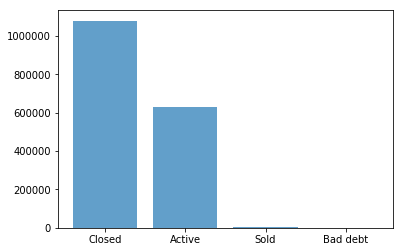

In [11]:
activeCreditCounts = bureau['CREDIT_ACTIVE'].value_counts()
creditActiveClass = bureau.CREDIT_ACTIVE.unique()
y_pos = np.arange(len(creditActiveClass))
plt.bar(y_pos,activeCreditCounts,align='center',alpha = 0.7)
plt.xticks(y_pos,creditActiveClass)
plt.show()

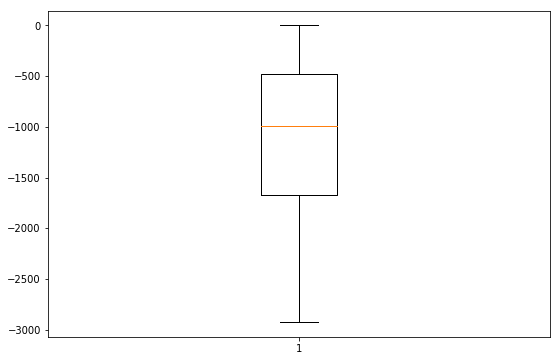

In [13]:
#creating a boxplot
fig = plt.figure(1,figsize=(9,6))
ax = fig.add_subplot(111)
bp = ax.boxplot(t)
fig.savefig('fig1.png',bbox_inches='tight')
plt.show()

In [14]:
#number of loans per person from other institutions
LoansPerSub = bureau.groupby(['SK_ID_CURR'])['SK_ID_BUREAU'].nunique()
LoansPerSub.columns = ['SK_ID_CURR','Count']
LoansPerSub.head()

SK_ID_CURR
100001    7
100002    8
100003    4
100004    2
100005    3
Name: SK_ID_BUREAU, dtype: int64

In [15]:
LoansPerSub.columns

['SK_ID_CURR', 'Count']

In [16]:
bins = np.linspace(-10, 10, 100)
LoansPerSub.plot.hist(by='Count',bins = bins)

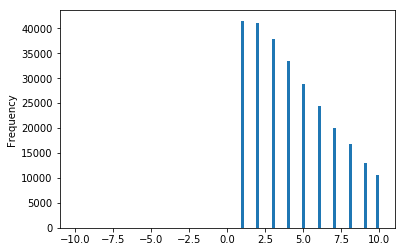

In [17]:
plt.show()

<h5>Numbere of different credit types </h5>
<h6>The top three credit types are Consumer credit, credit card and car loan. </h6>

In [41]:
bureau.iloc[:,14].value_counts()

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Interbank credit                                      1
Mobile operator loan                                  1
Name: CREDIT_TYPE, dtype: int64

In [38]:
plt.style.use = 'default'
plt.hist(bureau.iloc[:,14])
plt.show()

ValueError: object too deep for desired array